# ML workflow with CliMT

In [1]:
import climt
from sympl import (
    PlotFunctionMonitor,
    TimeDifferencingWrapper,
    DataArray
)
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
%matplotlib inline
import pickle
import xarray as xr
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Model setup

In [2]:
climt.set_constants_from_dict({
    'stellar_irradiance': {'value': 200, 'units': 'W m^-2'}})

model_time_step = timedelta(seconds=900)

# Create components
convection = climt.EmanuelConvection()
simple_physics = TimeDifferencingWrapper(climt.SimplePhysics())

radiation = climt.GrayLongwaveRadiation()

dycore = climt.GFSDynamicalCore(
    [simple_physics, radiation,
     convection], number_of_damped_levels=2
)
grid = climt.get_grid(nx=64, ny=32, nz=10)

# Create model state
my_state = climt.get_default_state([dycore], grid_state=grid)

# Set initial/boundary conditions
latitudes = my_state['latitude'].values
longitudes = my_state['longitude'].values
surface_shape = latitudes.shape

temperature_equator = 300
temperature_pole = 240

temperature_profile = temperature_equator - (
    (temperature_equator - temperature_pole)*(
        np.sin(np.radians(latitudes))**2))

my_state['surface_temperature'] = DataArray(
    temperature_profile*np.ones(surface_shape),
    dims=['lat', 'lon'], attrs={'units': 'degK'})
my_state['eastward_wind'].values[:] = np.random.randn(
    *my_state['eastward_wind'].shape)

## Run the model and save tendencies for ML learning

In [3]:
import pickle
with open('./state.pkl', 'rb') as f:
    my_state = pickle.load(f)

In [4]:
s = []
t = []
for i in tqdm(range(1000)):
    # Get convection tendencies
    tendencies, _ = convection(my_state, model_time_step)
    t.append(tendencies)
    diag, my_state = dycore(my_state, model_time_step)
    my_state.update(diag)
    my_state['time'] += model_time_step
    s.append(my_state)

/Users/stephanrasp/miniconda3/lib/python3.7/site-packages/sympl/_core/tracers.py:202: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  array[tracer_slice] = raw_state[name]
/Users/stephanrasp/miniconda3/lib/python3.7/site-packages/sympl/_core/tracers.py:229: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  raw_state[name] = tracer_array[tracer_slice]


In [5]:
tendencies.keys()

dict_keys(['air_temperature', 'specific_humidity', 'eastward_wind', 'northward_wind'])

In [6]:
da = xr.concat([tt['air_temperature'] for tt in t], dim='time')
da.name='air_temperature'

In [7]:
ds = hv.Dataset(da[::5].isel(mid_levels=5))

In [8]:
images = ds.to(hv.Image, ['lon', 'lat']).options(fig_inches=(10, 5))

:HoloMap   [time]
   :Image   [lon,lat]   (air_temperature)
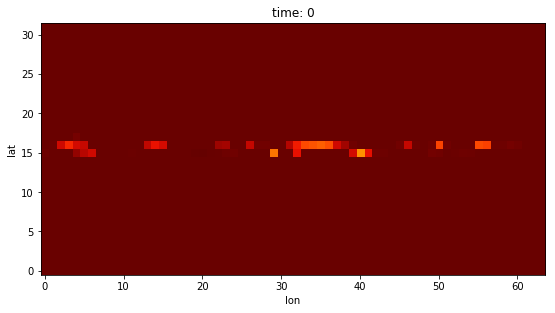
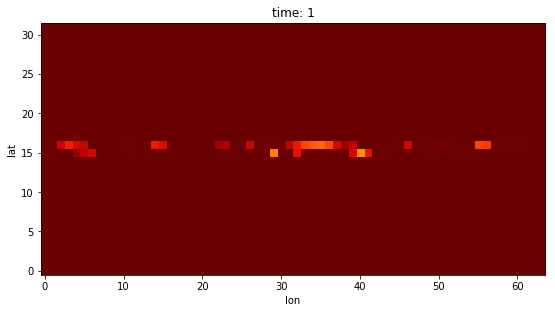
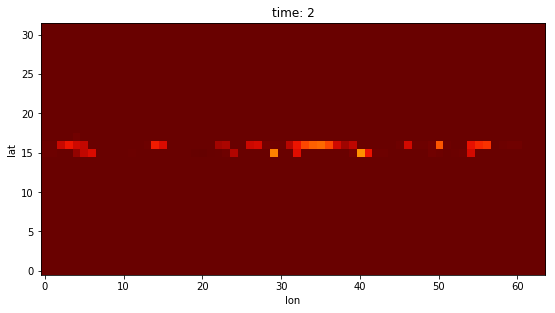
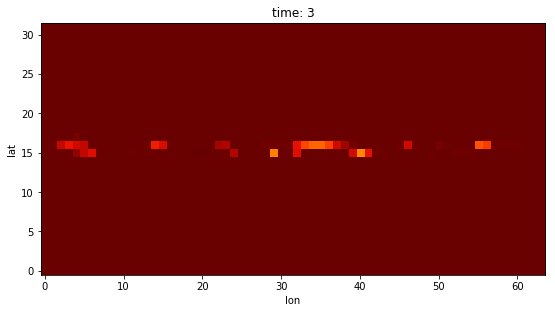
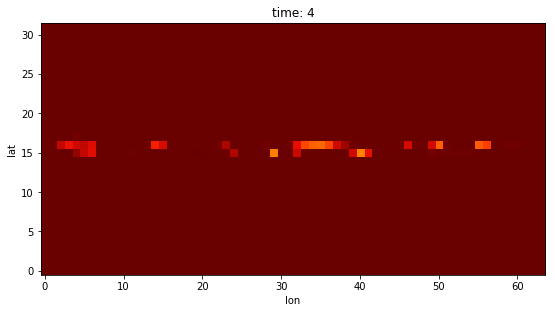
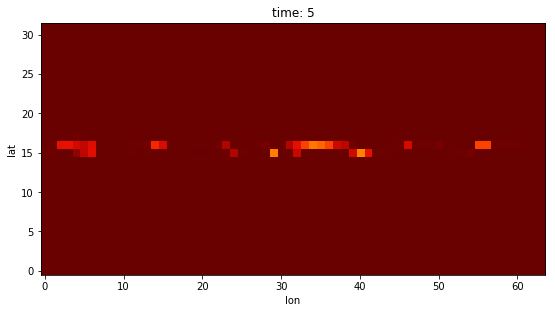
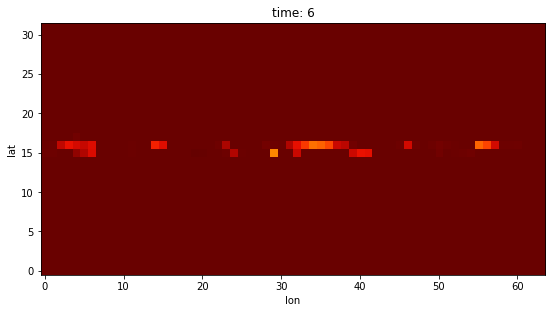
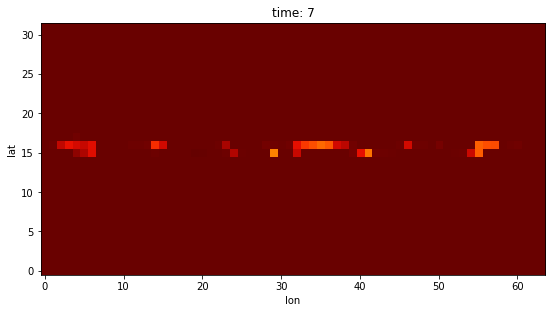
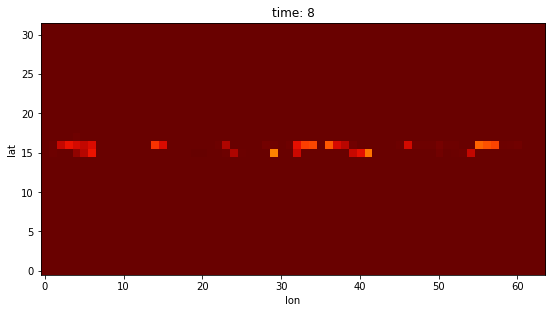
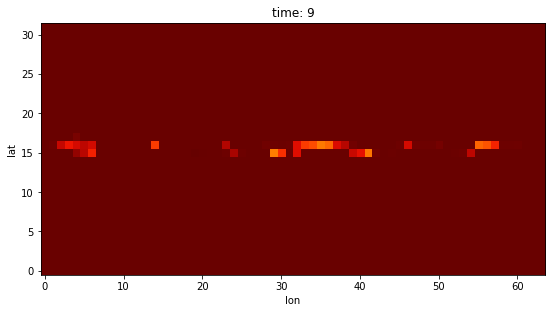
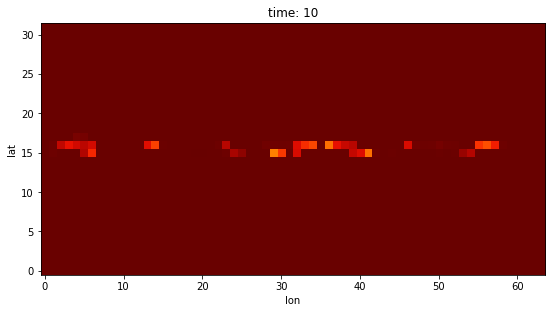
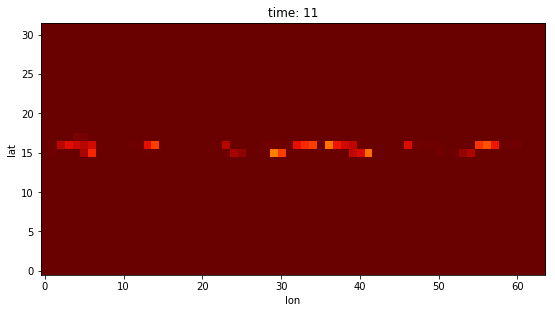
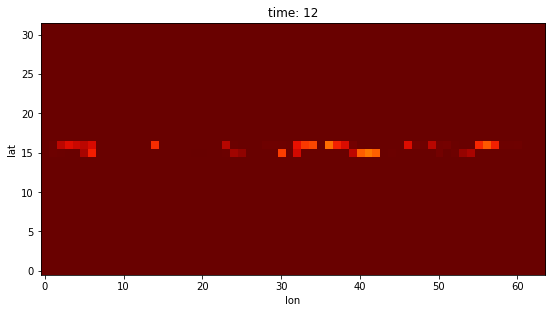
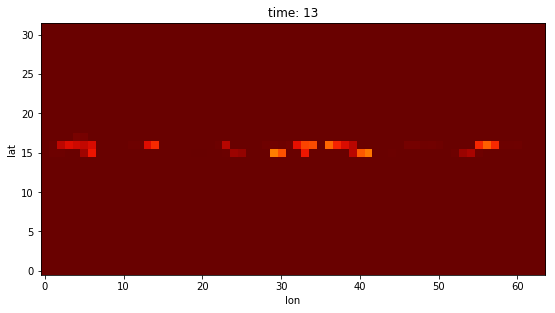
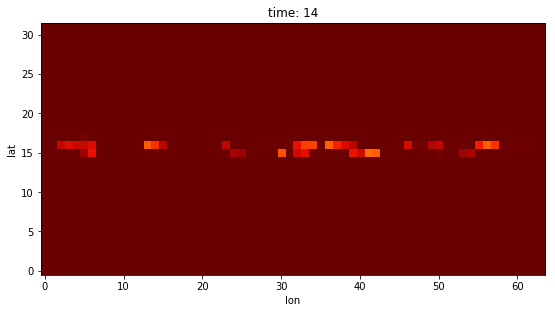
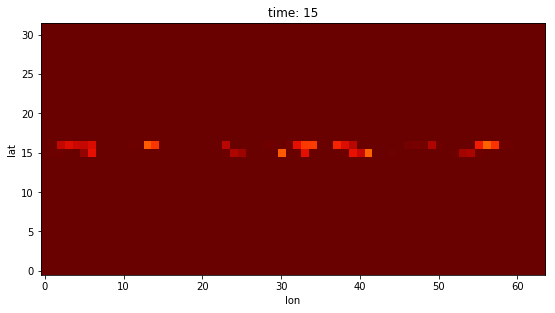
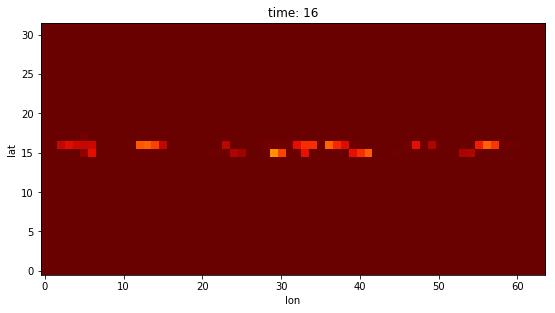
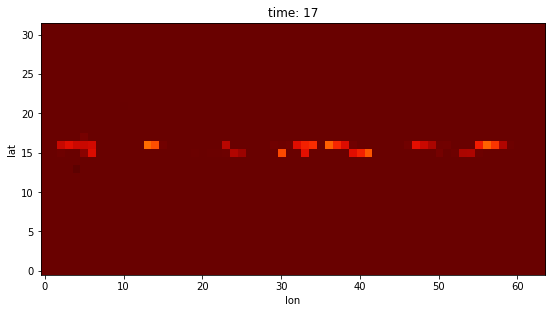
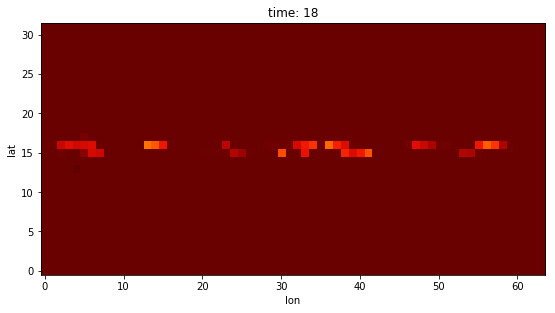
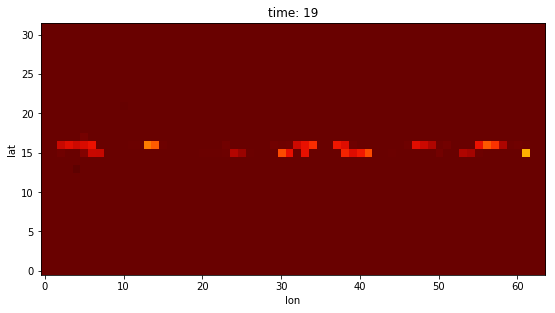
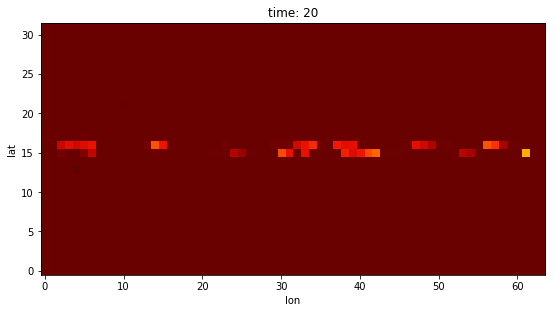
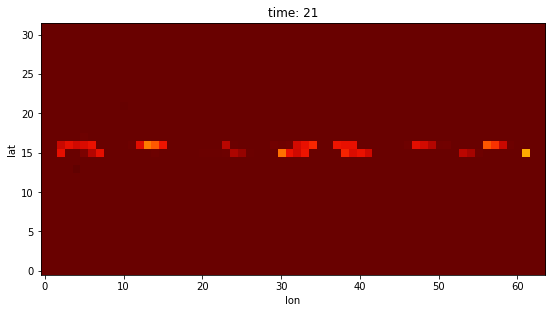
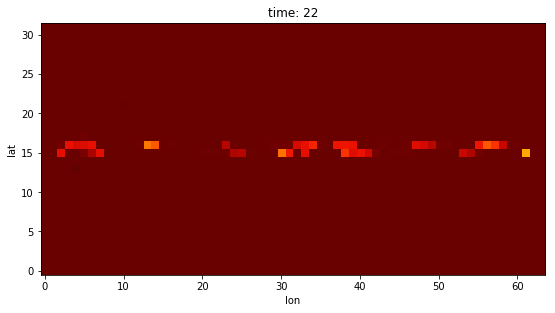
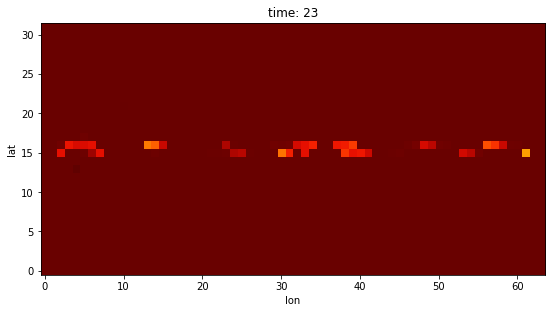
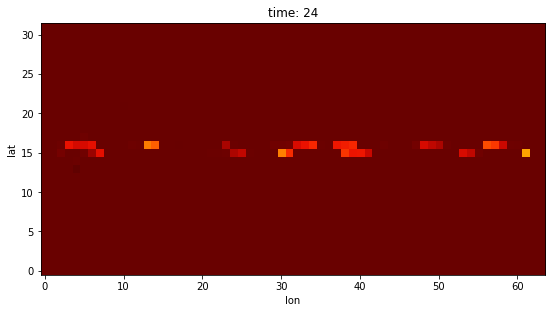
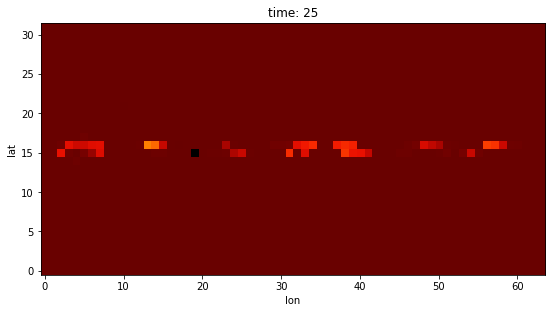
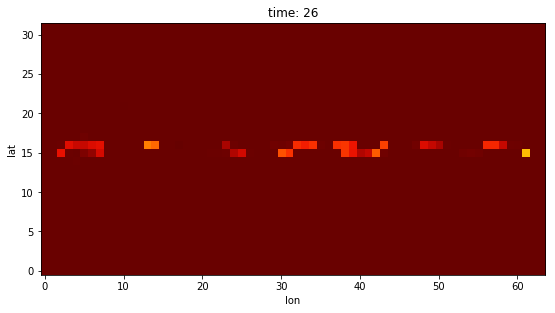
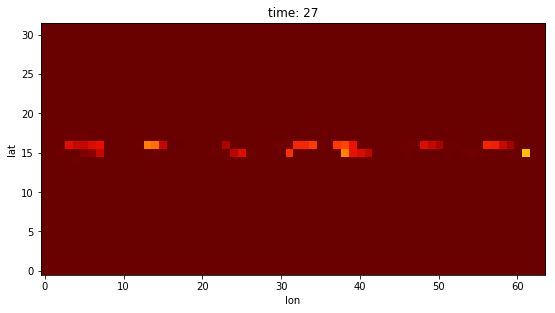
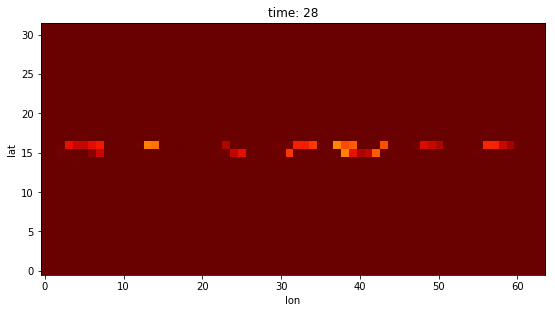
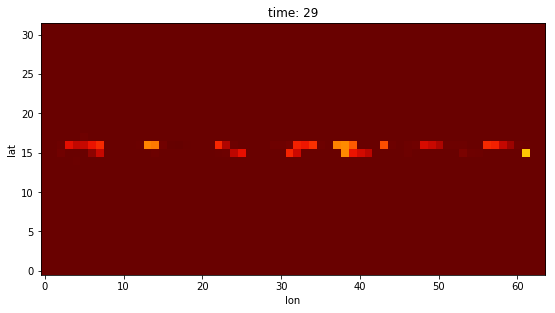
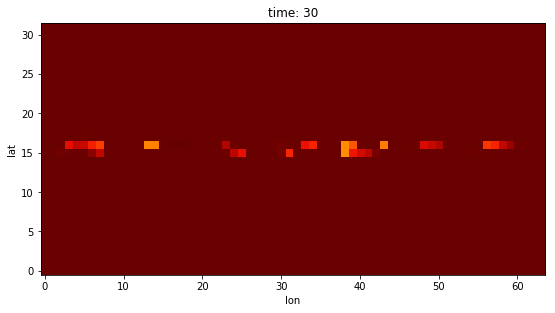
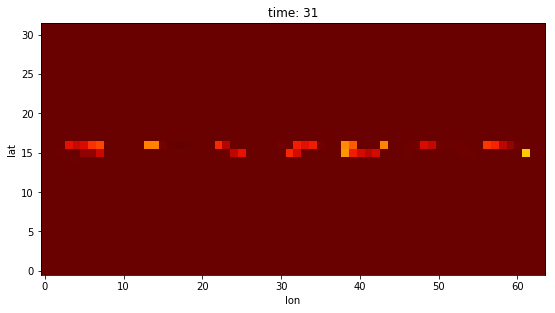
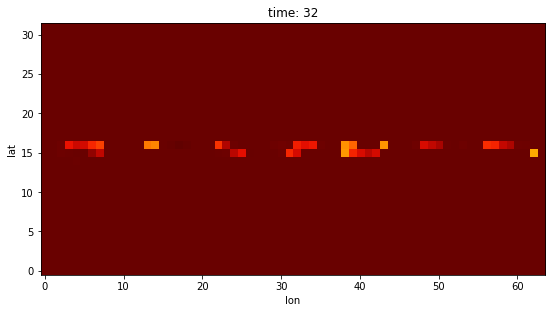
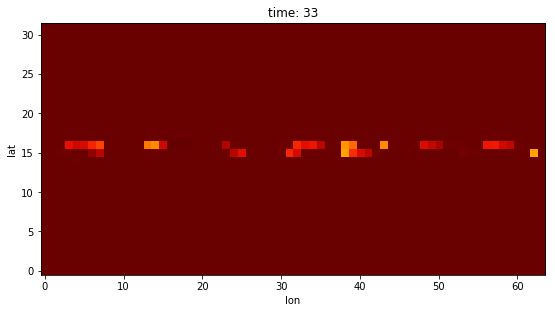
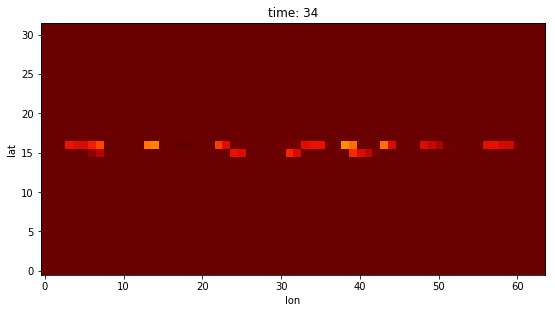
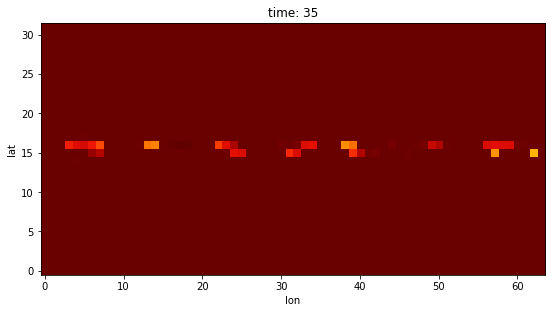
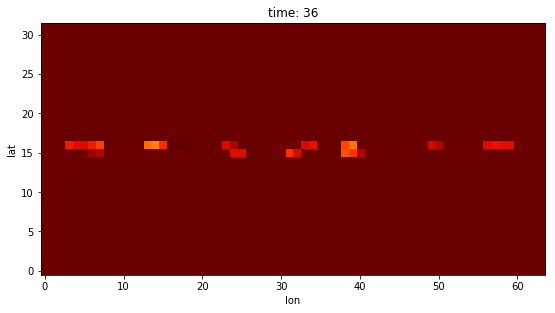
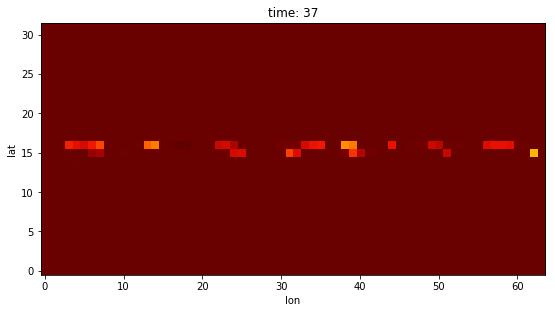
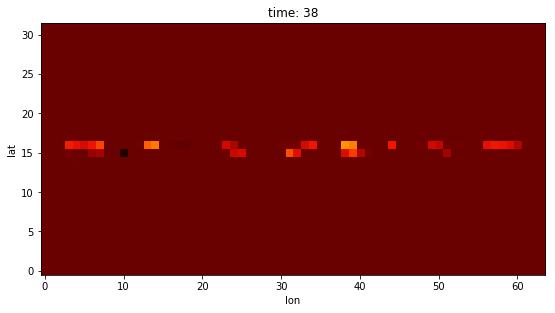
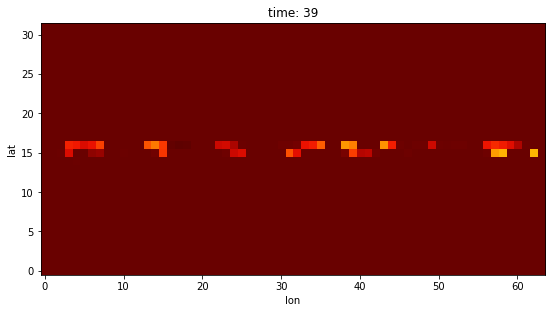
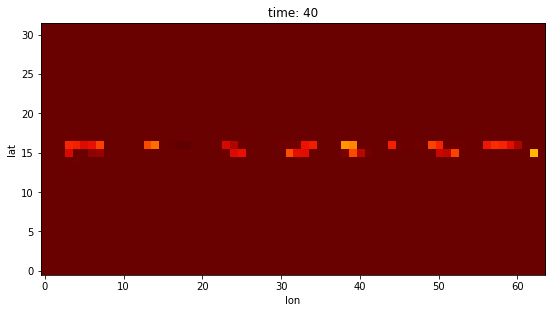
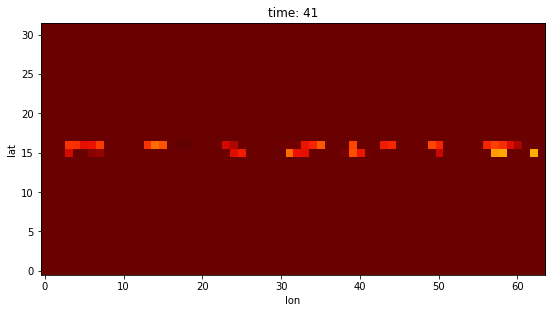
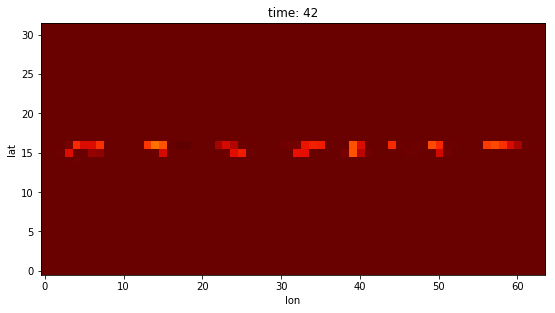
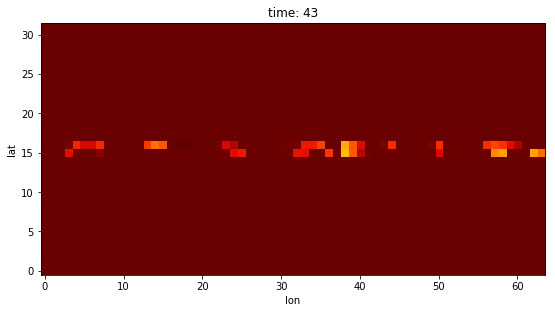
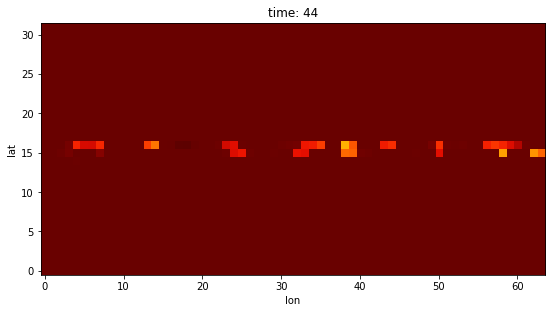
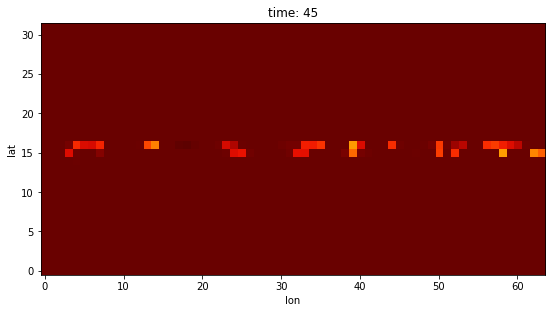
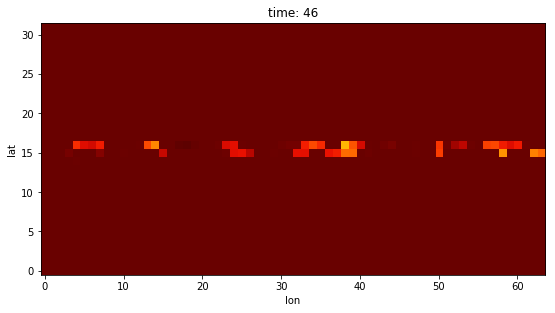
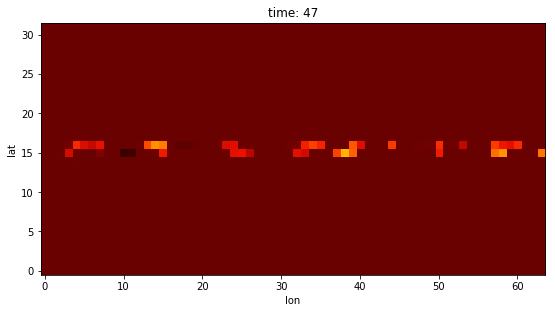
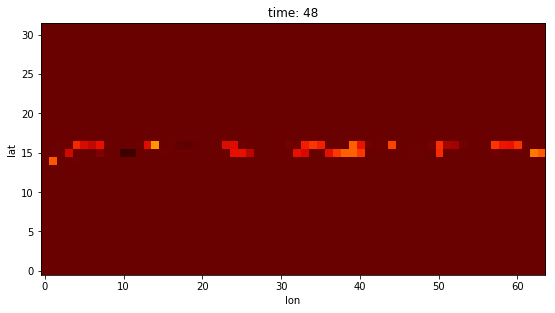
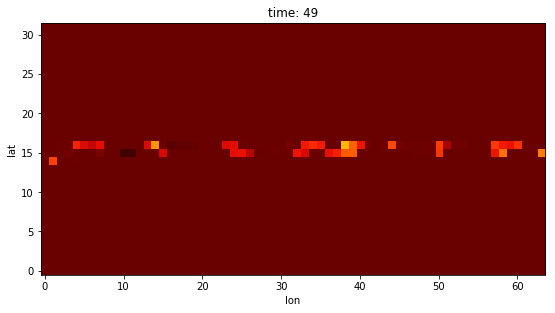
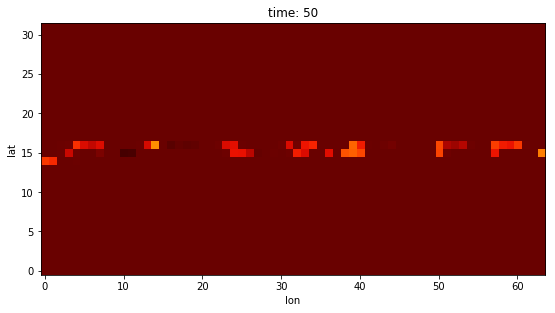
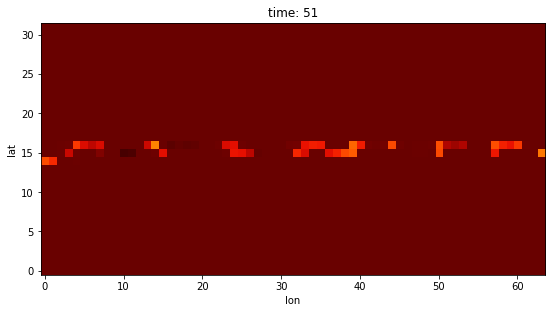
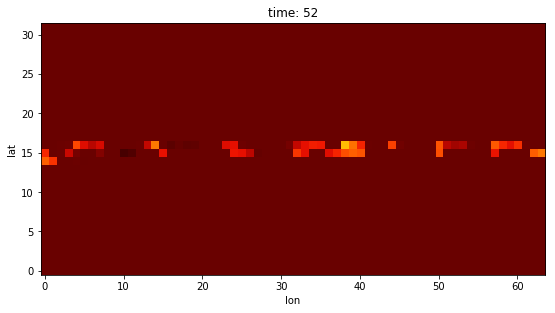
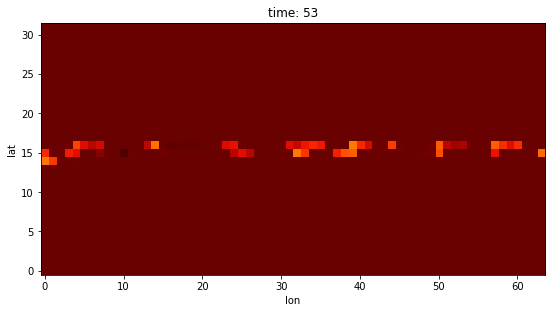
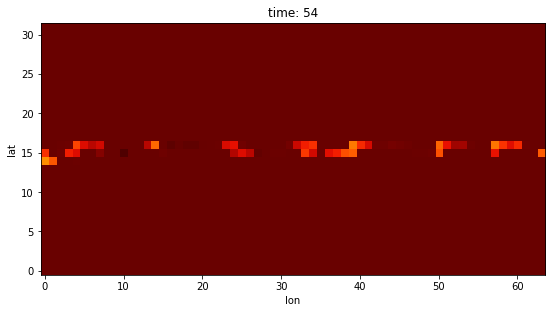
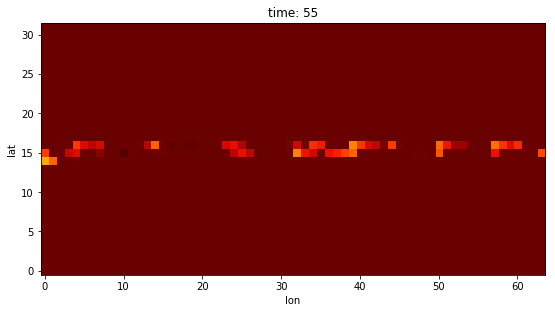
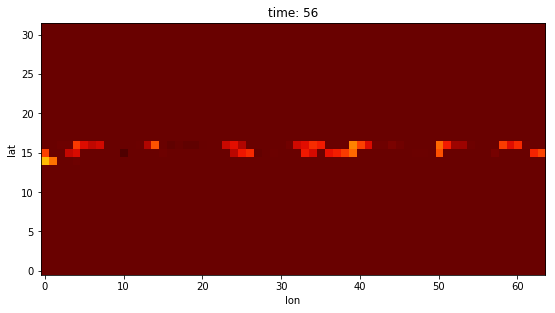
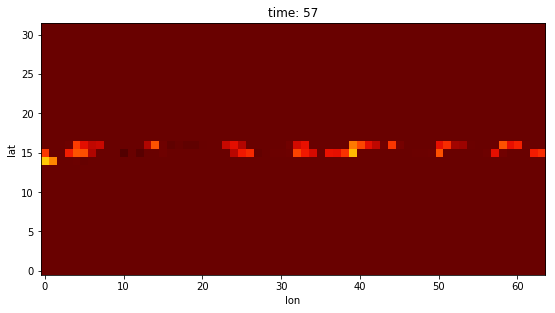
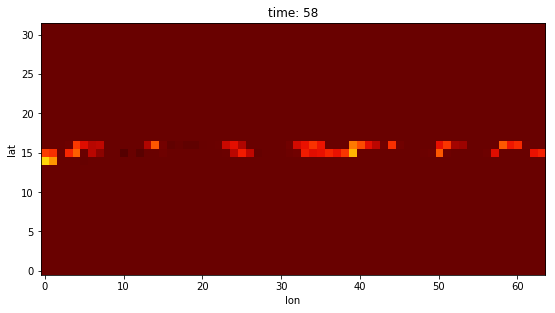
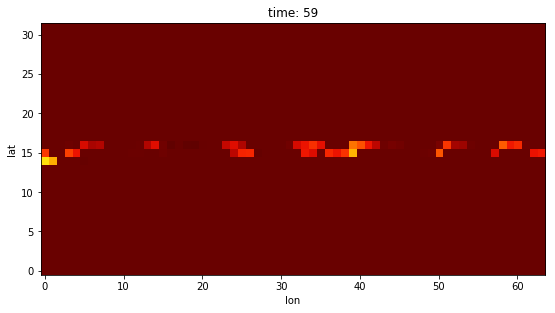
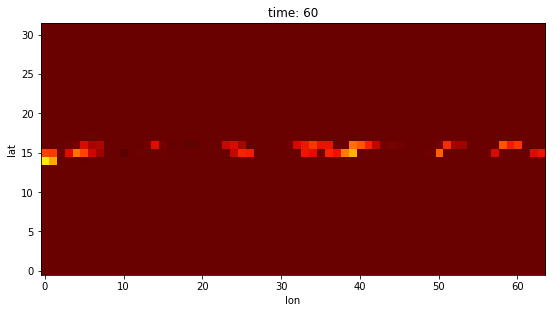
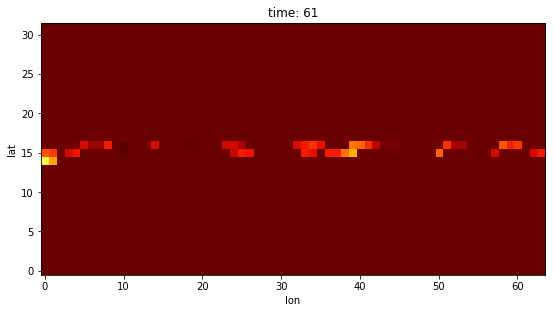
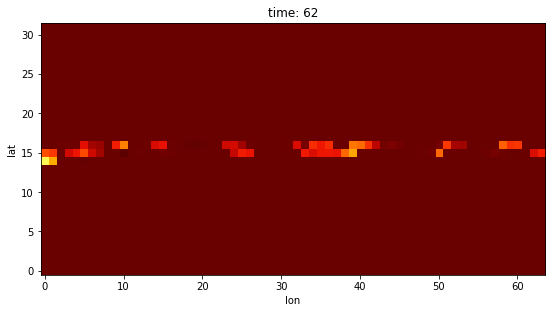
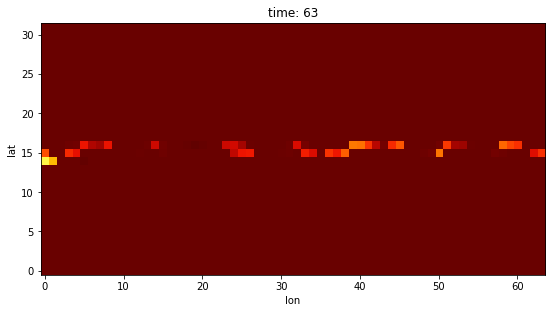
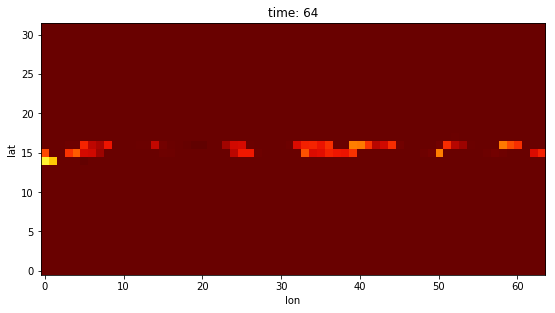
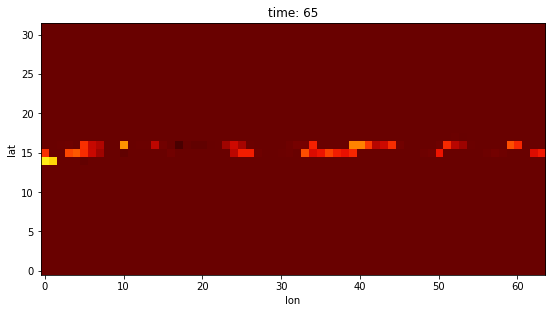
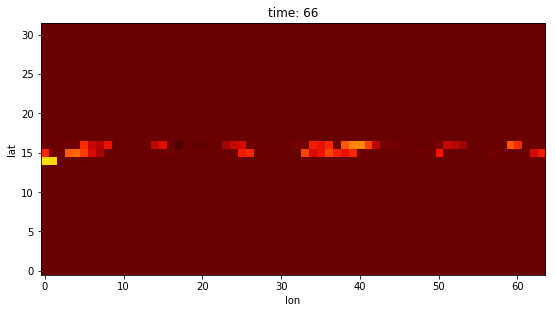
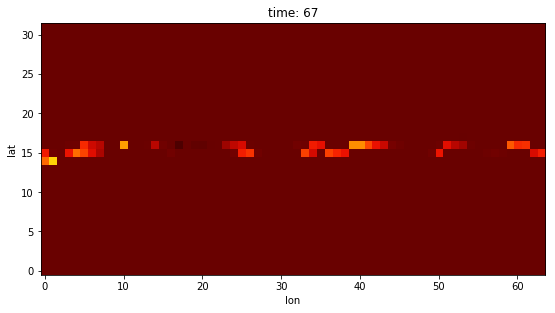
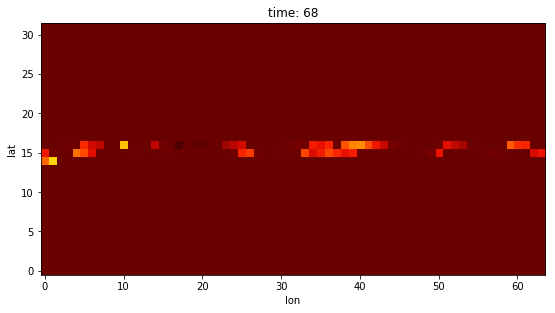
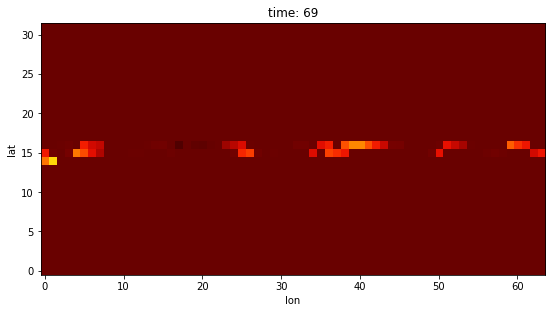
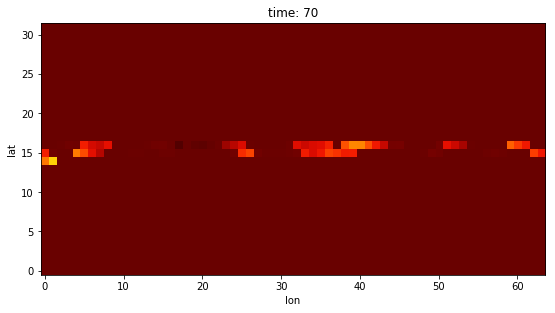
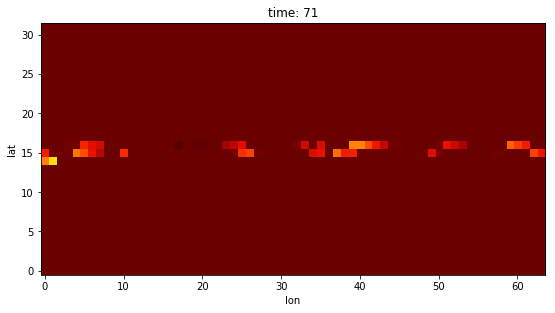
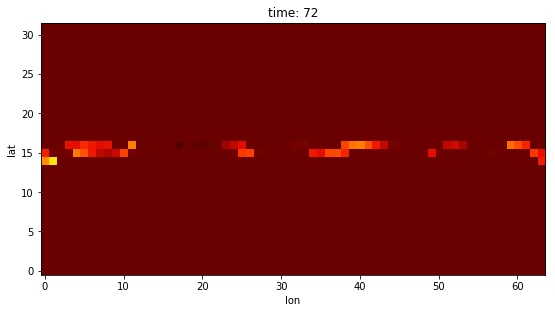
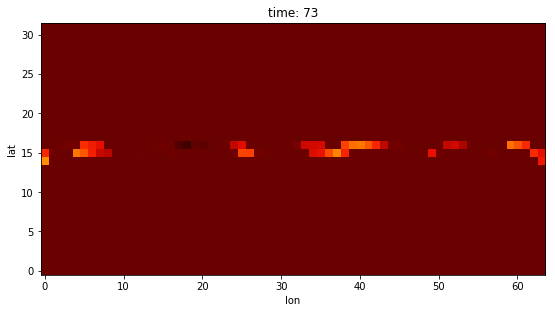
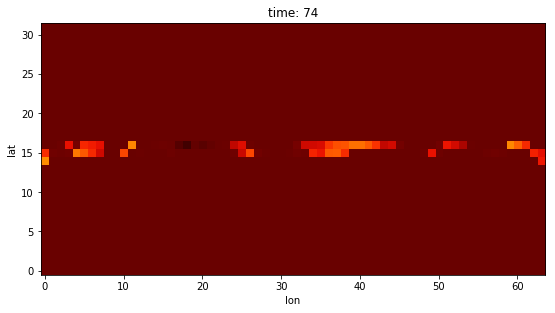
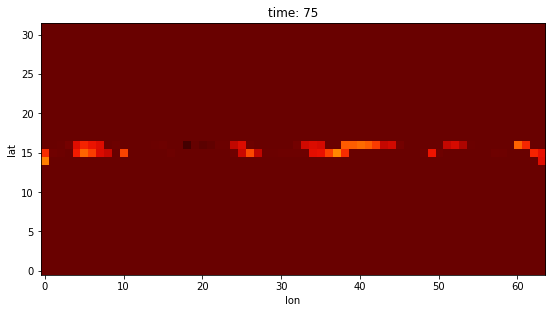
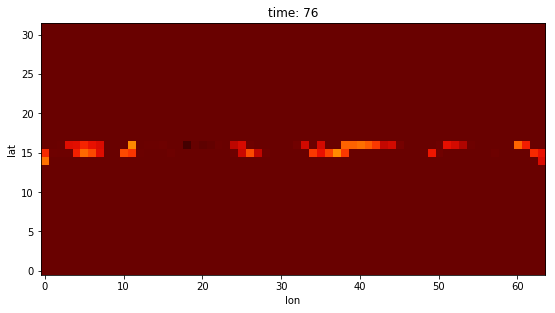
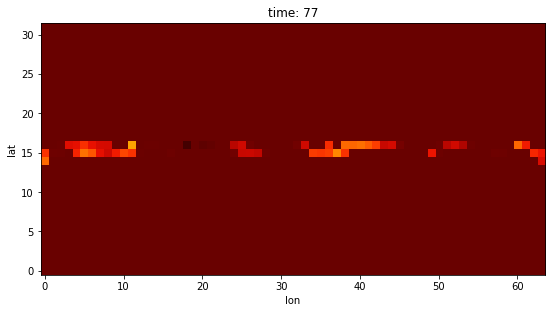
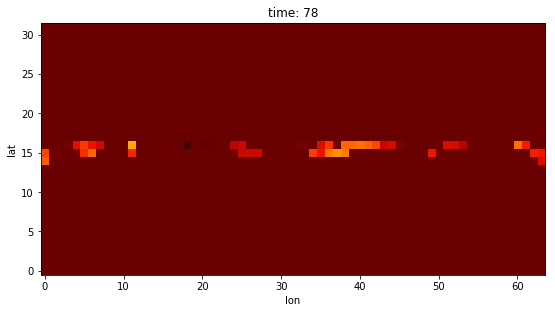
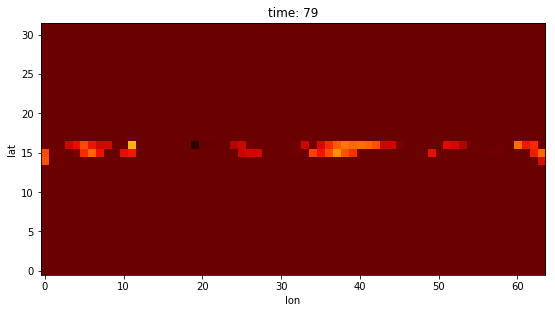
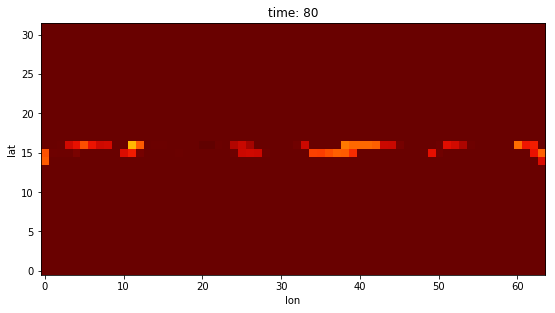
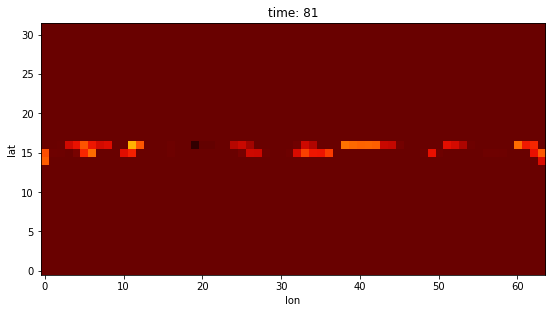
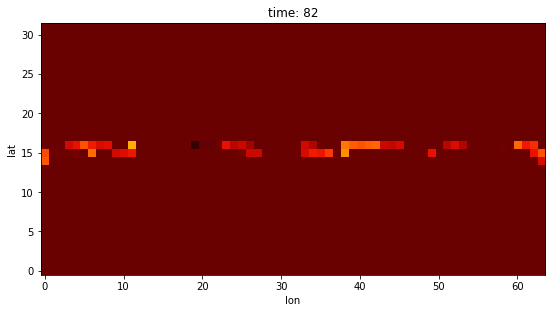
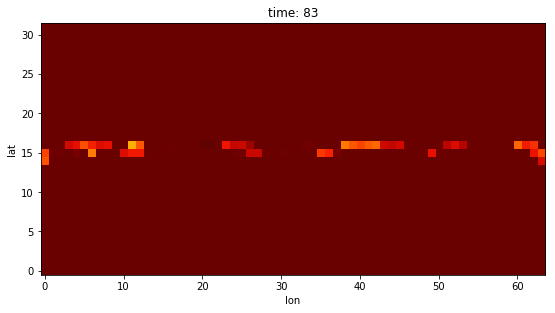
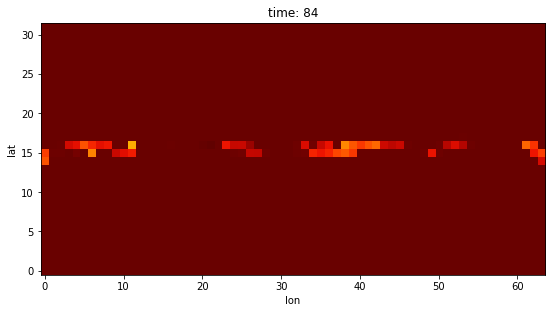
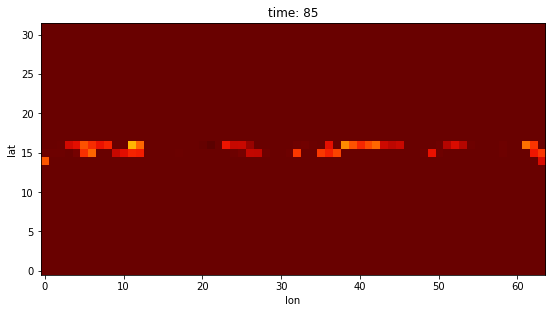
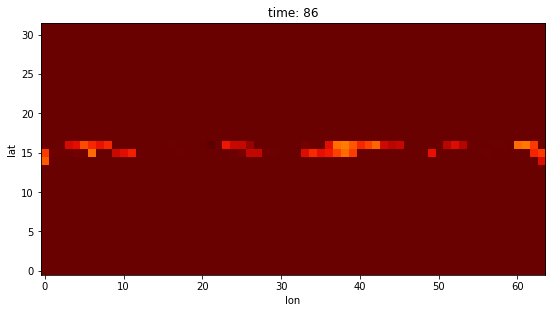
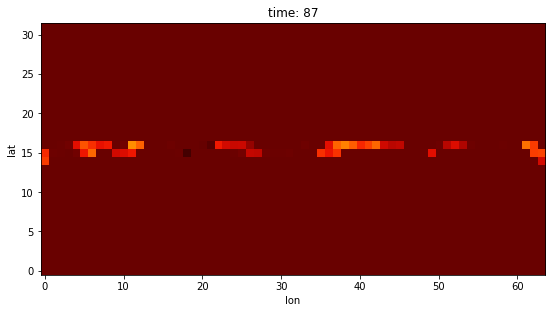
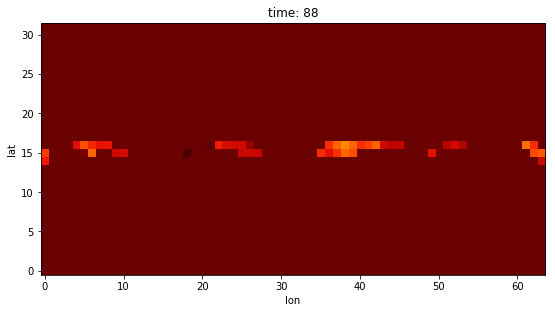
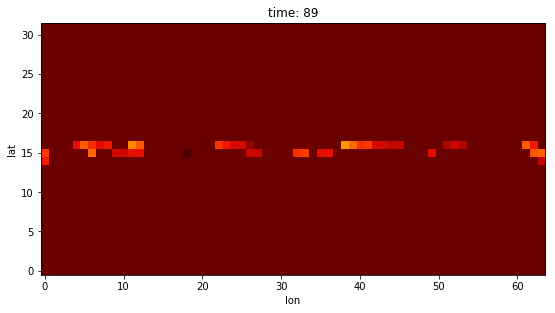
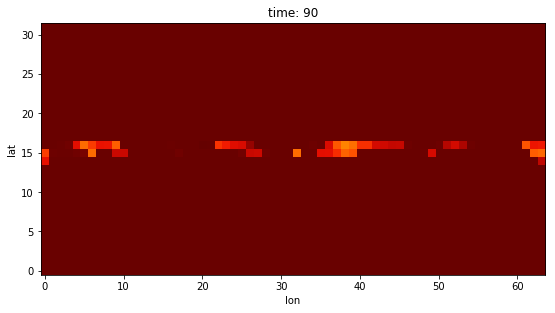
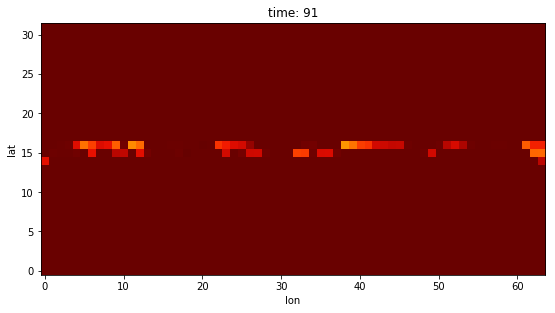
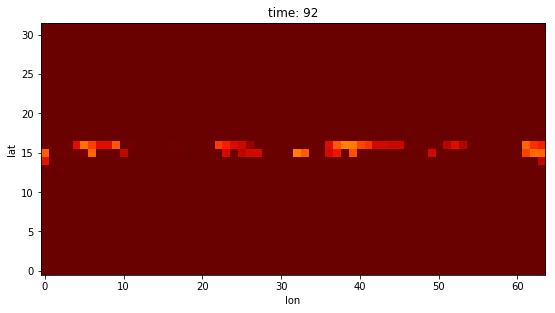
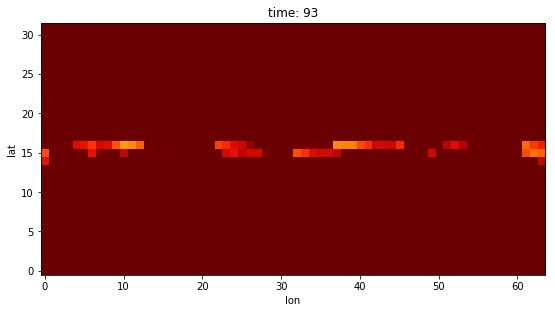
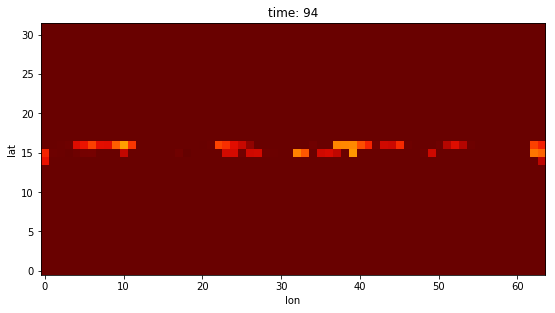
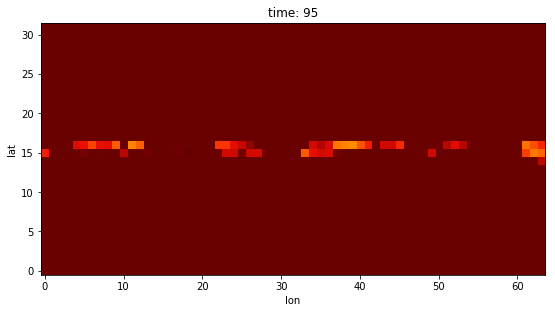
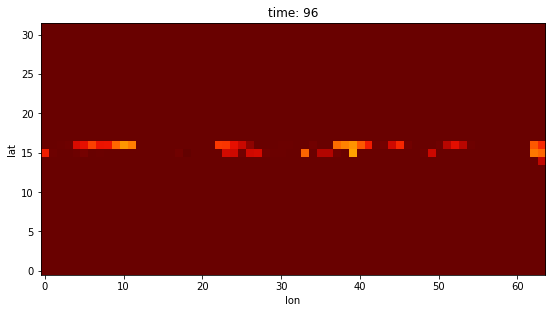
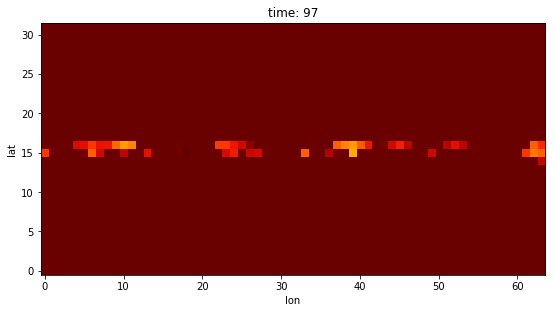
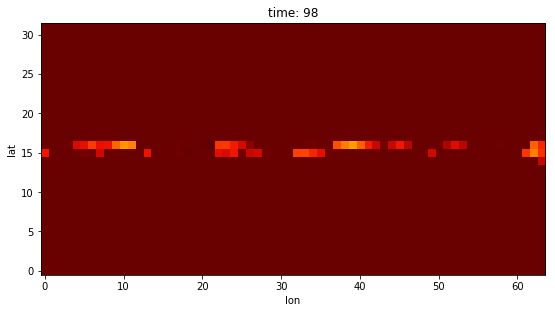
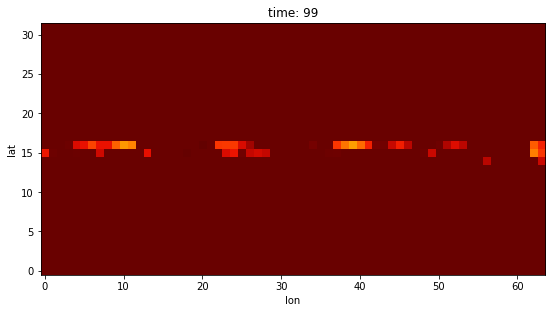
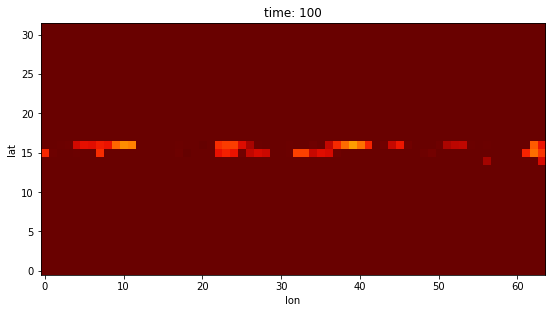
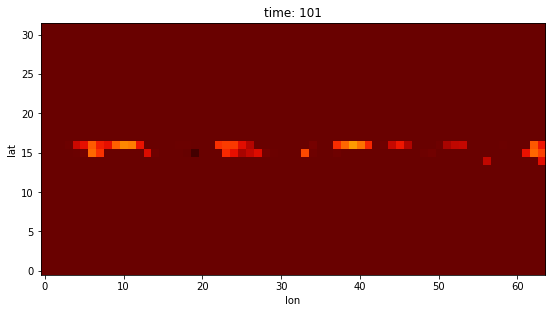
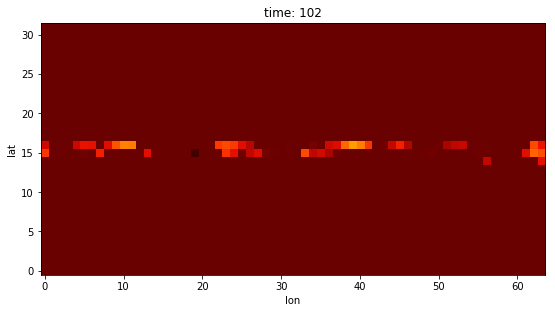
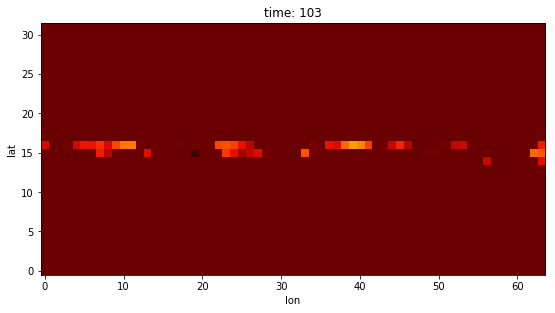
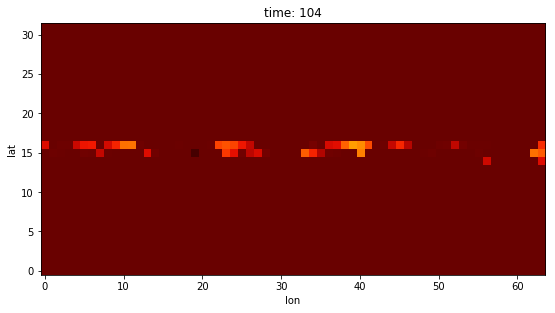
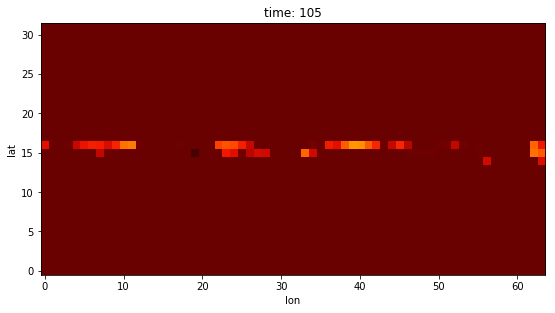
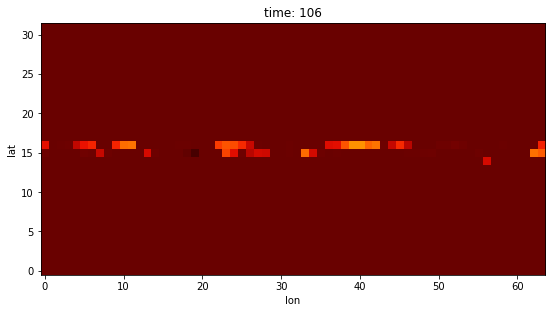
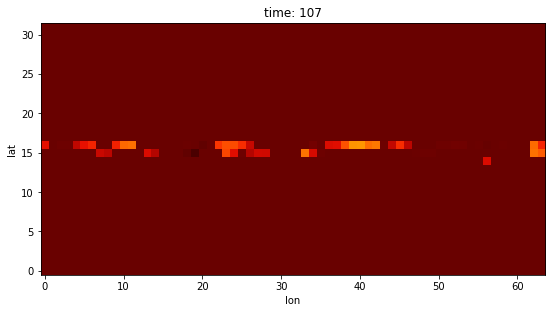
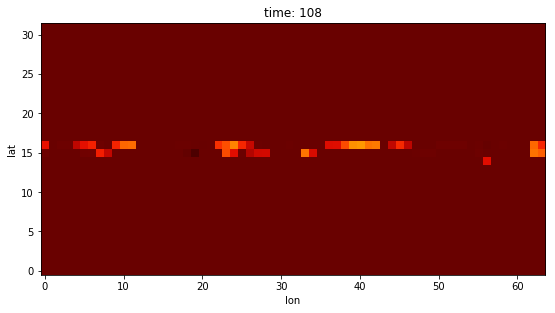
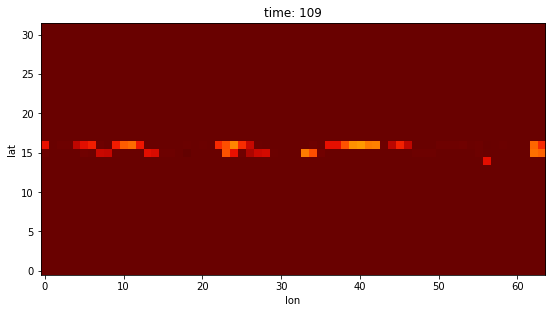
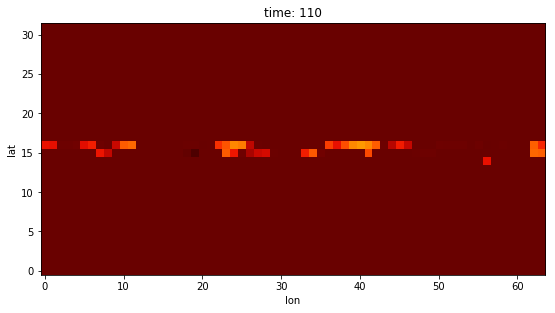
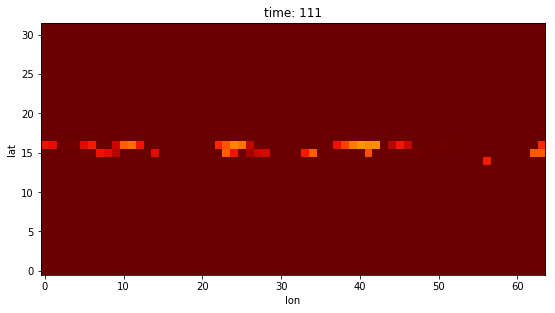
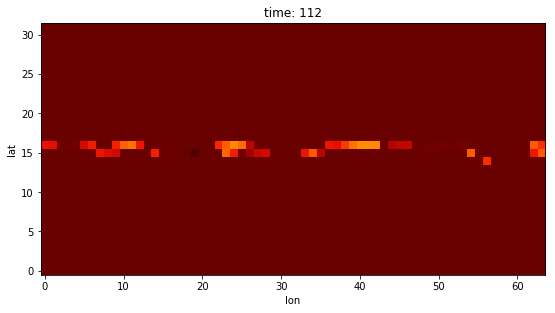
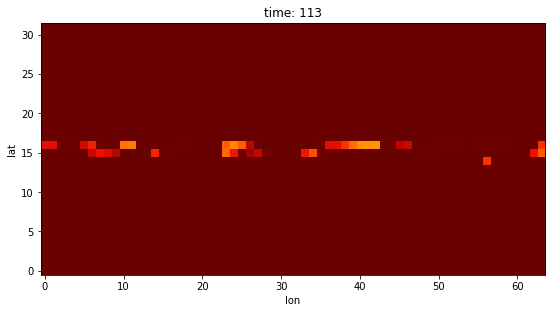
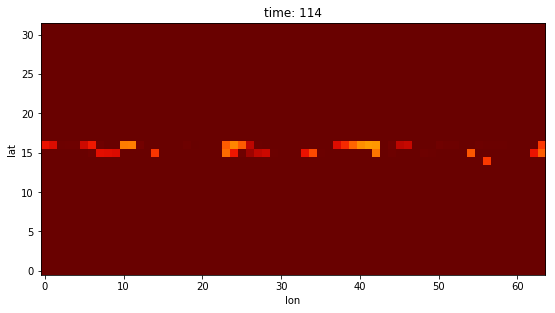
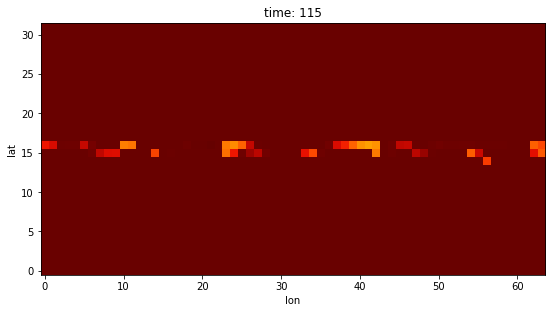
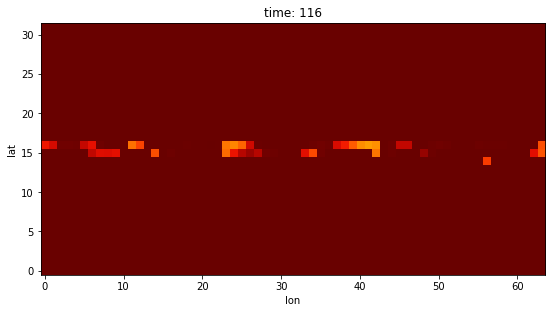
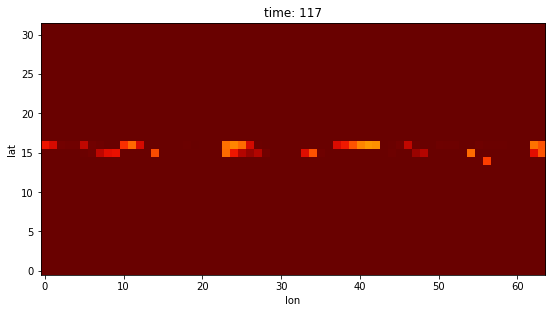
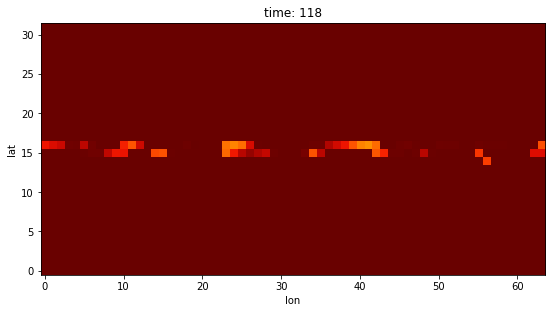
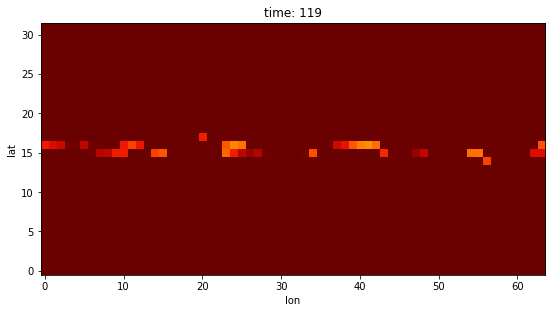
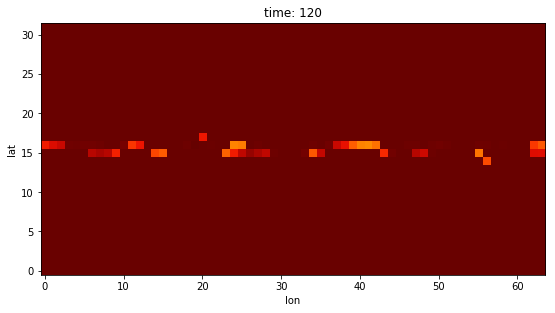
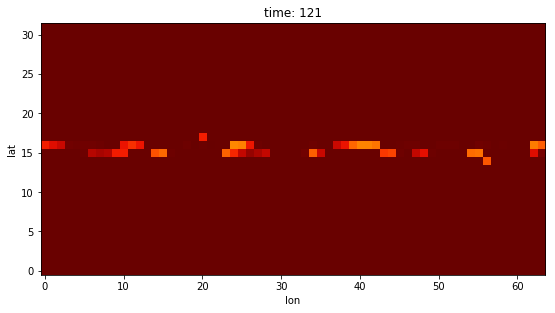
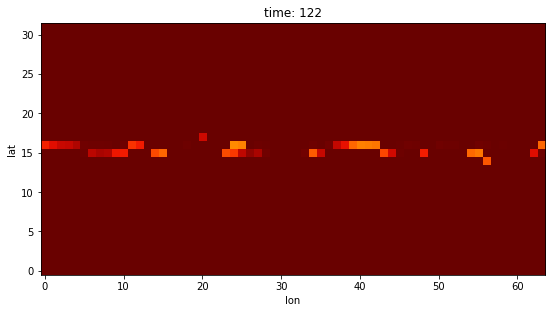
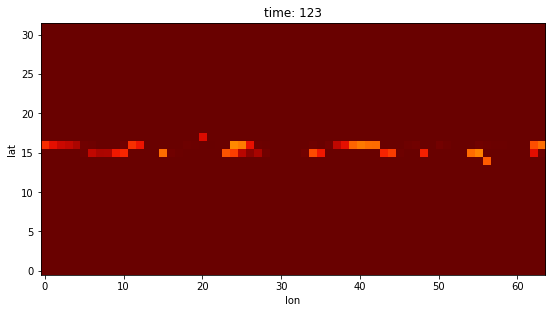
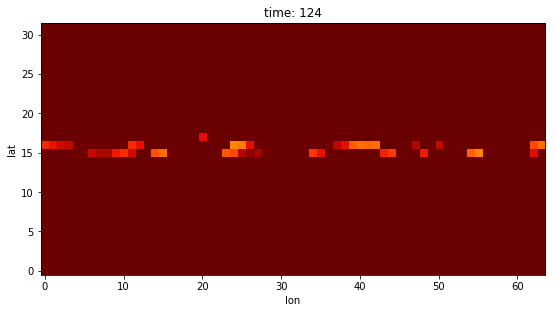
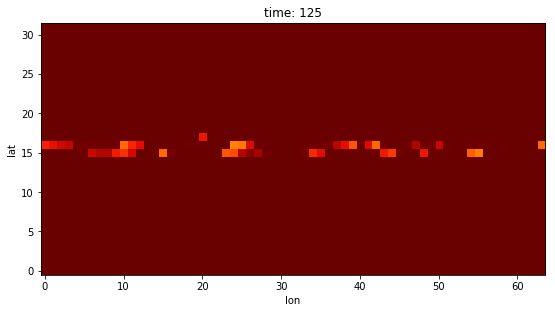
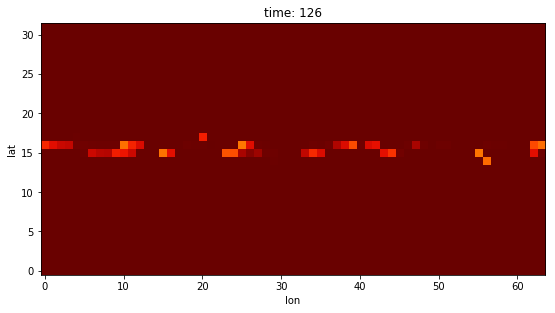
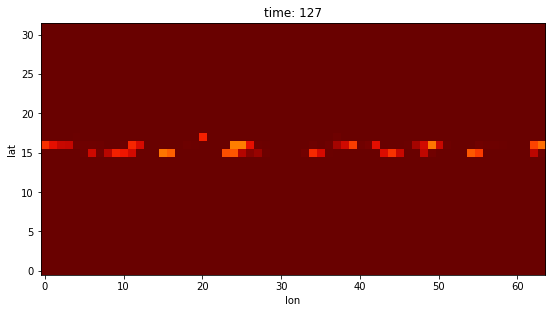
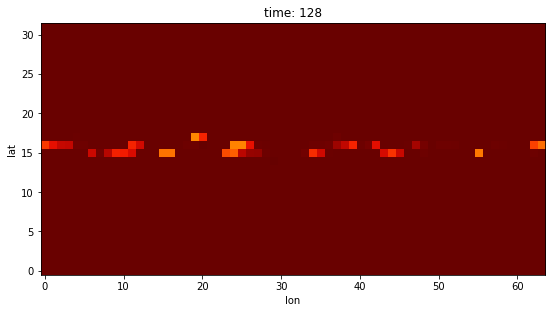
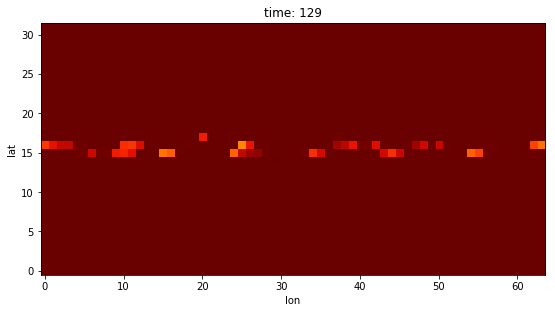
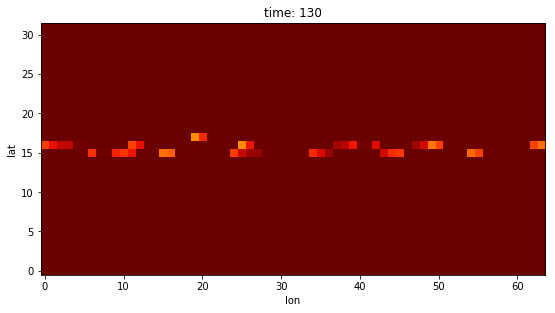
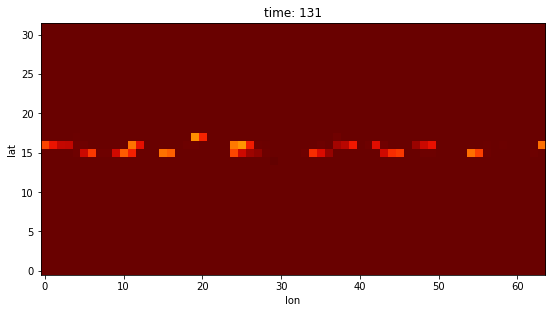
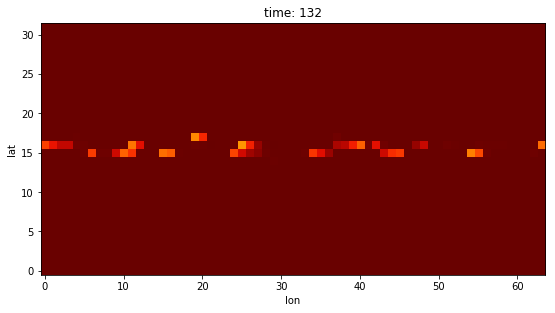
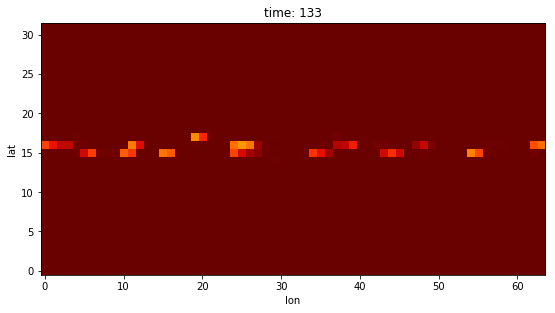
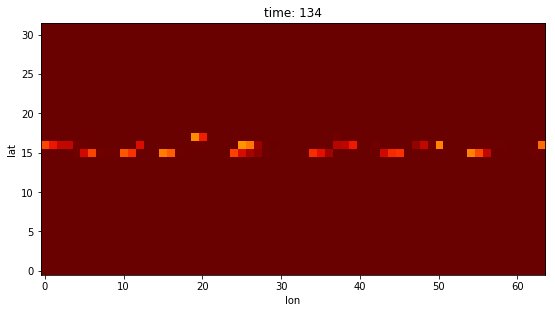
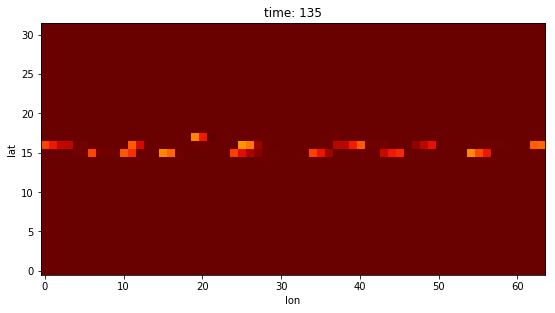
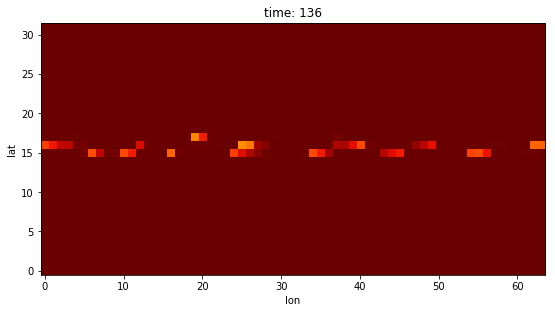
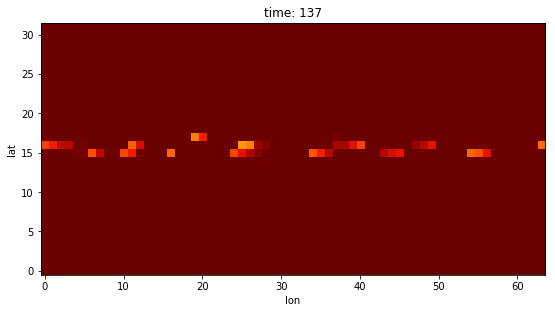
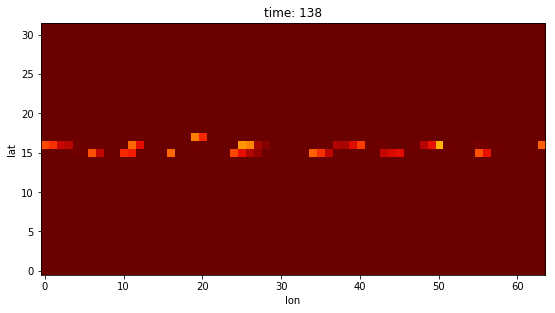
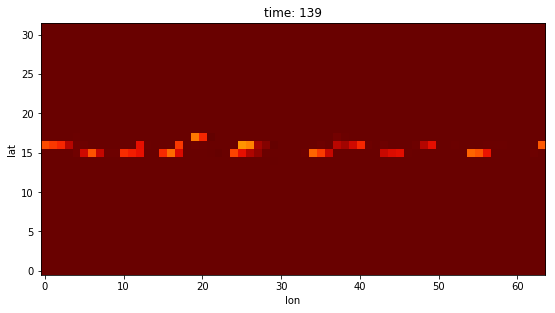
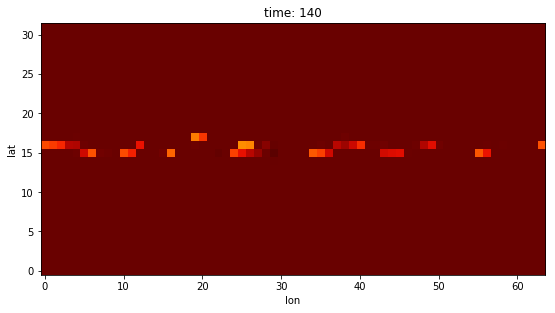
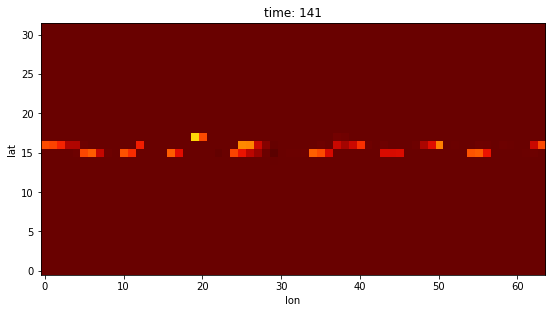
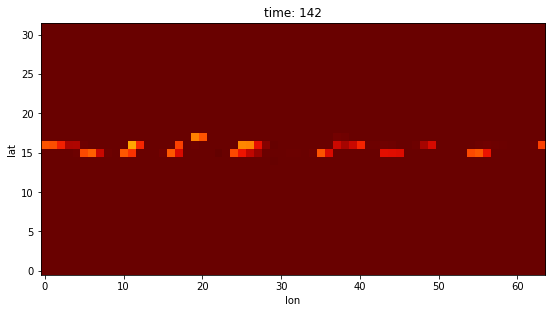
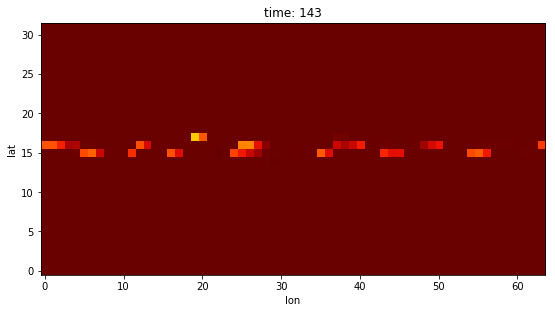
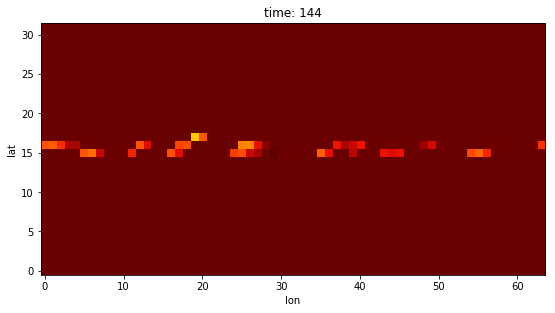
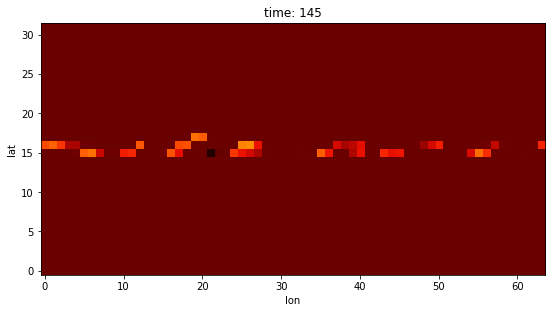
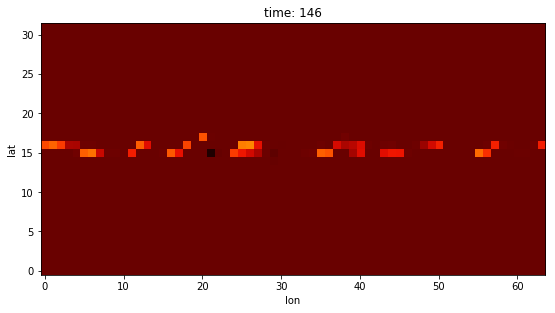
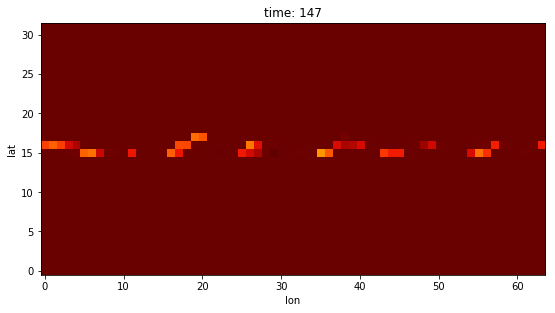
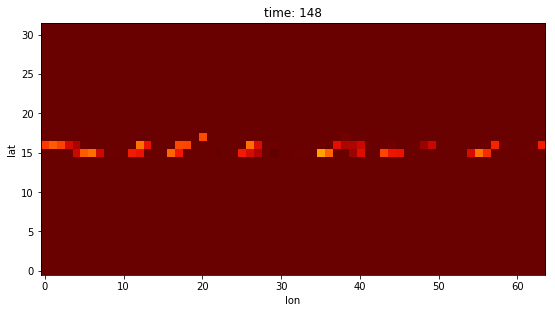
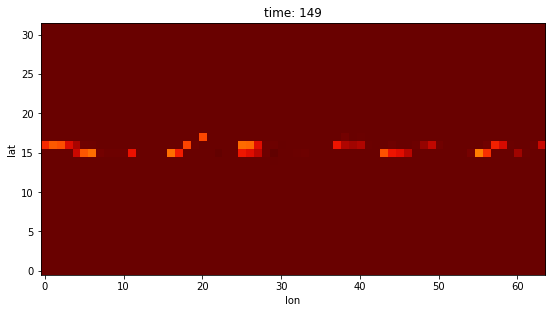
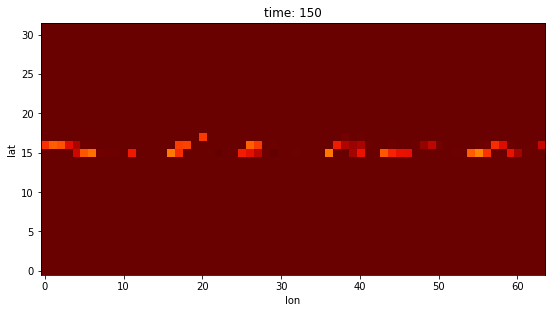
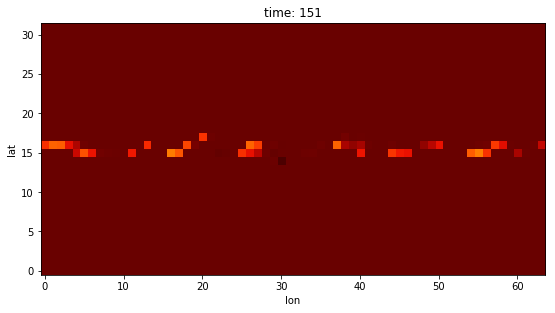
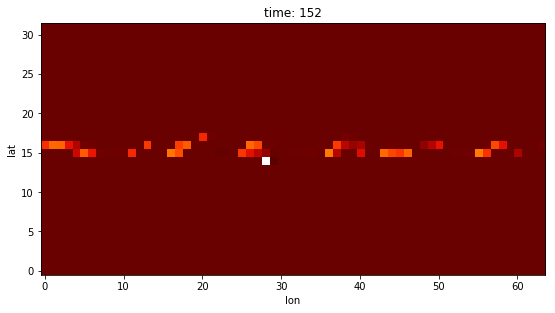
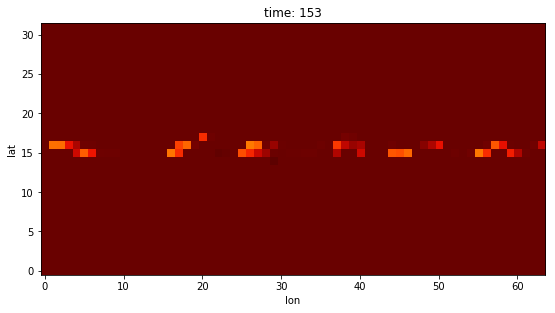
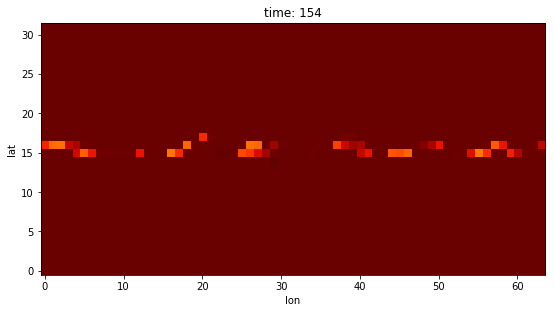
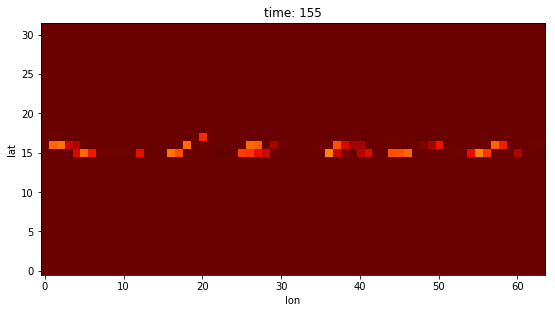
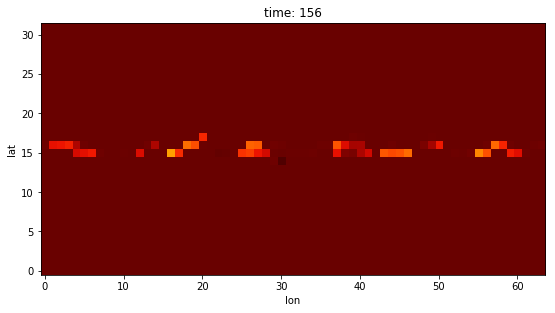
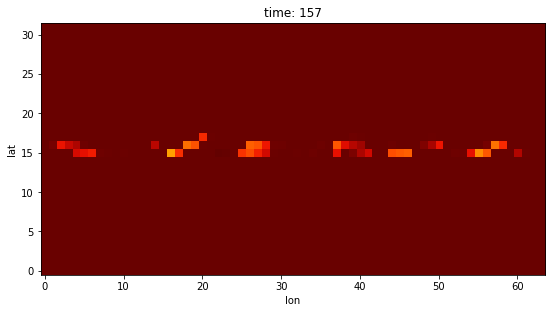
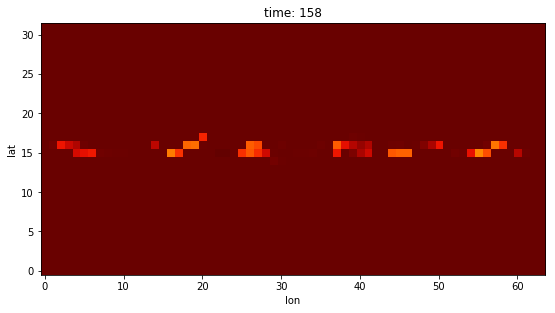
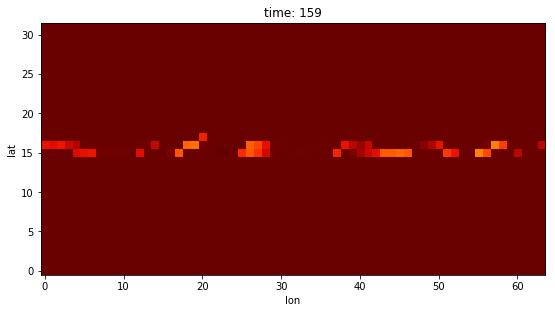
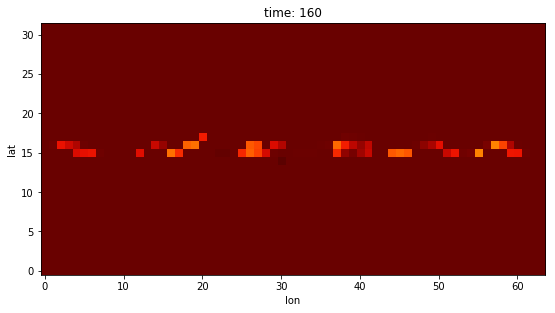
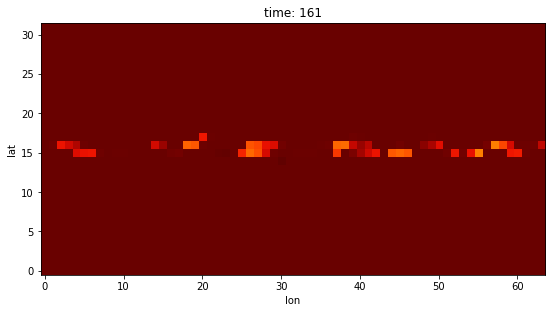
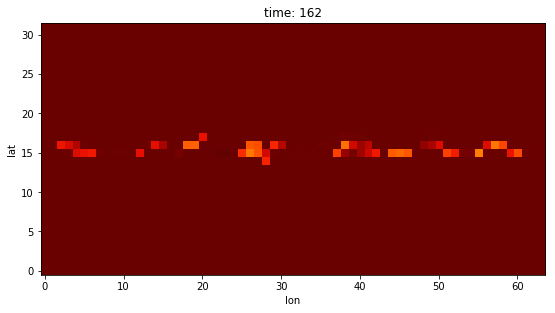
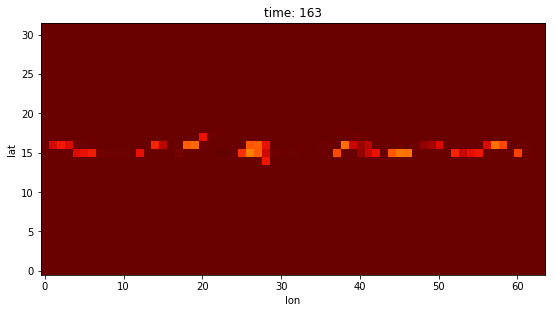
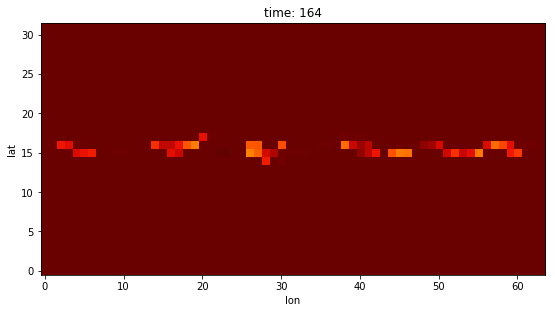
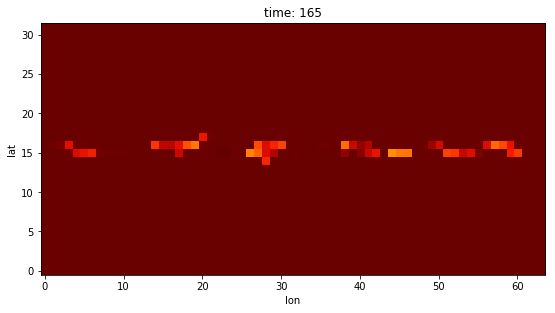
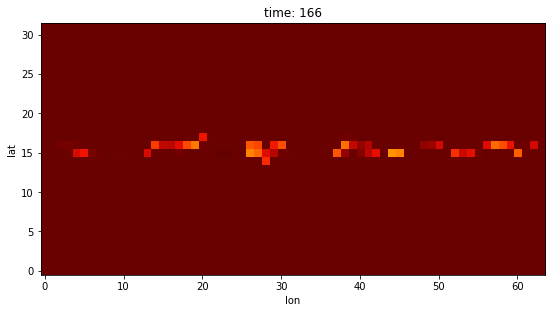
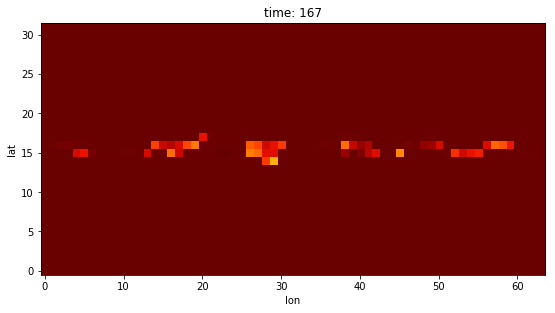
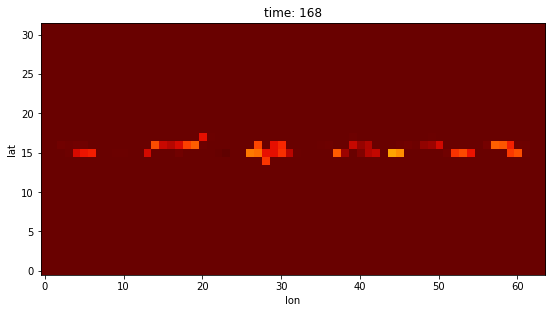
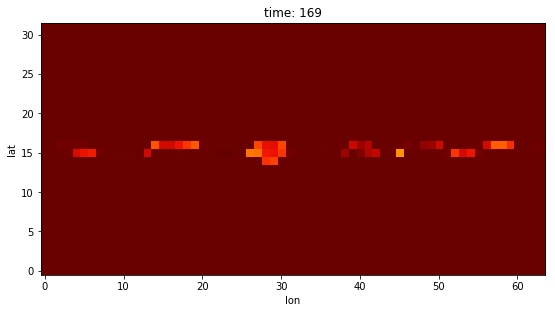
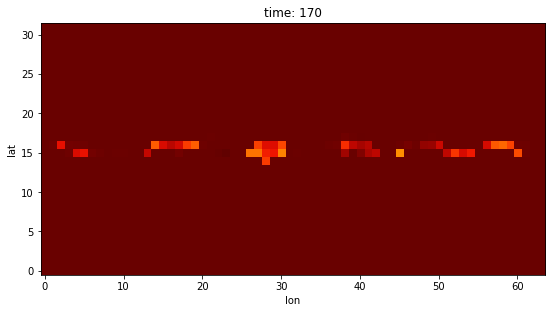
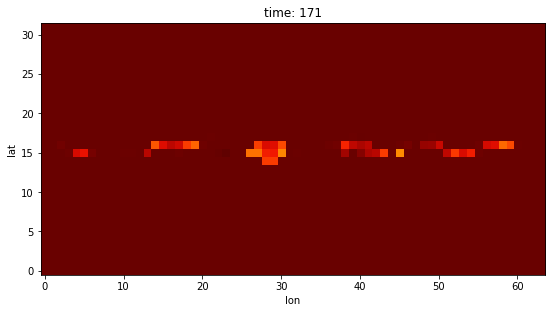
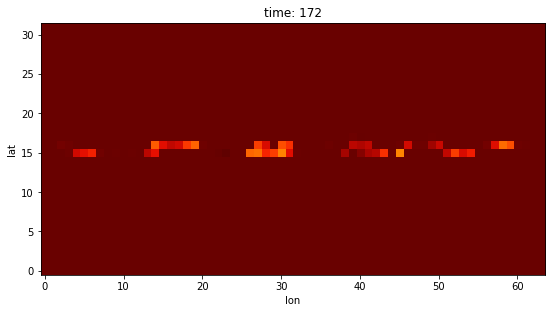
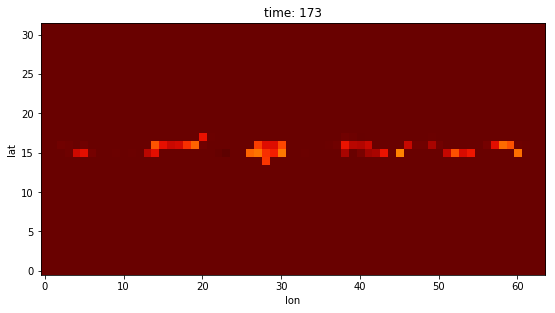
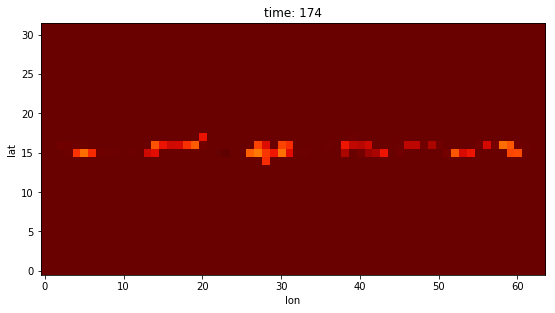
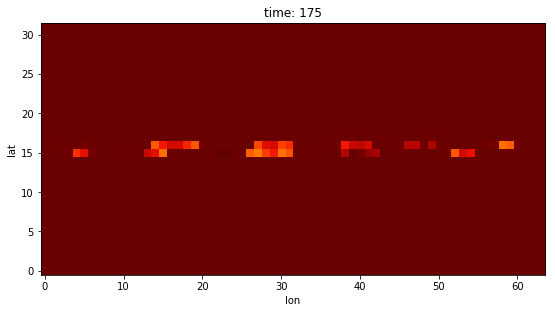
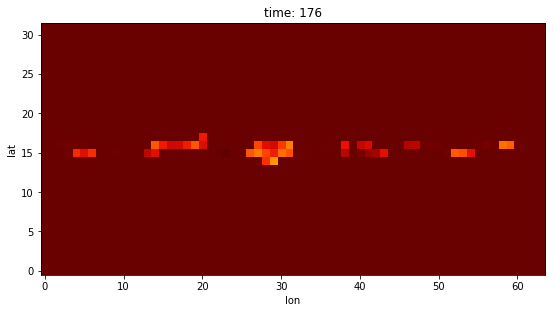
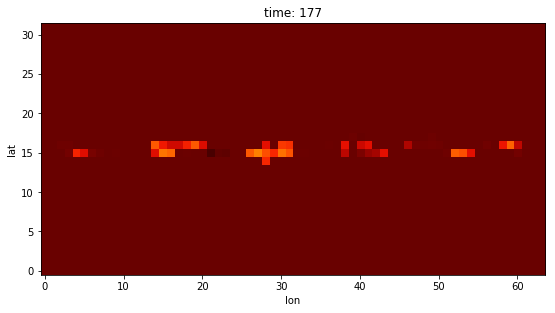
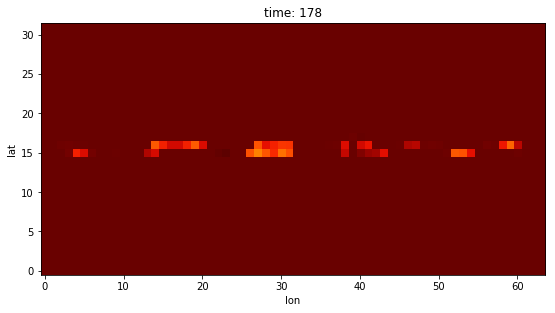
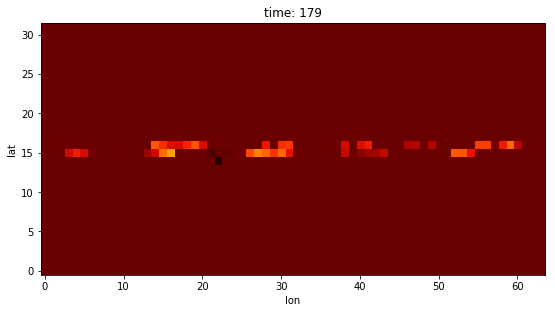
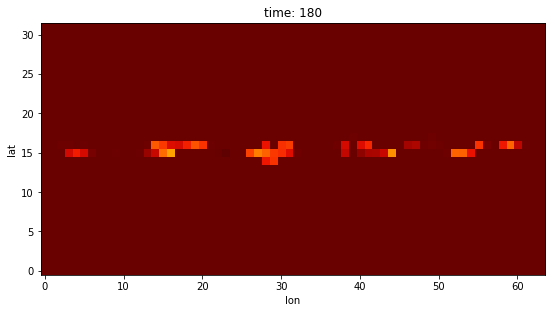
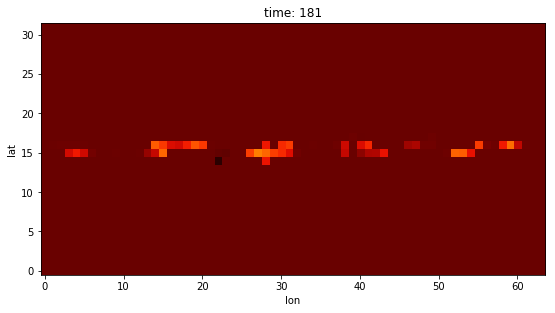
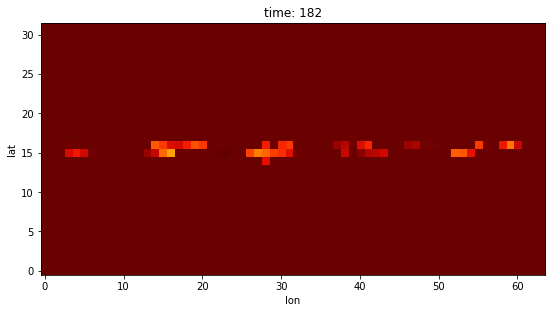
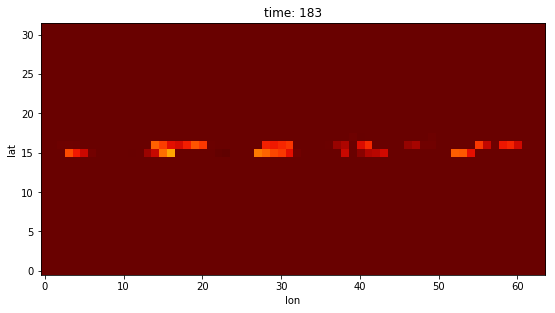
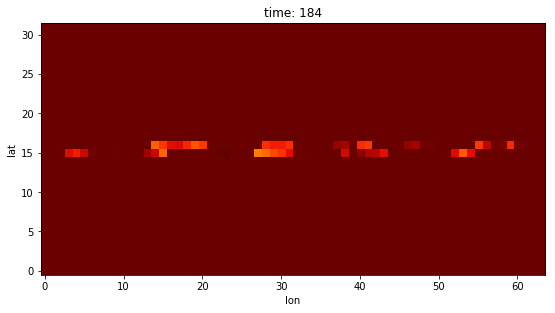
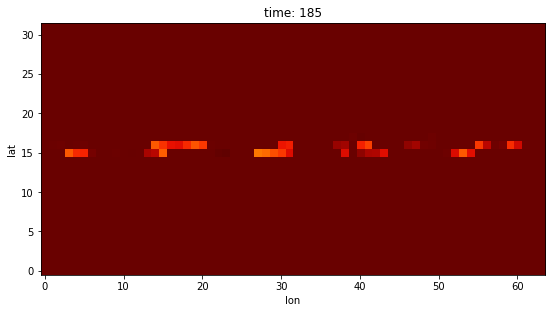
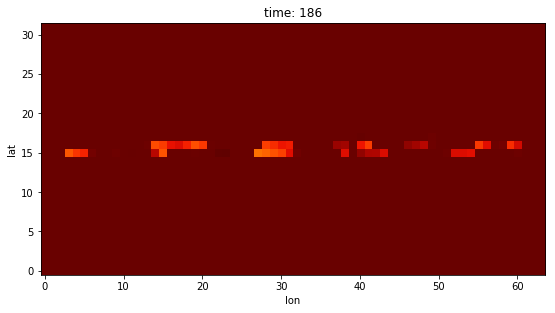
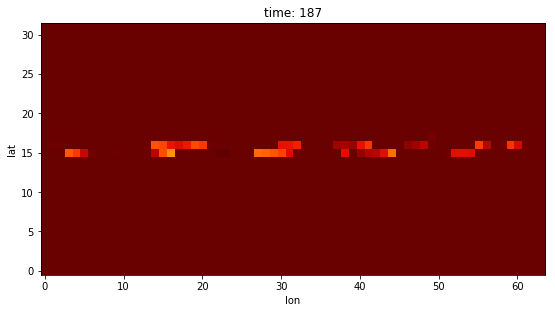
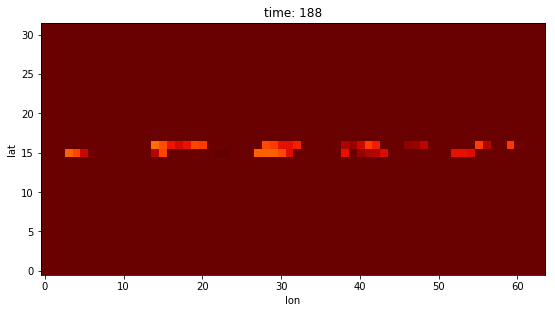
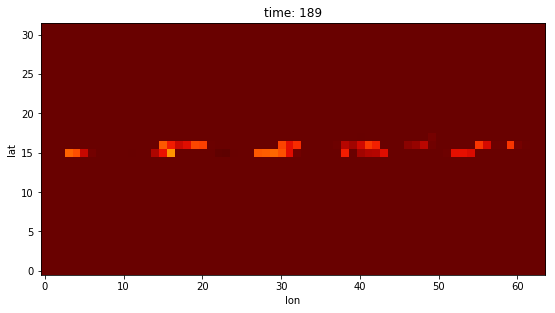
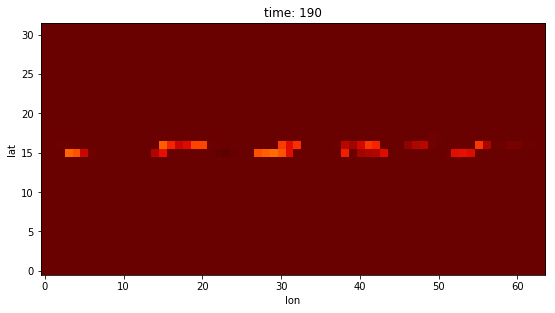
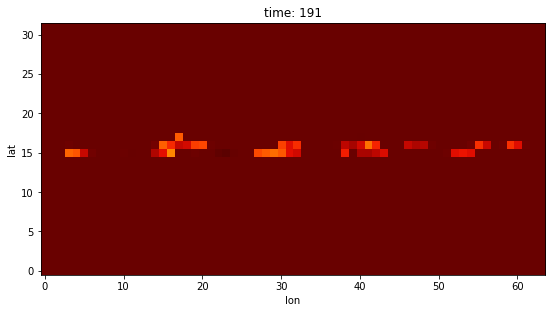
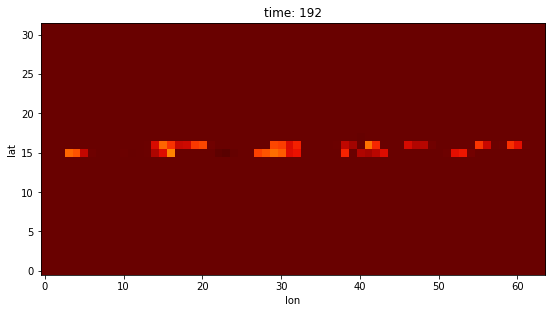
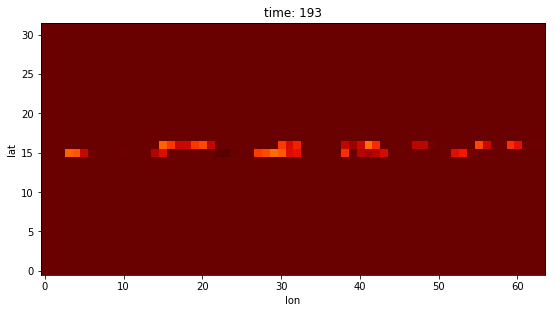
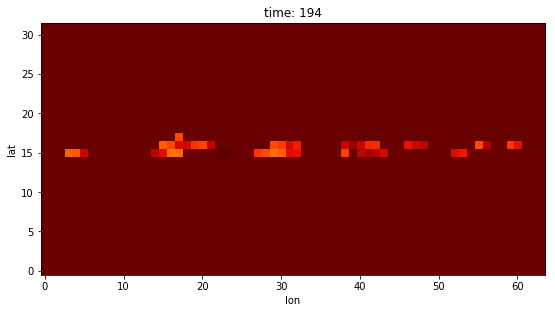
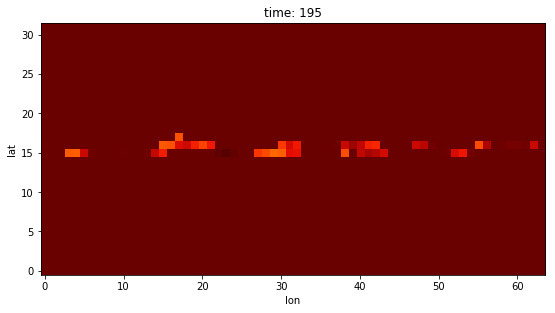
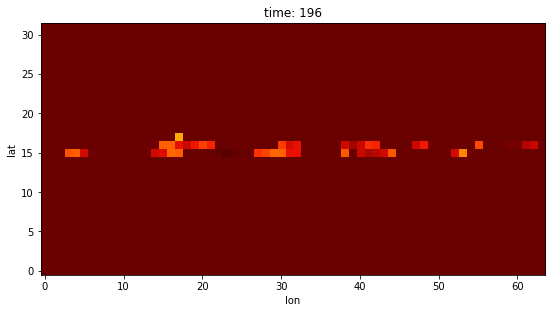
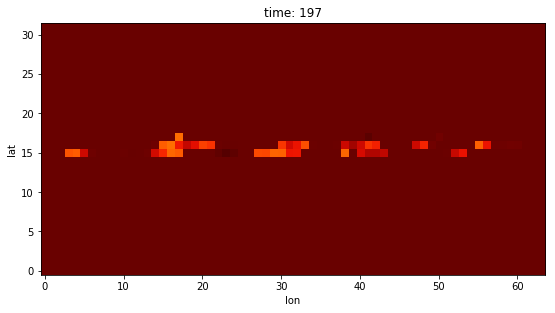
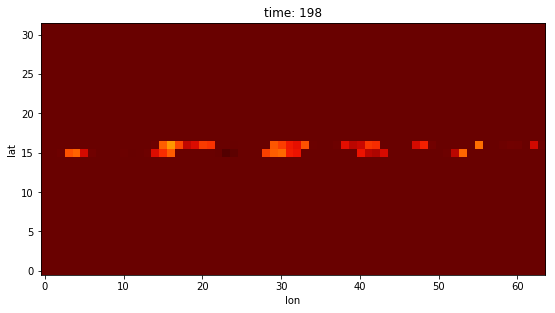
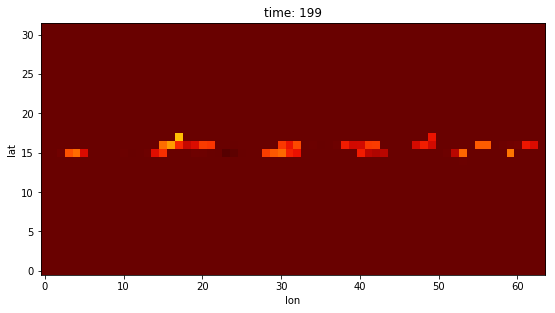

In [9]:
%%output holomap='scrubber'
images

In [10]:
ds = hv.Dataset(da[::5].isel(lat=16))

In [11]:
images = ds.to(hv.Image, ['lon', 'mid_levels']).options(fig_inches=(10, 5))

:HoloMap   [time]
   :Image   [lon,mid_levels]   (air_temperature)
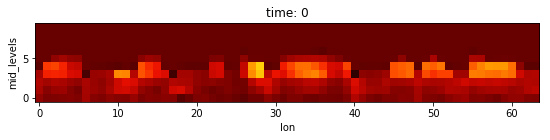
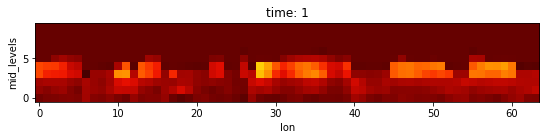
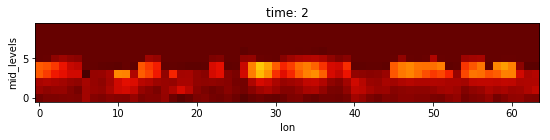
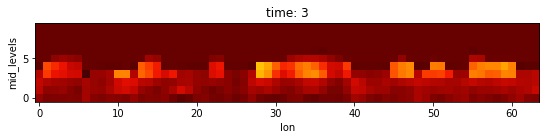
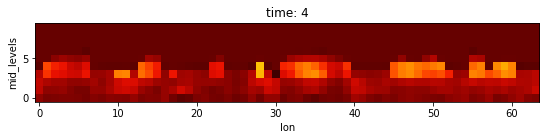
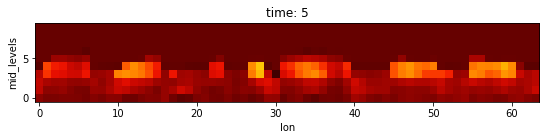
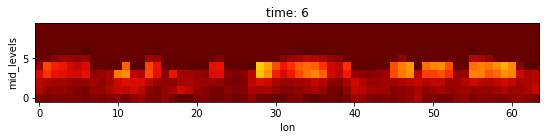
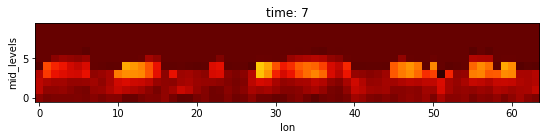
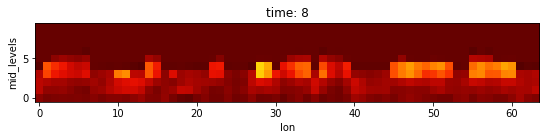
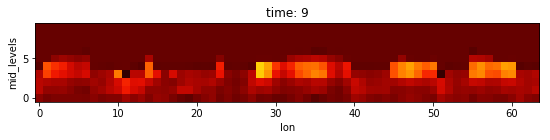
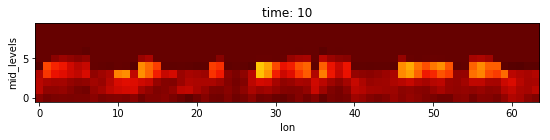
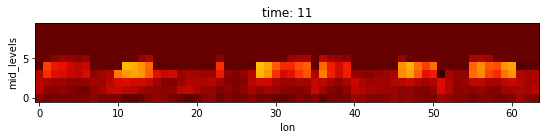
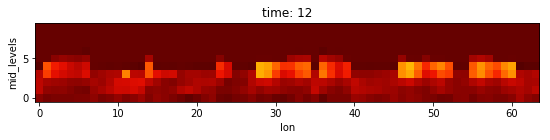
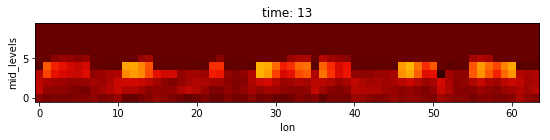
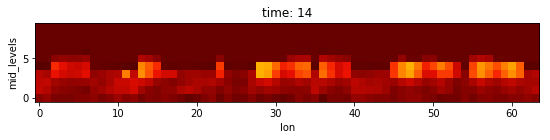
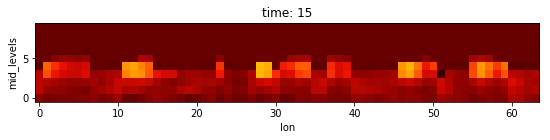
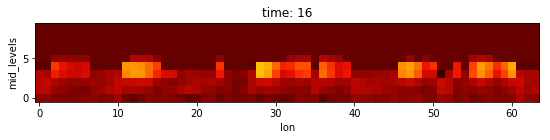
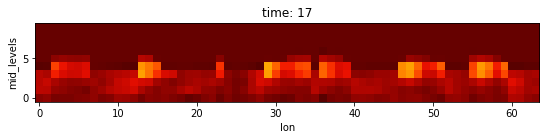
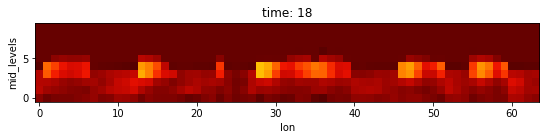
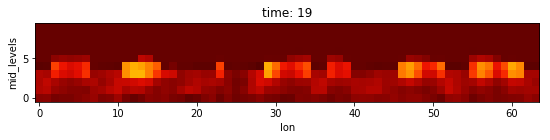
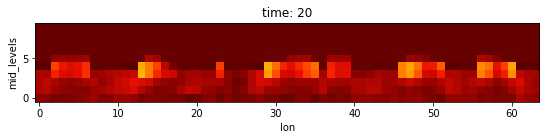
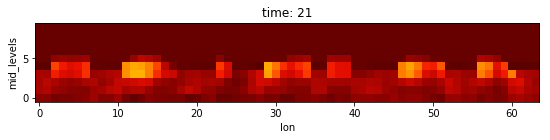
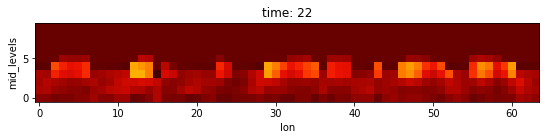
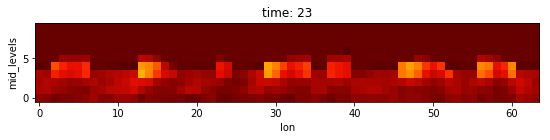
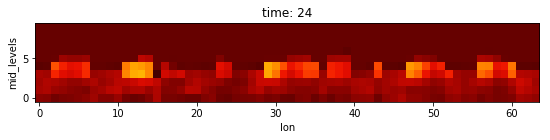
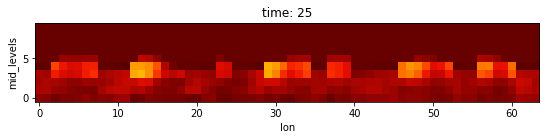
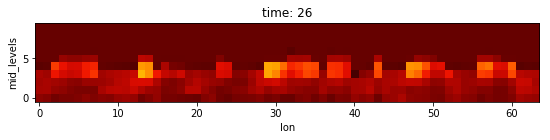
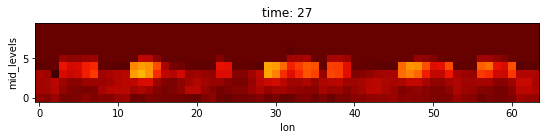
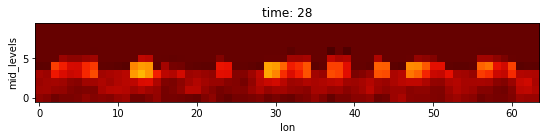
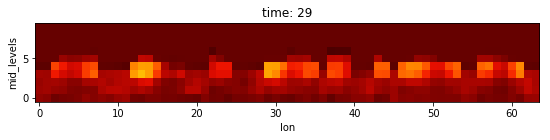
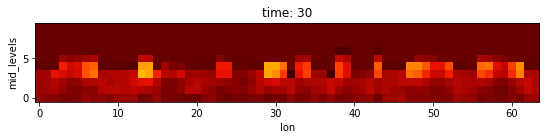
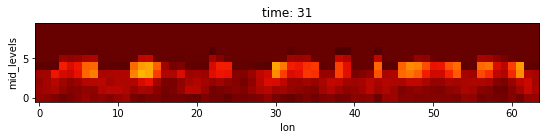
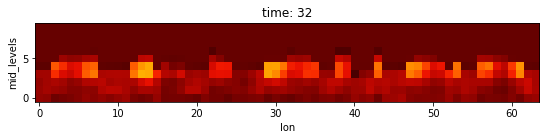
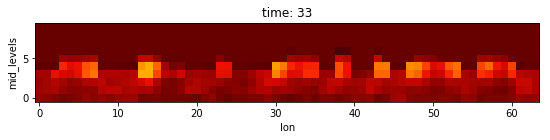
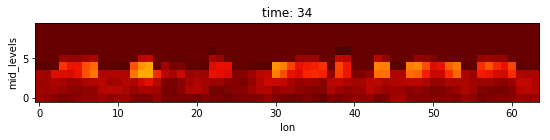
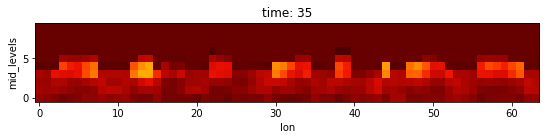
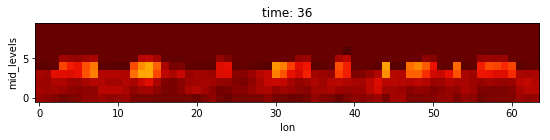
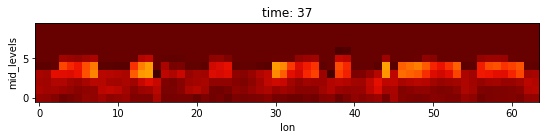
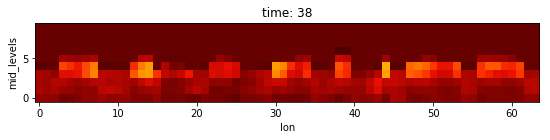
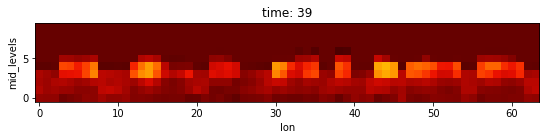
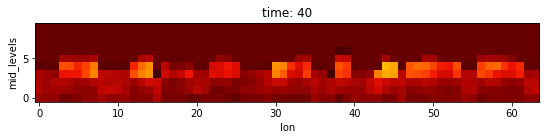
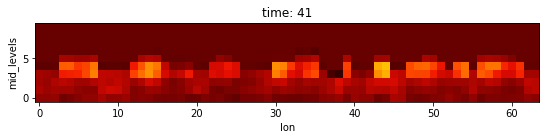
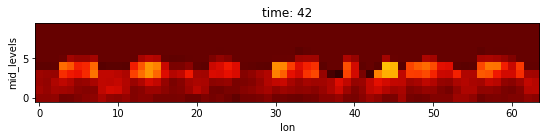
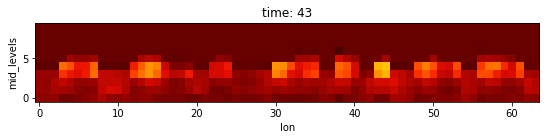
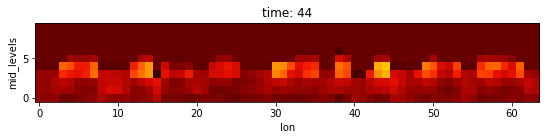
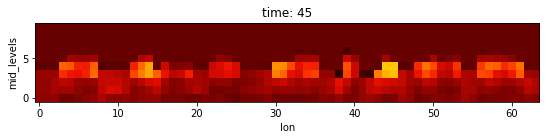
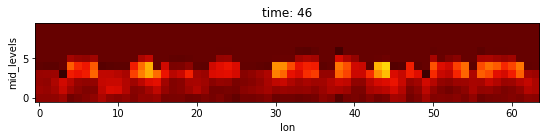
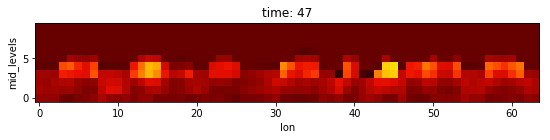
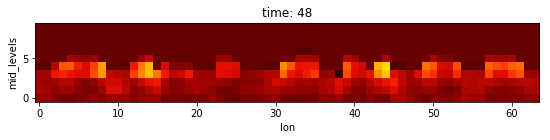
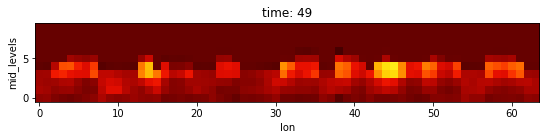
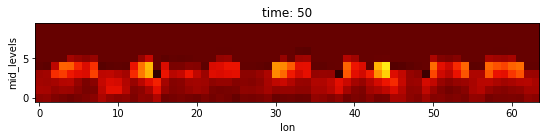
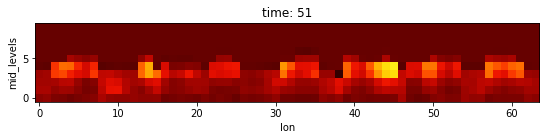
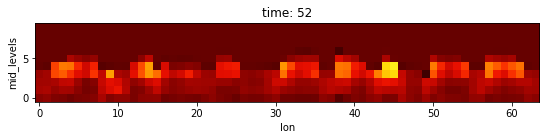
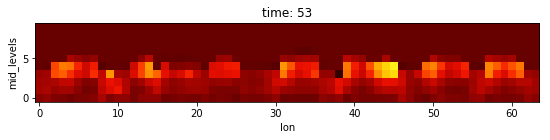
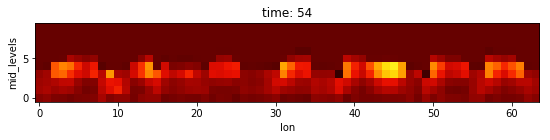
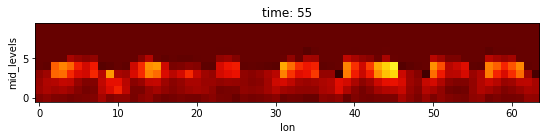
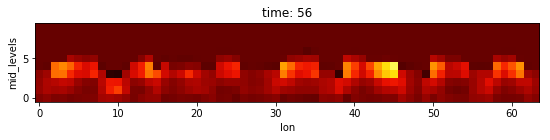
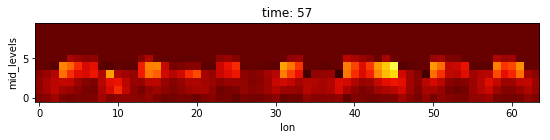
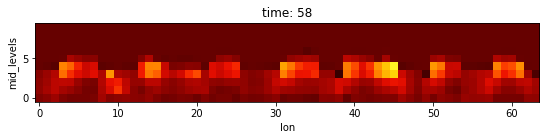
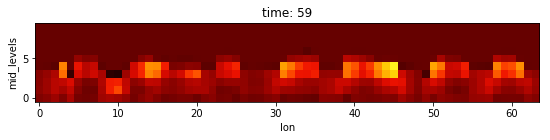
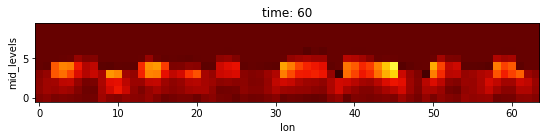
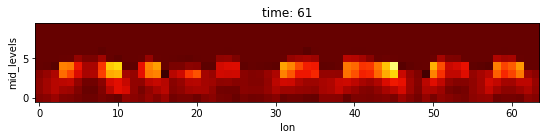
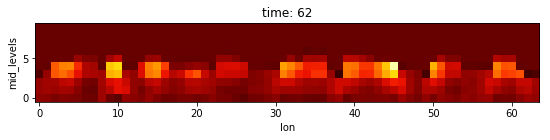
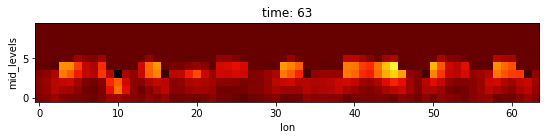
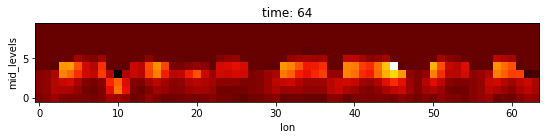
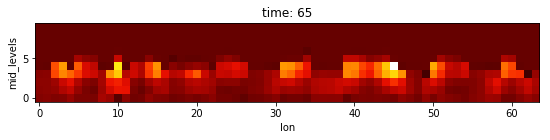
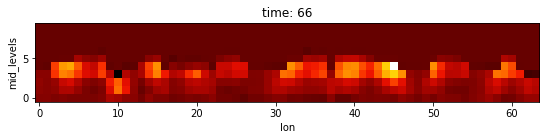
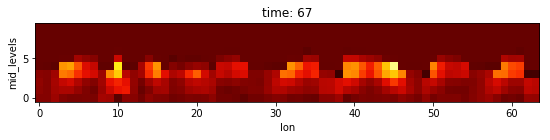
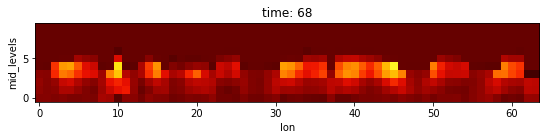
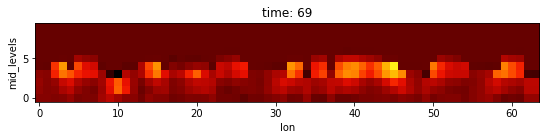
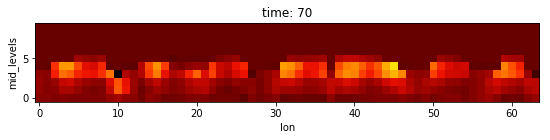
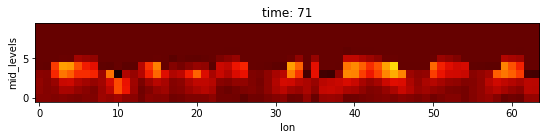
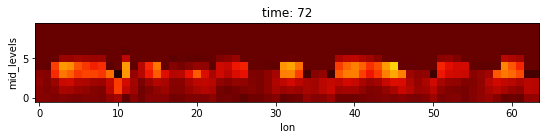
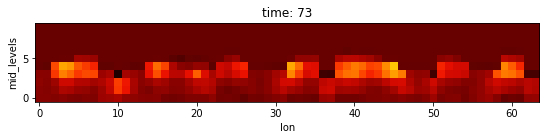
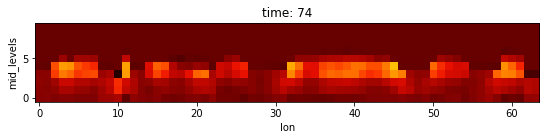
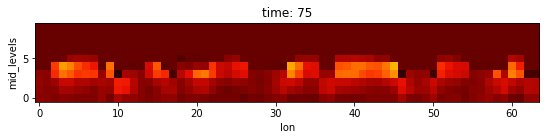
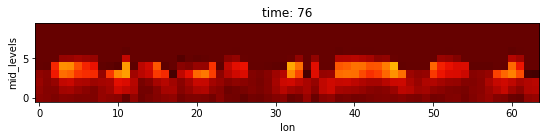
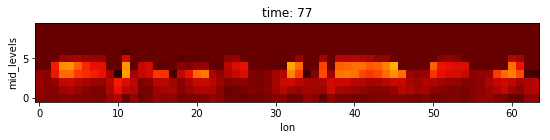
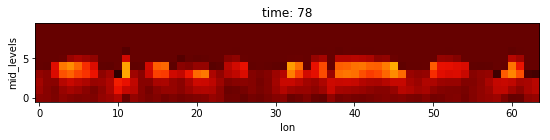
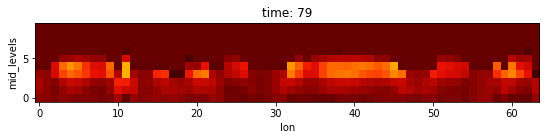
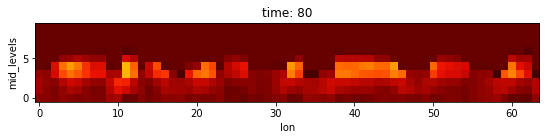
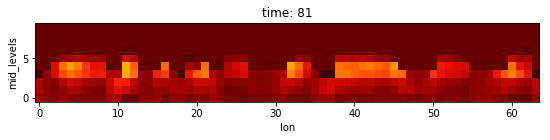
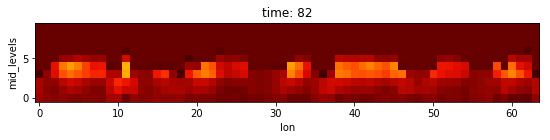
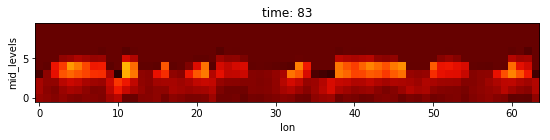
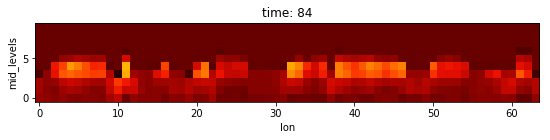
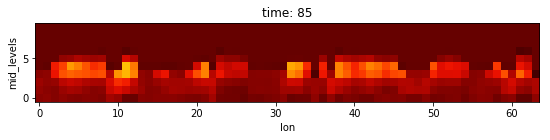
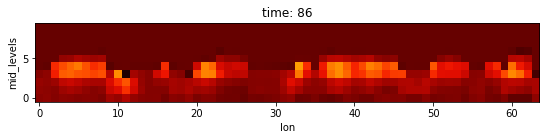
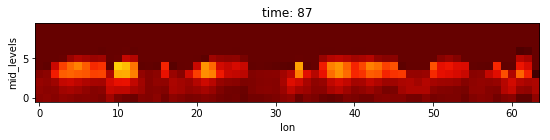
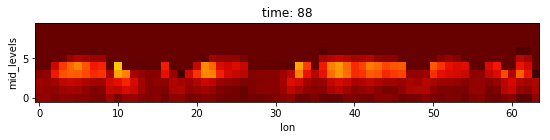
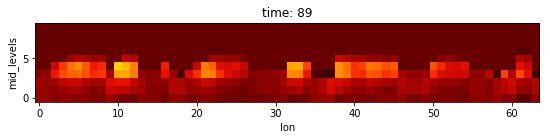
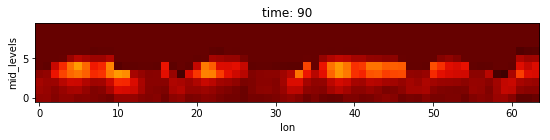
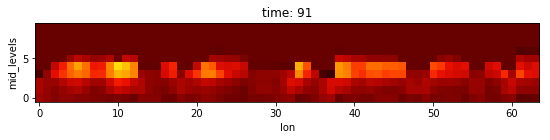
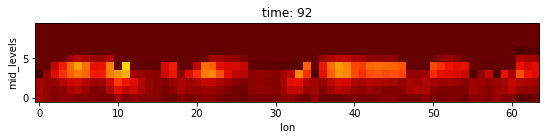
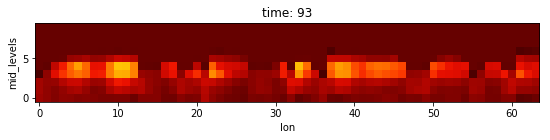
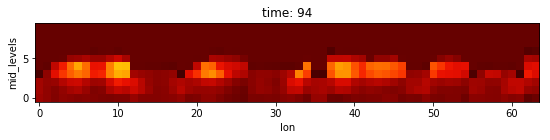
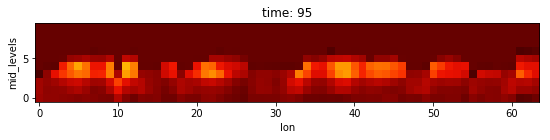
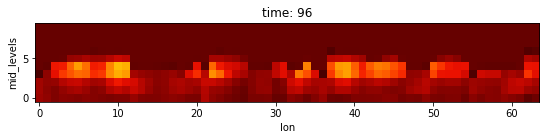
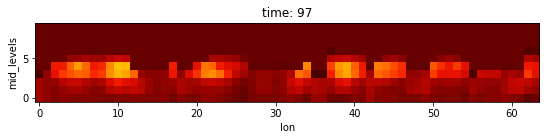
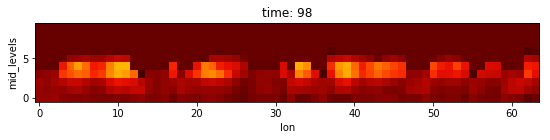
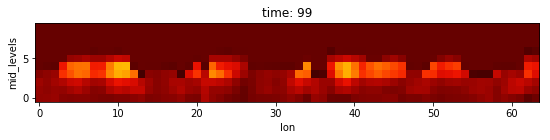
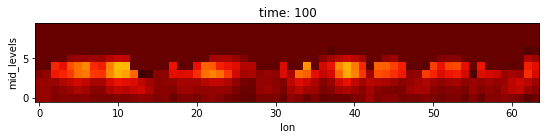
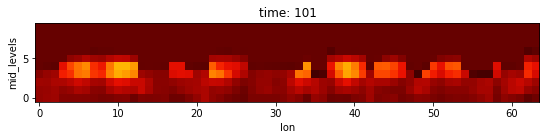
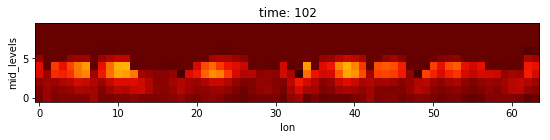
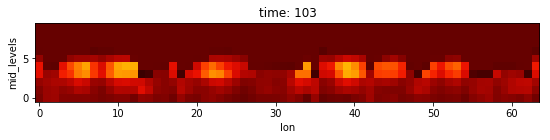
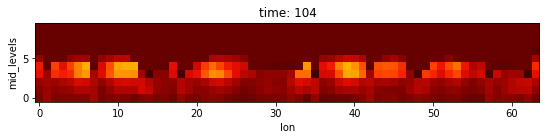
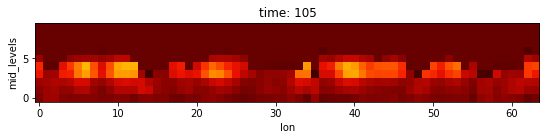
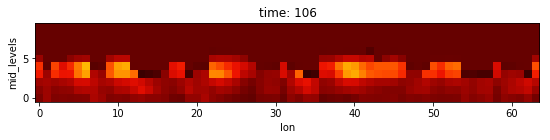
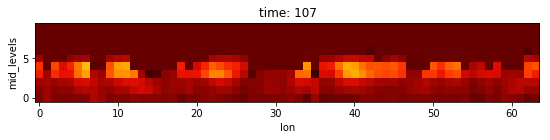
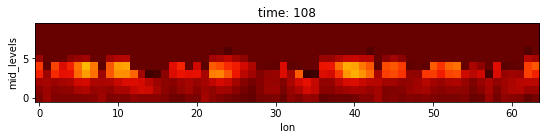
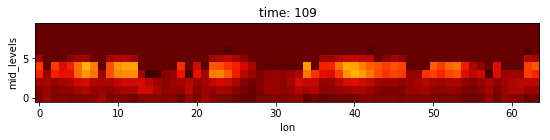
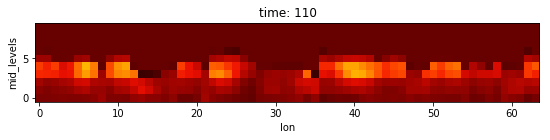
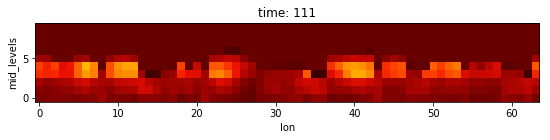
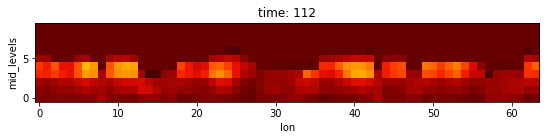
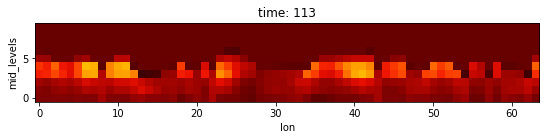
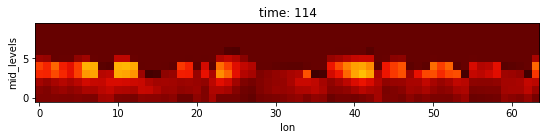
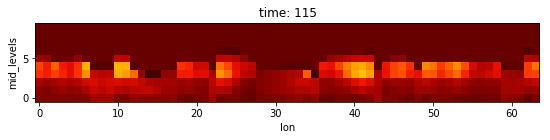
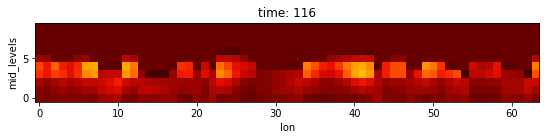
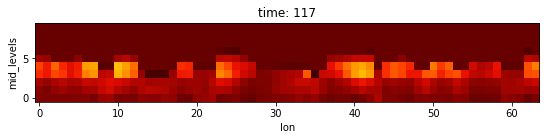
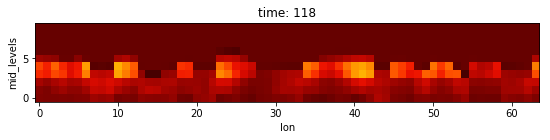
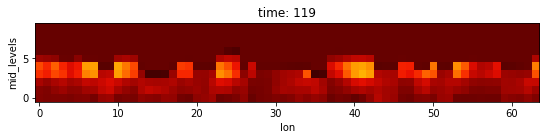
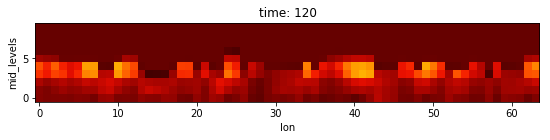
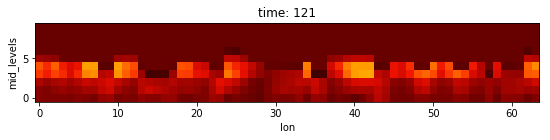
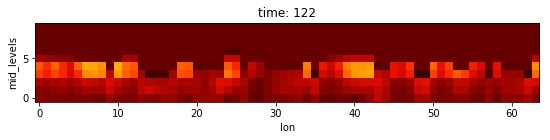
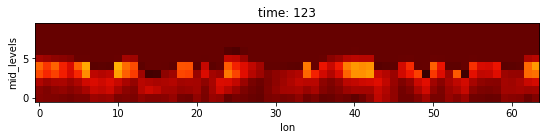
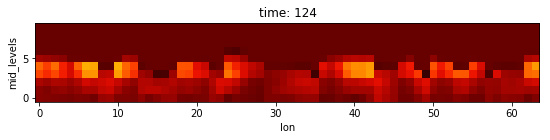
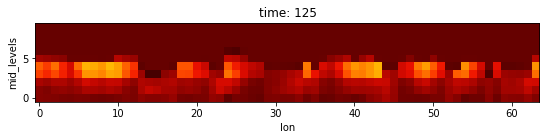
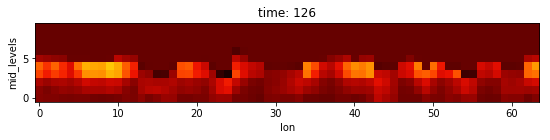
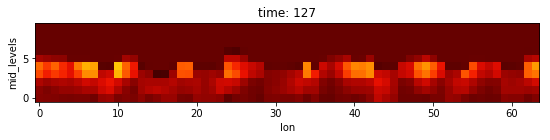
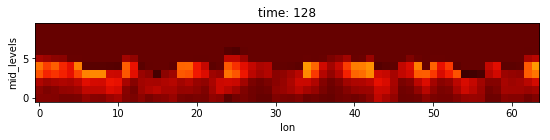
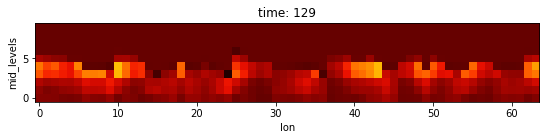
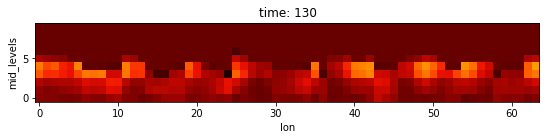
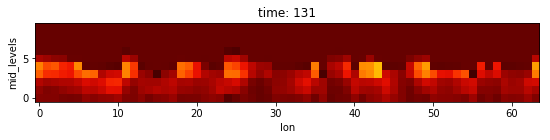
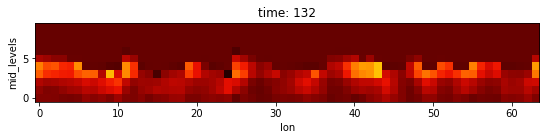
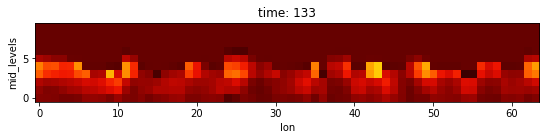
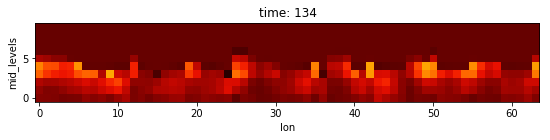
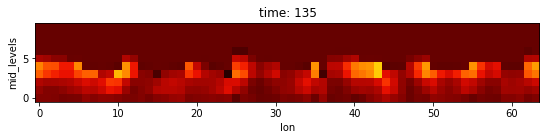
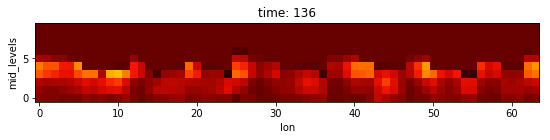
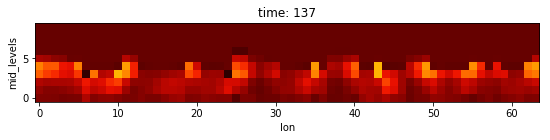
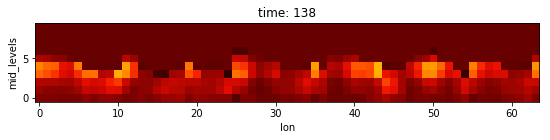
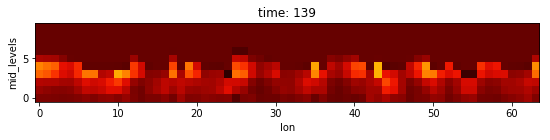
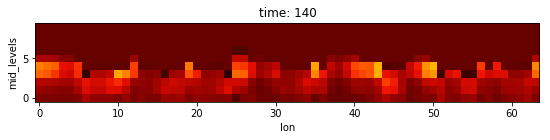
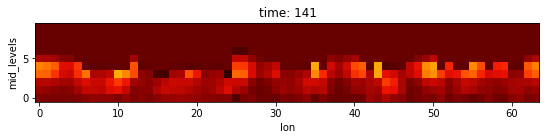
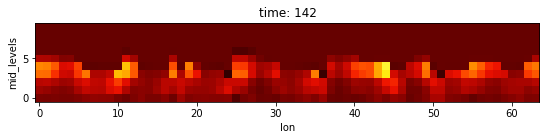
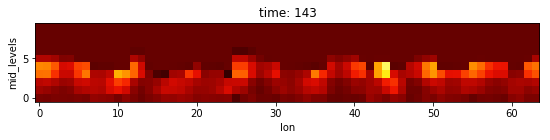
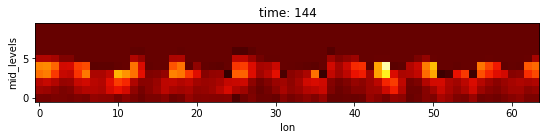
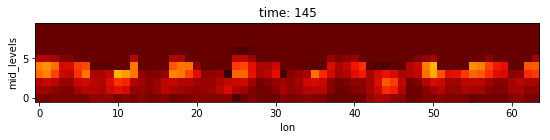
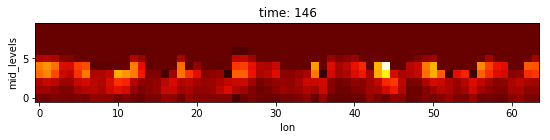
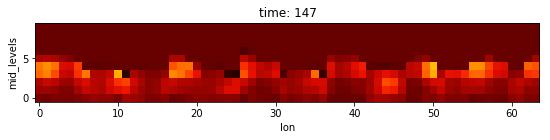
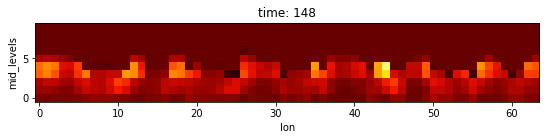
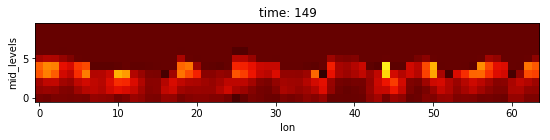
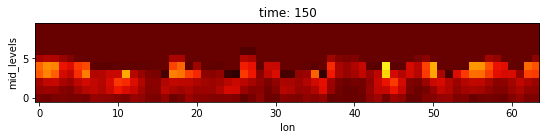
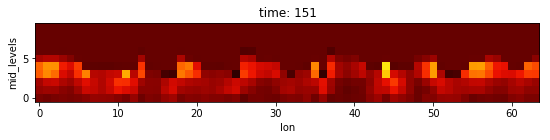
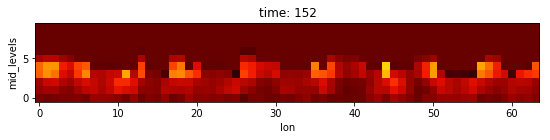
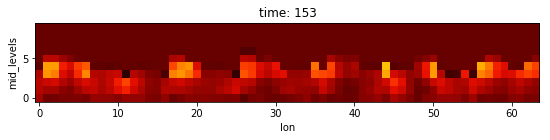
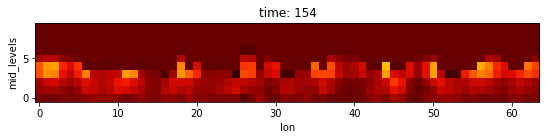
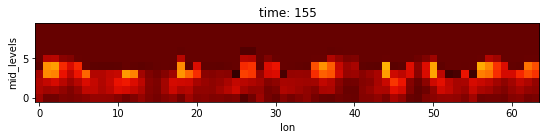
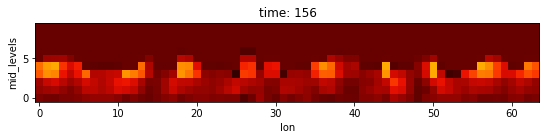
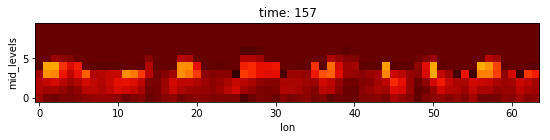
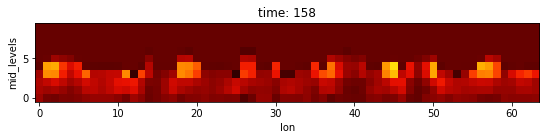
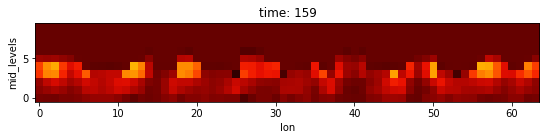
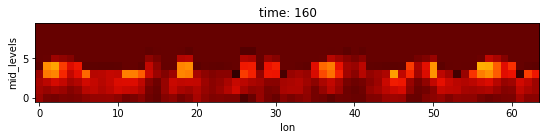
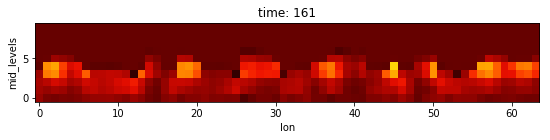
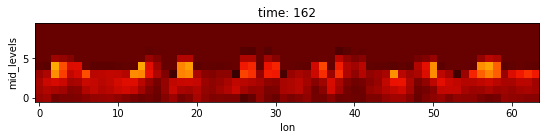
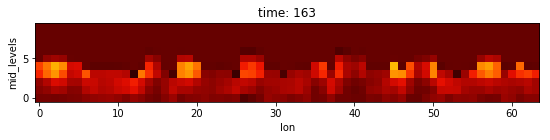
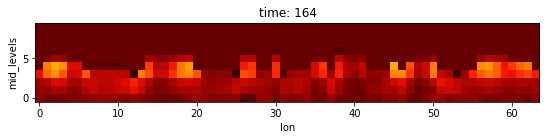
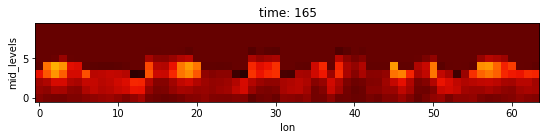
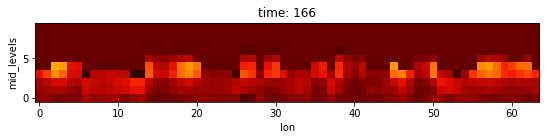
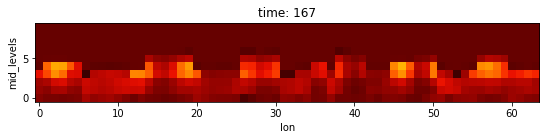
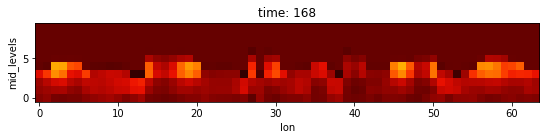
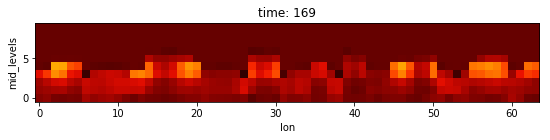
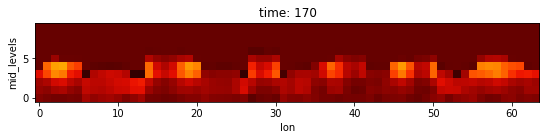
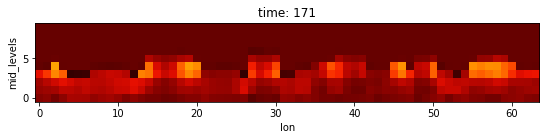
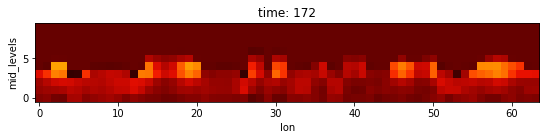
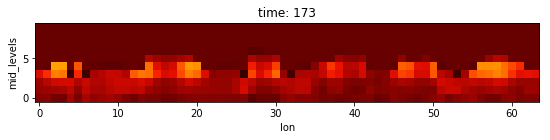
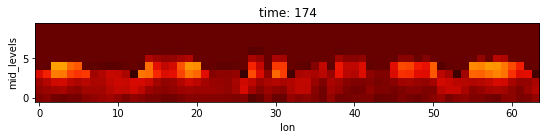
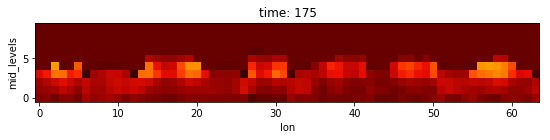
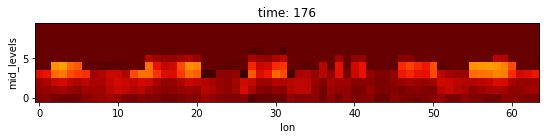
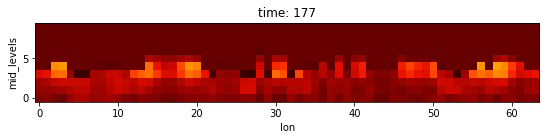
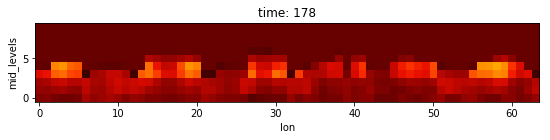
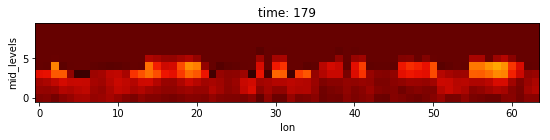
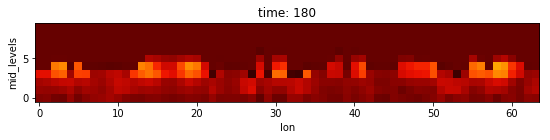
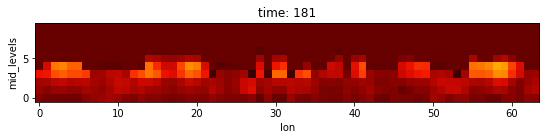
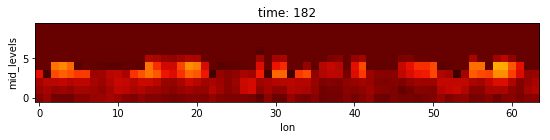
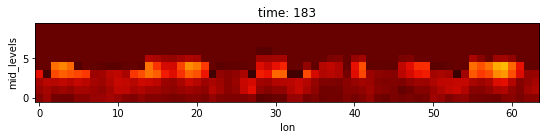
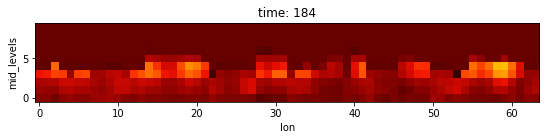
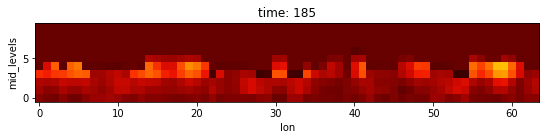
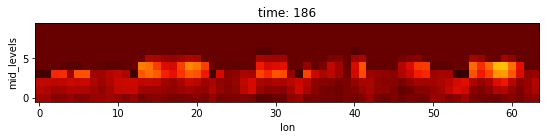
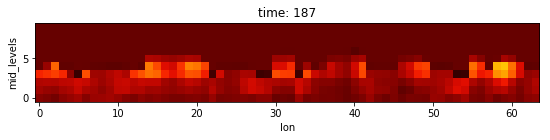
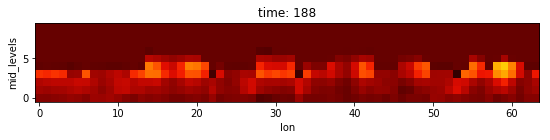
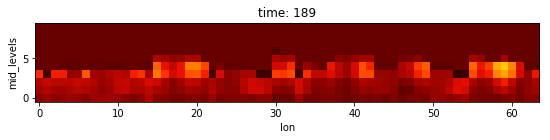
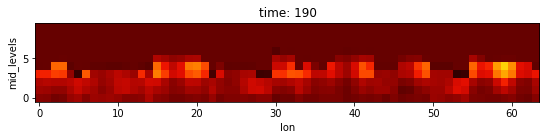
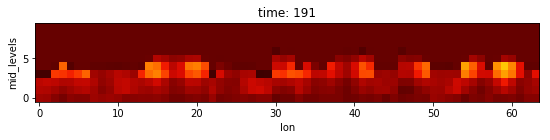
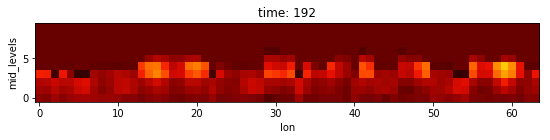
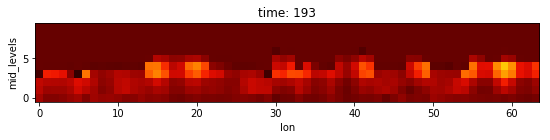
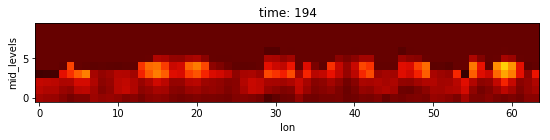
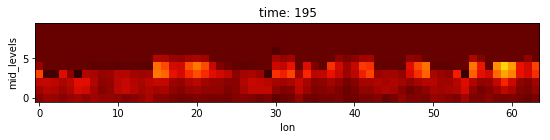
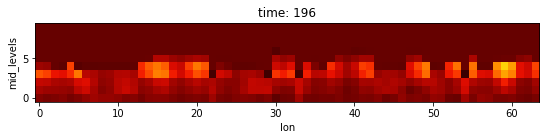
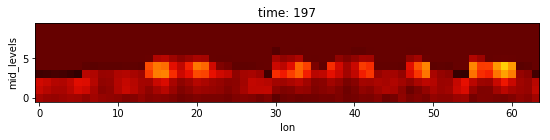
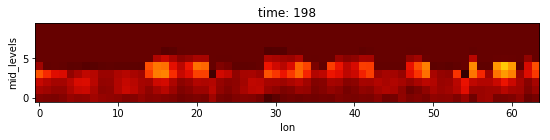
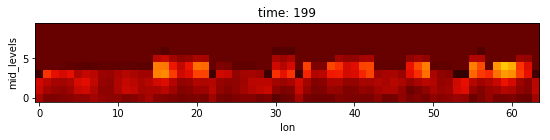

In [12]:
%%output holomap='scrubber'
images

## Extract the data for ML

https://github.com/CliMT/climt/blob/develop/climt/_components/emanuel/component.py

- Inputs: T, Q, U, V, P
- Output: dT, dQ, dU, dV

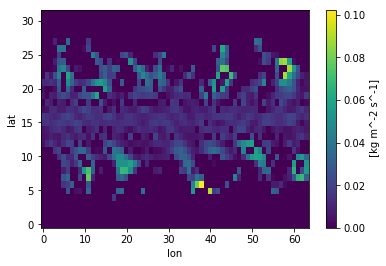

In [13]:
my_state['cloud_base_mass_flux'].plot()

In [14]:
len(s), len(t)

(1000, 1000)

In [15]:
s[0]

{'specific_humidity': <xarray.DataArray (mid_levels: 10, lat: 32, lon: 64)>
 array([[[2.254330e-04, 2.243003e-04, ..., 2.236766e-04, 2.252660e-04],
         [2.549796e-04, 2.381428e-04, ..., 2.621287e-04, 2.629566e-04],
         ...,
         [9.009154e-05, 1.265064e-04, ..., 2.442139e-05, 5.502462e-05],
         [1.805988e-04, 1.926905e-04, ..., 1.599537e-04, 1.695101e-04]],
 
        [[0.000000e+00, 3.586656e-06, ..., 0.000000e+00, 0.000000e+00],
         [1.719466e-04, 1.699353e-04, ..., 1.791860e-04, 1.752099e-04],
         ...,
         [2.304174e-04, 2.293190e-04, ..., 2.346795e-04, 2.321235e-04],
         [3.919668e-05, 3.674867e-05, ..., 4.413231e-05, 4.165348e-05]],
 
        ...,
 
        [[1.080058e-08, 7.342770e-09, ..., 1.934481e-08, 1.484797e-08],
         [3.520264e-08, 2.437320e-08, ..., 5.674823e-08, 4.641659e-08],
         ...,
         [7.509444e-08, 7.948946e-08, ..., 6.492230e-08, 7.013997e-08],
         [7.914297e-08, 7.826868e-08, ..., 8.066943e-08, 7.993167e-08

In [16]:
t[0]

{'air_temperature': <xarray.DataArray (lat: 32, lon: 64, mid_levels: 10)>
 array([[[0., 0., ..., 0., 0.],
         [0., 0., ..., 0., 0.],
         ...,
         [0., 0., ..., 0., 0.],
         [0., 0., ..., 0., 0.]],
 
        [[0., 0., ..., 0., 0.],
         [0., 0., ..., 0., 0.],
         ...,
         [0., 0., ..., 0., 0.],
         [0., 0., ..., 0., 0.]],
 
        ...,
 
        [[0., 0., ..., 0., 0.],
         [0., 0., ..., 0., 0.],
         ...,
         [0., 0., ..., 0., 0.],
         [0., 0., ..., 0., 0.]],
 
        [[0., 0., ..., 0., 0.],
         [0., 0., ..., 0., 0.],
         ...,
         [0., 0., ..., 0., 0.],
         [0., 0., ..., 0., 0.]]])
 Dimensions without coordinates: lat, lon, mid_levels
 Attributes:
     units:    degK s^-1,
 'specific_humidity': <xarray.DataArray (lat: 32, lon: 64, mid_levels: 10)>
 array([[[0., 0., ..., 0., 0.],
         [0., 0., ..., 0., 0.],
         ...,
         [0., 0., ..., 0., 0.],
         [0., 0., ..., 0., 0.]],
 
        [[0., 0., 

In [22]:
input_vars = ['air_temperature', 'specific_humidity', 'eastward_wind', 'northward_wind', 
              'air_pressure']
output_vars = ['air_temperature', 'specific_humidity', 'eastward_wind', 'northward_wind',
               'convective_precipitation_rate']

In [23]:
var = input_vars[0]

In [33]:
nz=10; nlat=32; nlon=64; ngeo = nlat*nlon

In [25]:
np.rollaxis(xr.concat([tt[var] for tt in t[::20]], dim='time').values, 3, 1).shape

(50, 10, 32, 64)

In [26]:
input_arr = []
for var in input_vars:
    input_arr.append(
        xr.concat([ss[var] for ss in s[::20]], dim='time').values.swapaxes(0, 1).reshape(nz, -1)
    )

In [27]:
input_arr = np.concatenate(input_arr).swapaxes(0, 1); input_arr.shape

(102400, 50)

In [28]:
output_arr = []
for var in output_vars[:-1]:
    output_arr.append(
        np.rollaxis(xr.concat([tt[var] for tt in t[::20]], dim='time').values, 3, 1).swapaxes(0, 1).reshape(nz, -1)
    )

In [29]:
var = output_vars[-1]
output_arr.append(
    xr.concat([ss[var] for ss in s[::20]], dim='time').values.reshape(-1)[None]
)

In [30]:
output_arr = np.concatenate(output_arr).swapaxes(0, 1); output_arr.shape

(102400, 41)

In [31]:
output_arr[0].shape

(41,)

In [34]:
output_arr[0, -ngeo:].shape

(41,)

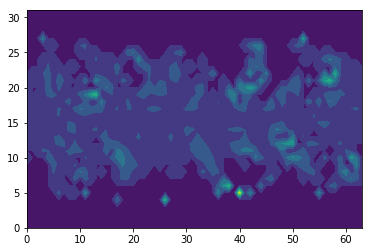

In [37]:
plt.contourf(output_arr[-ngeo:, 1].reshape((nlat, nlon)))

In [38]:
inp_re = input_arr[-ngeo:, :].reshape(nlat, nlon, -1); inp_re.shape
out_re = output_arr[-ngeo:, :].reshape(nlat, nlon, -1); out_re.shape


(32, 64, 41)

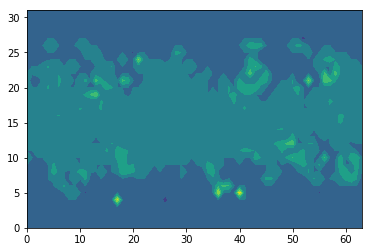

In [39]:
plt.contourf(out_re[..., 2])

### Normalize

In [40]:
input_mean = input_arr.mean(0)
input_std = input_arr.std(0)

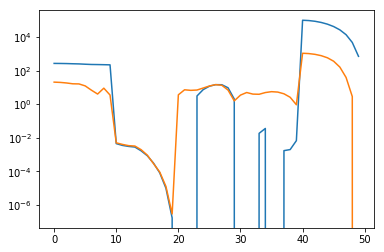

In [41]:
plt.plot(input_mean)
plt.plot(input_std)
plt.yscale('log')

In [42]:
output_mean = output_arr.mean(0)
output_std = output_arr.std(0)

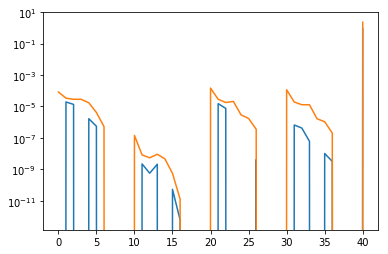

In [43]:
plt.plot(output_mean)
plt.plot(output_std)
plt.yscale('log')

In [44]:
input_scaled = (input_arr - input_mean) / np.maximum(1e-5, input_std)

In [45]:
output_scaled = (output_arr - output_mean) / np.maximum(1e-5, output_std)

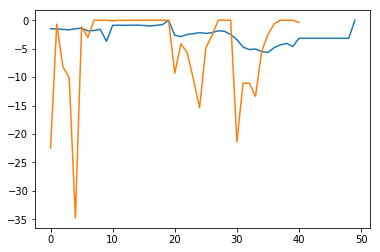

In [46]:
plt.plot(input_scaled.min(0))
plt.plot(output_scaled.min(0))

In [47]:
input_train = input_scaled[:80000]
input_valid = input_scaled[80000:]
output_train = output_scaled[:80000]
output_valid = output_scaled[80000:]

## Train a simple neural network

In [48]:
import tensorflow.keras as keras
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split

In [49]:
input_scaled.shape, output_scaled.shape

((102400, 50), (102400, 41))

In [50]:
model = keras.models.Sequential([
    Dense(128, input_shape=(50,), activation='elu'),
    Dense(128, activation='elu'),
    Dense(41)
])

Instructions for updating:
Colocations handled automatically by placer.


In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               6528      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 41)                5289      
Total params: 28,329
Trainable params: 28,329
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(keras.optimizers.Adam(lr=1e-4), 'mse')

Instructions for updating:
Use tf.cast instead.


In [53]:
input_scaled.shape

(102400, 50)

In [54]:
model.fit(input_train, output_train, batch_size=32, epochs=10, 
          validation_data=(input_valid, output_valid))

Instructions for updating:
Use tf.cast instead.


Train on 80000 samples, validate on 22400 samples
Epoch 1/10
80000/80000 [==============================] - 11s 141us/sample - loss: 0.2454 - val_loss: 0.2113
Epoch 2/10
80000/80000 [==============================] - 11s 137us/sample - loss: 0.1986 - val_loss: 0.1970
Epoch 3/10
80000/80000 [==============================] - 11s 133us/sample - loss: 0.1859 - val_loss: 0.1893
Epoch 4/10
80000/80000 [==============================] - 12s 146us/sample - loss: 0.1778 - val_loss: 0.1835
Epoch 5/10
80000/80000 [==============================] - 13s 160us/sample - loss: 0.1720 - val_loss: 0.1786
Epoch 6/10
80000/80000 [==============================] - 13s 165us/sample - loss: 0.1676 - val_loss: 0.1774
Epoch 7/10
80000/80000 [==============================] - 12s 151us/sample - loss: 0.1640 - val_loss: 0.1732
Epoch 8/10
80000/80000 [==============================] - 11s 140us/sample - loss: 0.1611 - val_loss: 0.1720
Epoch 9/10
80000/80000 [==============================] - 11s 138us/sample - l

In [55]:
preds = model.predict(input_valid, 10000)

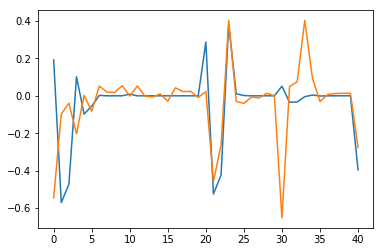

In [56]:
i = 102
plt.plot(output_valid[i])
plt.plot(preds[i])

In [57]:
ngeo = nlat * nlon

In [58]:
inp_re = input_valid[-ngeo:, :].reshape(nlat, nlon, -1); inp_re.shape
out_re = output_valid[-ngeo:, :].reshape(nlat, nlon, -1); out_re.shape
pred_re = preds[-ngeo:, :].reshape(nlat, nlon, -1); pred_re.shape

(32, 64, 41)

In [59]:
out_resc = out_re * np.maximum(1e-5, output_std) + output_mean
pred_resc = pred_re * np.maximum(1e-5, output_std) + output_mean

In [60]:
np.min(input_valid[0])

-1.3365513465900953

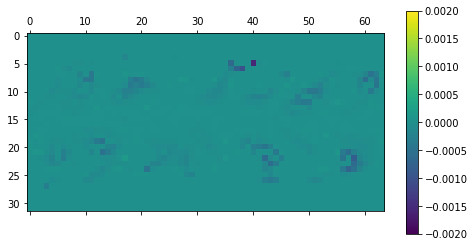

In [68]:
plt.matshow(out_resc[..., 0], vmin=-0.002, vmax=0.002)
plt.colorbar()

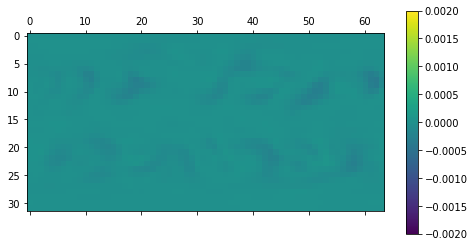

In [69]:
plt.matshow(pred_resc[..., 0], vmin=-0.002, vmax=0.002)
plt.colorbar()

## Create a NN component

In [70]:
from sympl import TendencyComponent, initialize_numpy_arrays_with_properties

In [71]:
import pdb

In [72]:
class NNConvection(TendencyComponent):
    input_properties = {
        'air_temperature': {
            'dims': ['*', 'mid_levels'],
            'units': 'degK',
        },
        'specific_humidity': {
            'dims': ['*', 'mid_levels'],
            'units': 'kg/kg',
        },
        'eastward_wind': {
            'dims': ['*', 'mid_levels'],
            'units': 'm s^-1',
        },
        'northward_wind': {
            'dims': ['*', 'mid_levels'],
            'units': 'm s^-1',
        },
        'air_pressure': {
            'dims': ['*', 'mid_levels'],
            'units': 'mbar',
        },
    }
    
    diagnostic_properties = {
        'convective_precipitation_rate': {
            'dims': ['*'],
            'units': 'mm day^-1',
        },
    }
    
    tendency_properties = {
        'air_temperature': {'units': 'degK s^-1'},
        'specific_humidity': {'units': 'kg/kg s^-1'},
        'eastward_wind': {'units': 'm s^-2'},
        'northward_wind': {'units': 'm s^-2'},
    }
    input_vars = ['air_temperature', 'specific_humidity', 'eastward_wind', 'northward_wind', 
              'air_pressure']
    output_vars = ['air_temperature', 'specific_humidity', 'eastward_wind', 'northward_wind',
               'convective_precipitation_rate']
    
    def __init__(self, net, input_mean, input_std, output_mean, output_std, **kwargs):
        self.net = net
        self.input_mean, self.input_std, self.output_mean, self.output_std = \
            input_mean, input_std, output_mean, output_std
        super().__init__(self, **kwargs)
        
    def array_call(self, state):
        # Allocate arrays
        tendencies = initialize_numpy_arrays_with_properties(
            self.tendency_properties, state, self.input_properties
        )
        diagnostics = initialize_numpy_arrays_with_properties(
            self.diagnostic_properties, state, self.input_properties
        )
        
        # Concat input dimension
        ncol, nz = state['air_temperature'].shape
        input_arr = []
        for var in input_vars:
            input_arr.append(state[var])
            if var == 'air_pressure': input_arr[-1] *= 100
        input_arr = np.concatenate(input_arr, 1)
        
        # Scale input
        input_scaled = (input_arr - self.input_mean) / np.maximum(1e-5, self.input_std)
        # Predict with network
#         pdb.set_trace()
        preds = self.net.predict(input_scaled, 10000)
        # Unscale output
        preds = preds * np.maximum(1e-5, self.output_std) + self.output_mean
        
        # Split into tendencies
        tendencies['air_temperature'] = preds[:, :nz]
        tendencies['specific_humidity'] = preds[:, nz:nz*2]
        tendencies['eastward_wind'] = preds[:, nz*2:nz*3]
        tendencies['northward_wind'] = preds[:, nz*3:nz*4]
        
        diagnostics['convective_precipitation_rate'] = preds[:, -1]
        
        return tendencies, diagnostics

## Running the ML model

In [85]:
import pickle
with open('./state.pkl', 'rb') as f:
    my_state = pickle.load(f)

In [86]:
nn_convection = NNConvection(model, input_mean, input_std, output_mean, output_std)
convection = climt.EmanuelConvection()

In [87]:
tendencies, _ = convection(my_state, model_time_step)

In [88]:
nn_tendencies, _ = nn_convection(my_state)

In [89]:
output_vars

['air_temperature',
 'specific_humidity',
 'eastward_wind',
 'northward_wind',
 'convective_precipitation_rate']

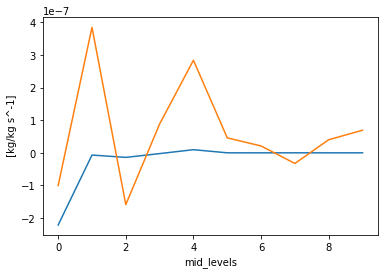

In [93]:
var = 'specific_humidity'
tendencies[var].isel(lat=16, lon=0).plot()
nn_tendencies[var].isel(lat=16, lon=0).plot()

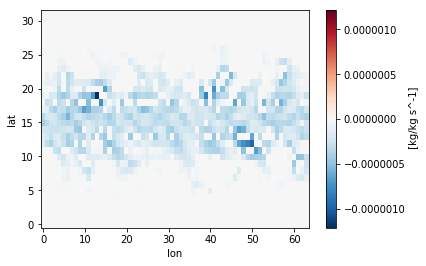

In [77]:
tendencies['specific_humidity'].isel(mid_levels=0).plot()

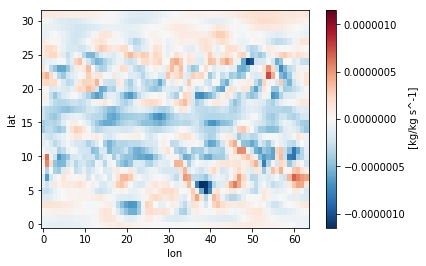

In [78]:
nn_tendencies['specific_humidity'].isel(mid_levels=0).plot()

In [79]:
climt.set_constants_from_dict({
    'stellar_irradiance': {'value': 200, 'units': 'W m^-2'}})

model_time_step = timedelta(seconds=900)

# Create components
convection = NNConvection(model, input_mean, input_std, output_mean, output_std)
simple_physics = TimeDifferencingWrapper(climt.SimplePhysics())

radiation = climt.GrayLongwaveRadiation()

dycore = climt.GFSDynamicalCore(
    [simple_physics, radiation,
     convection], number_of_damped_levels=2
)
grid = climt.get_grid(nx=64, ny=32, nz=10)

# Create model state
my_state = climt.get_default_state([dycore], grid_state=grid)

# Set initial/boundary conditions
latitudes = my_state['latitude'].values
longitudes = my_state['longitude'].values
surface_shape = latitudes.shape

temperature_equator = 300
temperature_pole = 240

temperature_profile = temperature_equator - (
    (temperature_equator - temperature_pole)*(
        np.sin(np.radians(latitudes))**2))

my_state['surface_temperature'] = DataArray(
    temperature_profile*np.ones(surface_shape),
    dims=['lat', 'lon'], attrs={'units': 'degK'})
my_state['eastward_wind'].values[:] = np.random.randn(
    *my_state['eastward_wind'].shape)

## Run the model and save tendencies for ML learning

In [80]:
import pickle
with open('./state.pkl', 'rb') as f:
    my_state = pickle.load(f)

In [81]:
s = []
t = []
for i in tqdm(range(1000)):
    # Get convection tendencies
    tendencies, _ = convection(my_state)
    t.append(tendencies)
    diag, my_state = dycore(my_state, model_time_step)
    my_state.update(diag)
    my_state['time'] += model_time_step
    s.append(my_state)

/Users/stephanrasp/miniconda3/lib/python3.7/site-packages/sympl/_core/tracers.py:202: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  array[tracer_slice] = raw_state[name]
/Users/stephanrasp/miniconda3/lib/python3.7/site-packages/sympl/_core/tracers.py:229: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  raw_state[name] = tracer_array[tracer_slice]
/Users/stephanrasp/miniconda3/lib/python3.7/site-packages/climt/_components/gfs/component.py:582: RuntimeWarning: invalid value encountered in less
  array[array < 0] = 0
/Users/stephanrasp/minicon

KeyboardInterrupt: 

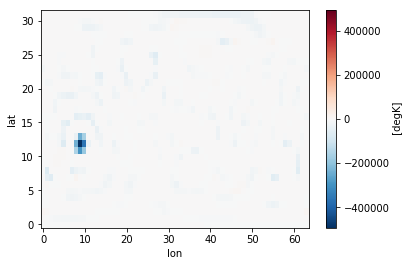

In [82]:
s[5]['air_temperature'].isel(mid_levels=0).plot()

In [392]:
da = xr.concat([tt['air_temperature'] for tt in t], dim='time')
da.name='air_temperature'

In [418]:
ds = hv.Dataset(da[:10].isel(mid_levels=5))

In [419]:
images = ds.to(hv.Image, ['lon', 'lat']).options(fig_inches=(10, 5))

/Users/stephanrasp/miniconda3/lib/python3.7/site-packages/xarray/core/nputils.py:220: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwds)
/Users/stephanrasp/miniconda3/lib/python3.7/site-packages/xarray/core/nputils.py:220: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwds)
/Users/stephanrasp/miniconda3/lib/python3.7/site-packages/xarray/core/nputils.py:220: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwds)
/Users/stephanrasp/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/element.py:877: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)
/Users/stephanrasp/miniconda3/lib/python3.7/site-packages/holoviews/plotting/mpl/element.py:877: RuntimeWarning: All-NaN slice encountered
  el_min, el_max = np.nanmin(values), np.nanmax(values)
/Users/stephanrasp/miniconda3/lib/python

:HoloMap   [time]
   :Image   [lon,lat]   (air_temperature)
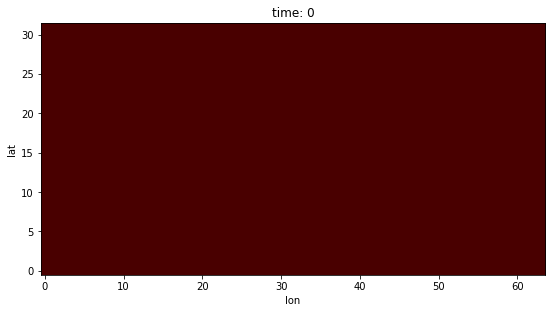
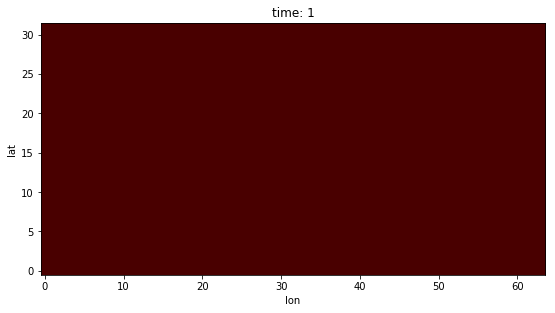
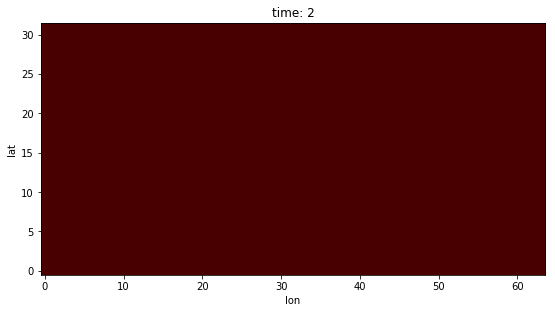
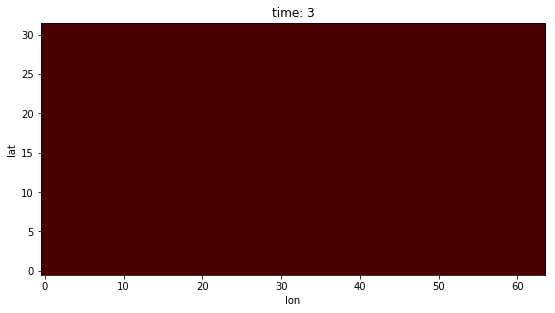
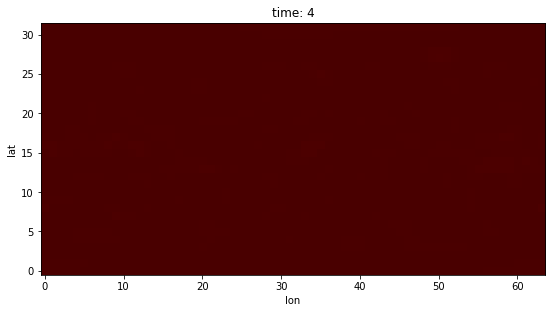
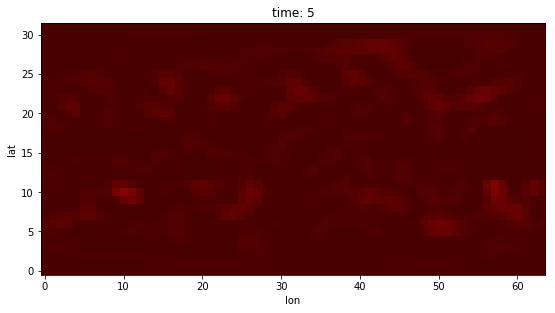
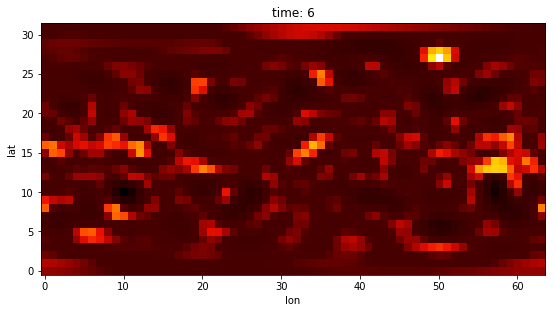
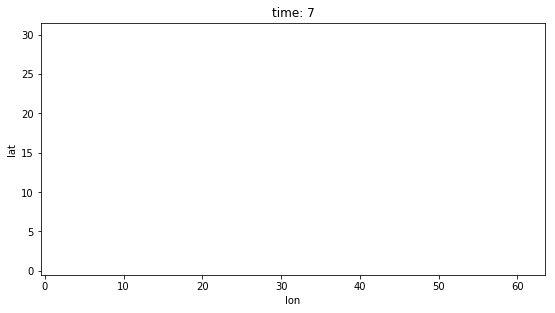
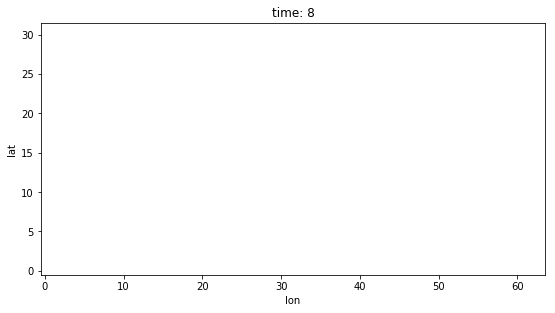
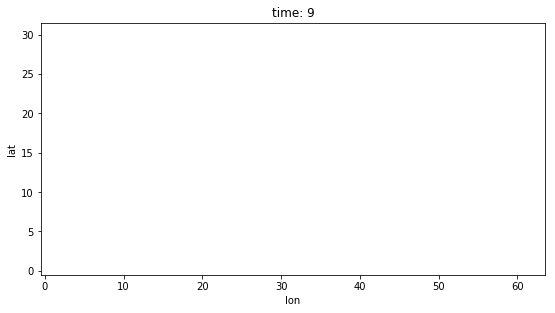

In [420]:
%%output holomap='scrubber'
images

In [81]:
ds = hv.Dataset(da[::5].isel(lat=16))

In [82]:
images = ds.to(hv.Image, ['lon', 'mid_levels']).options(fig_inches=(10, 5))

:HoloMap   [time]
   :Image   [lon,mid_levels]   (air_temperature)
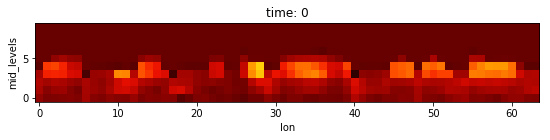
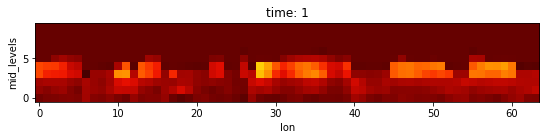
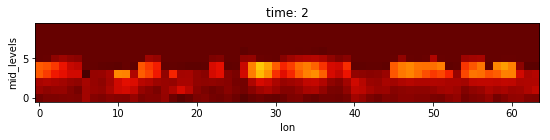
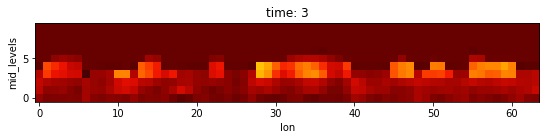
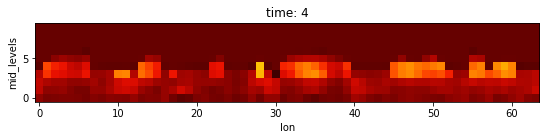
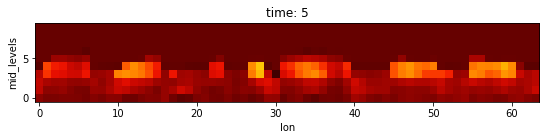
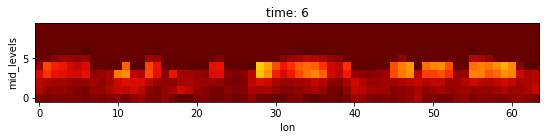
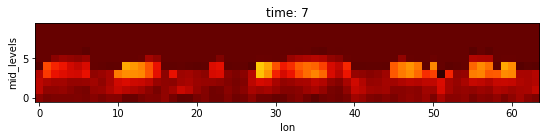
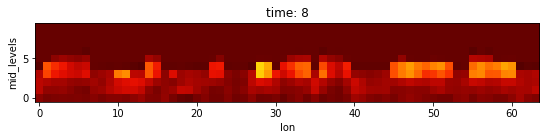
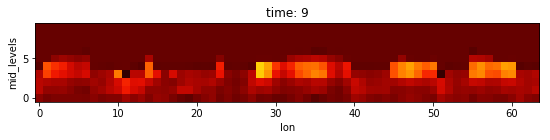
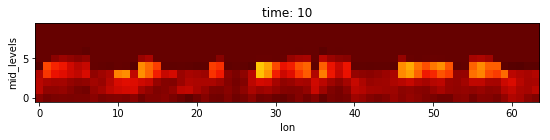
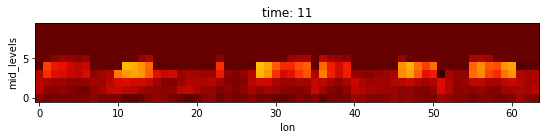
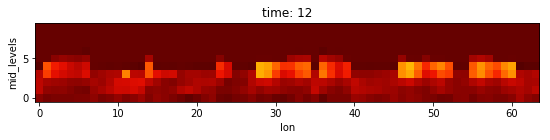
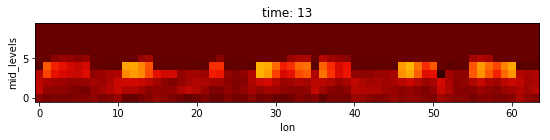
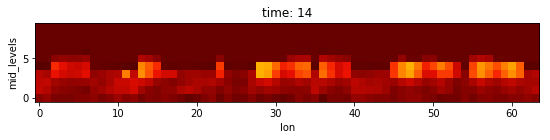
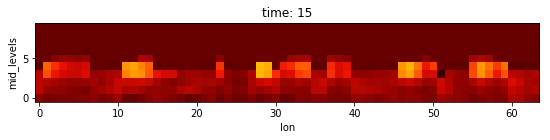
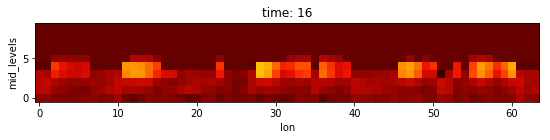
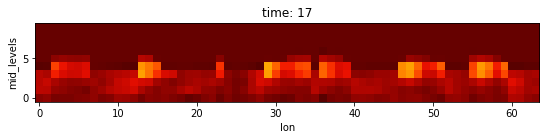
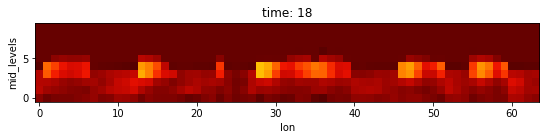
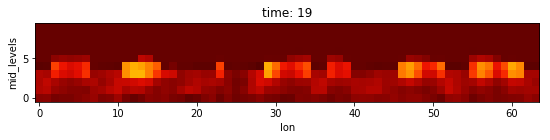
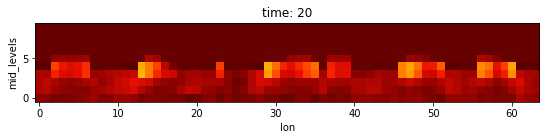
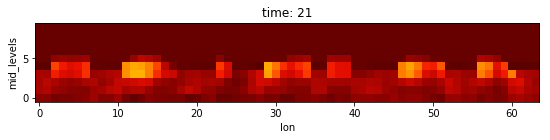
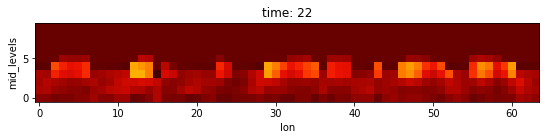
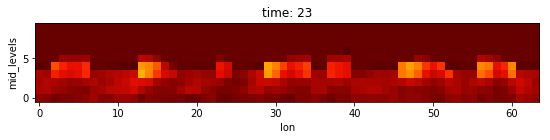
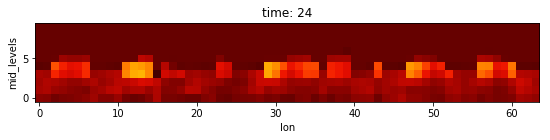
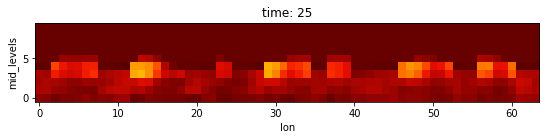
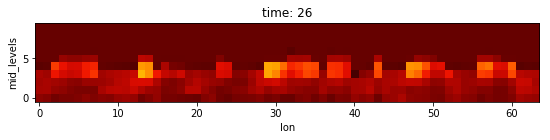
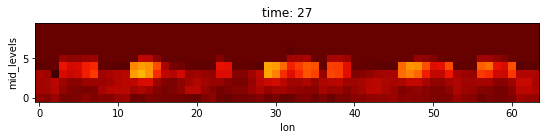
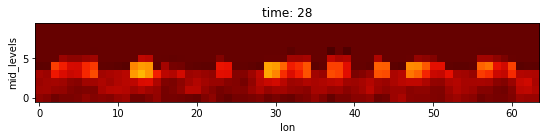
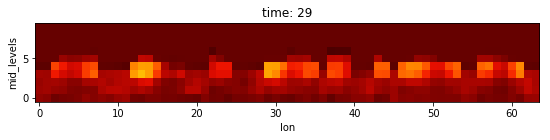
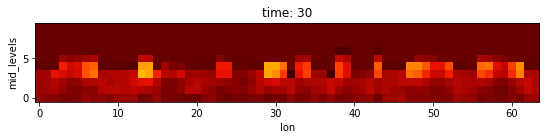
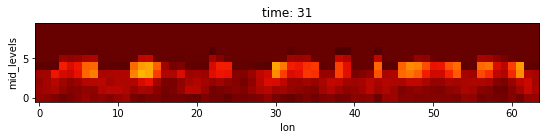
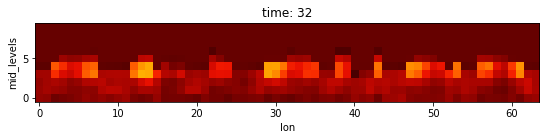
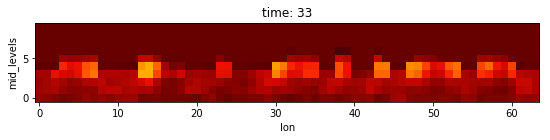
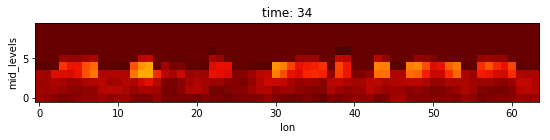
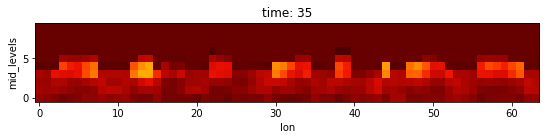
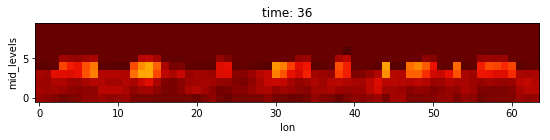
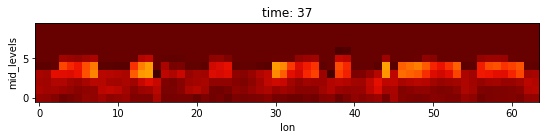
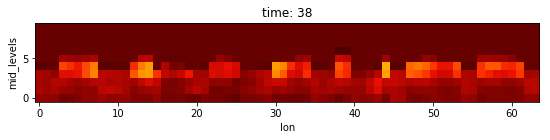
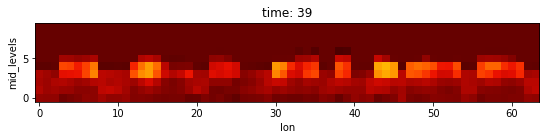
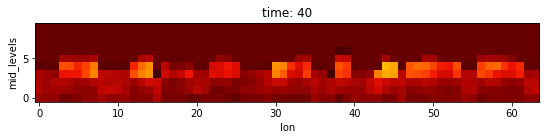
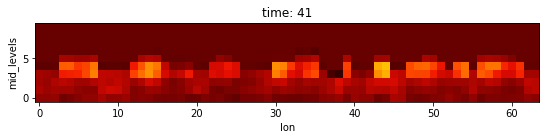
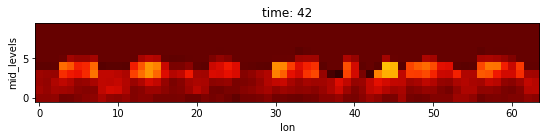
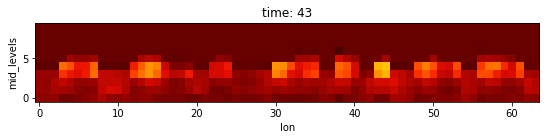
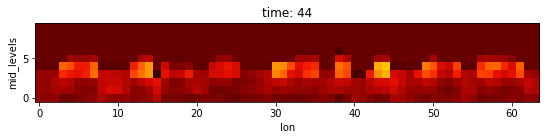
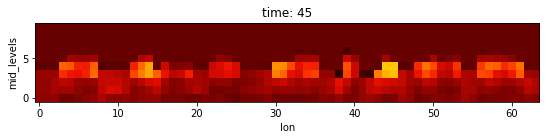
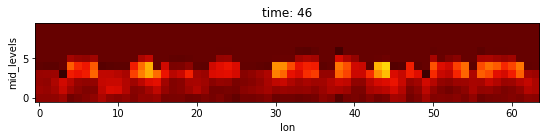
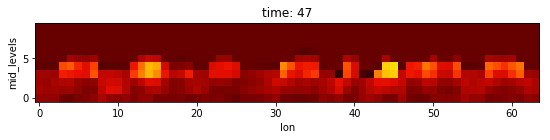
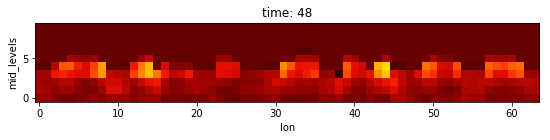
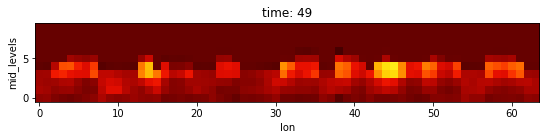
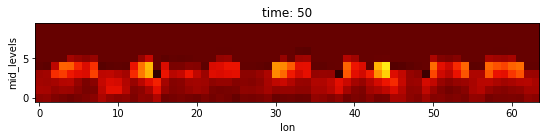
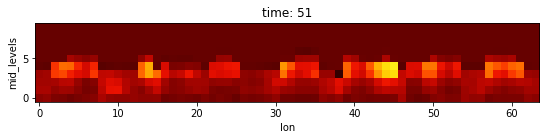
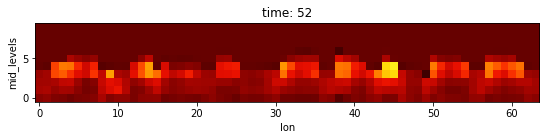
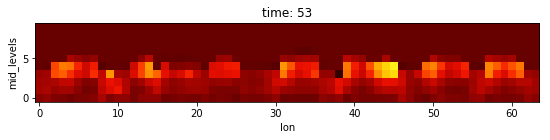
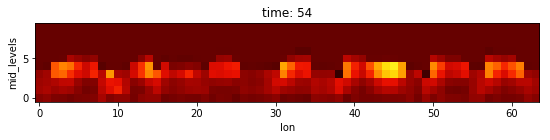
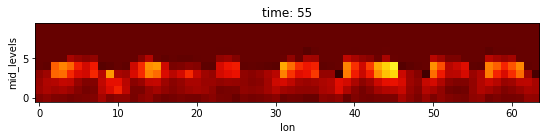
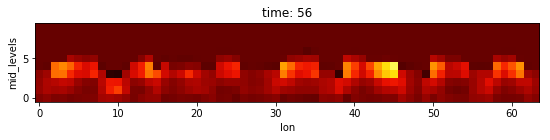
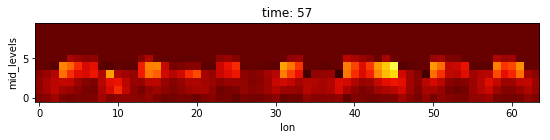
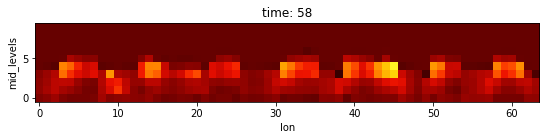
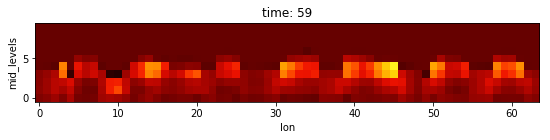
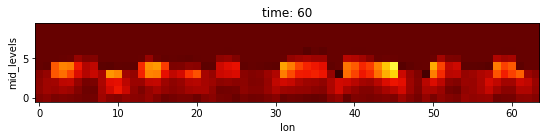
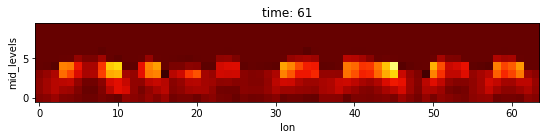
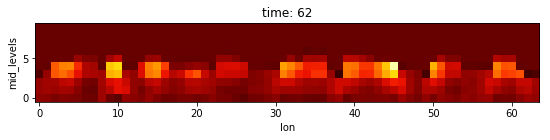
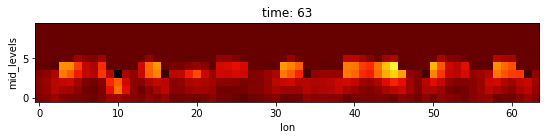
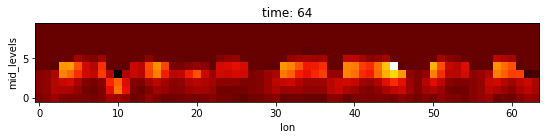
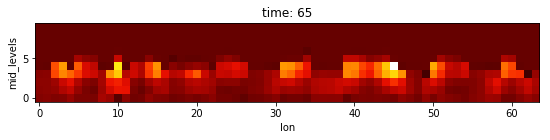
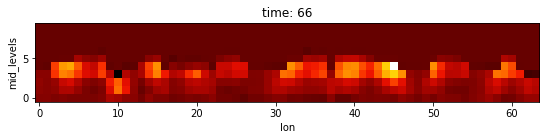
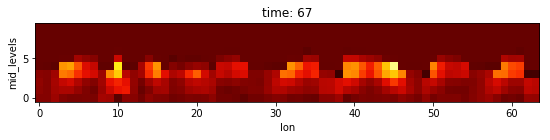
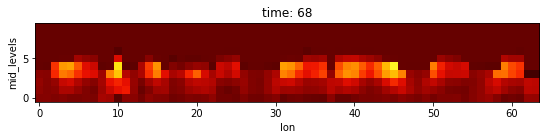
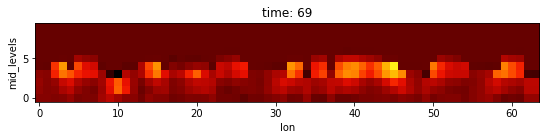
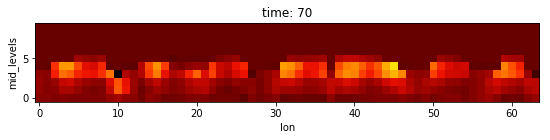
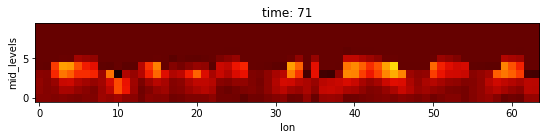
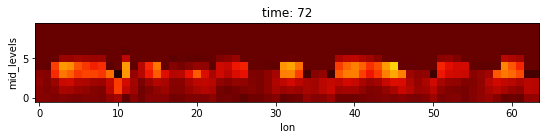
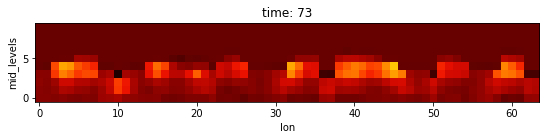
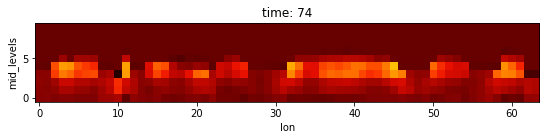
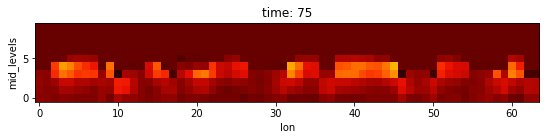
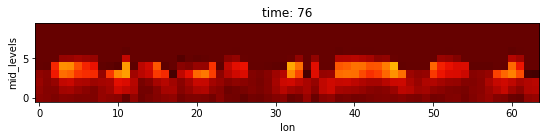
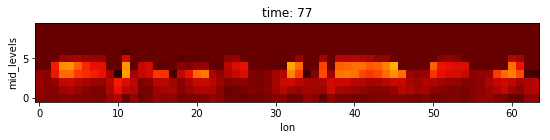
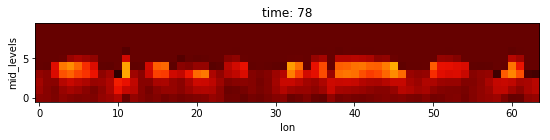
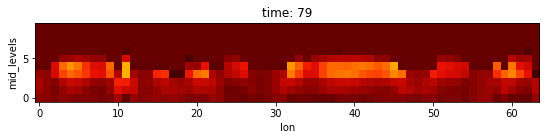
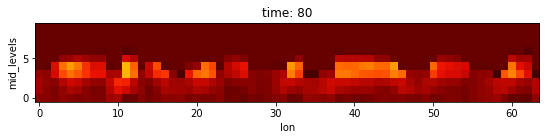
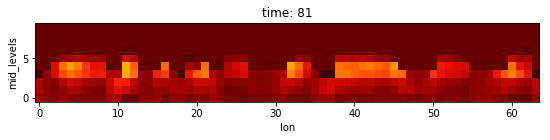
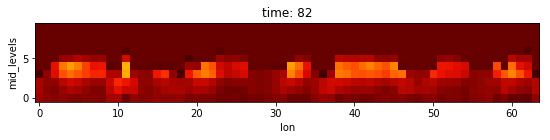
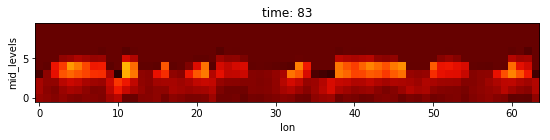
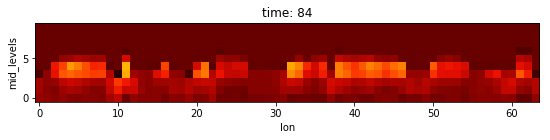
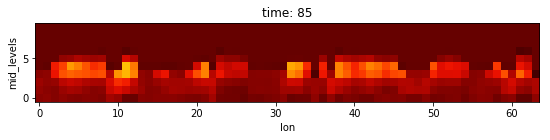
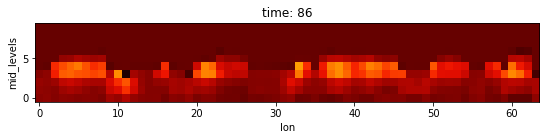
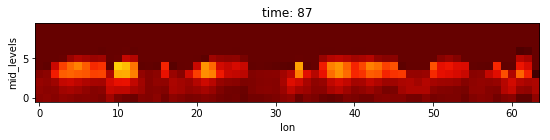
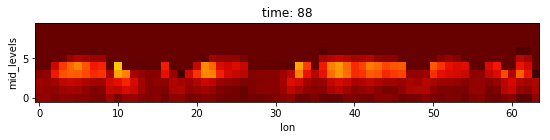
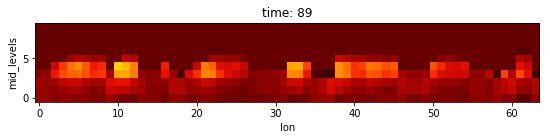
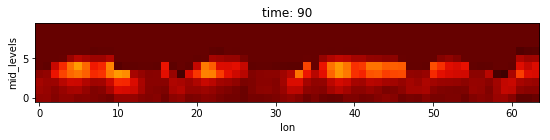
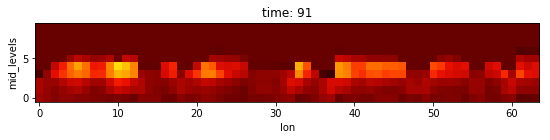
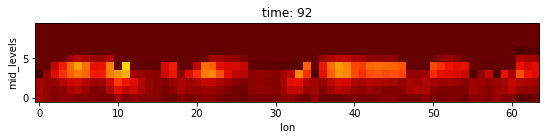
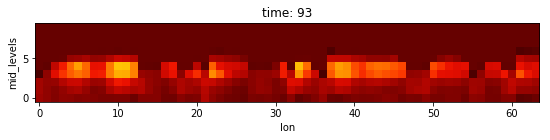
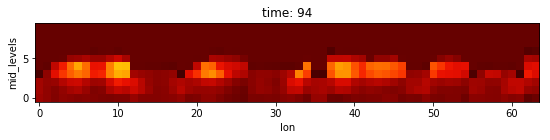
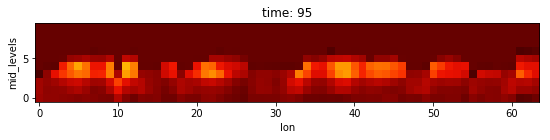
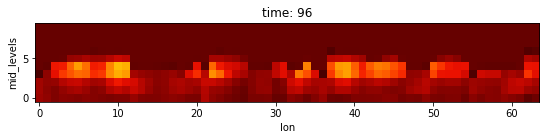
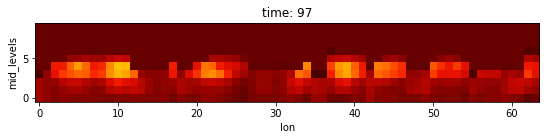
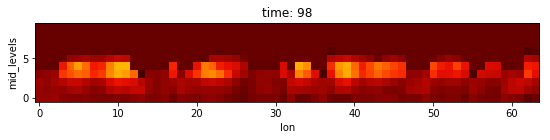
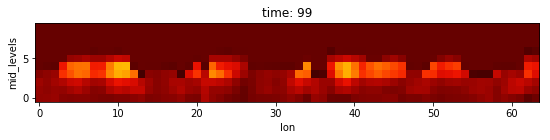
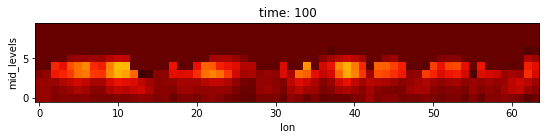
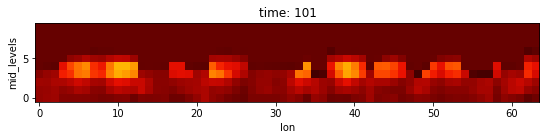
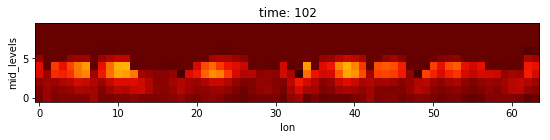
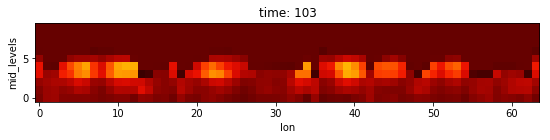
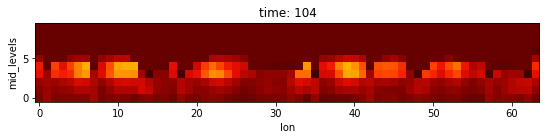
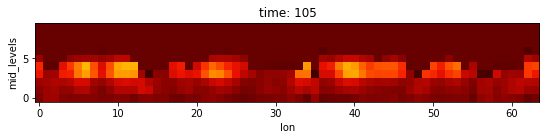
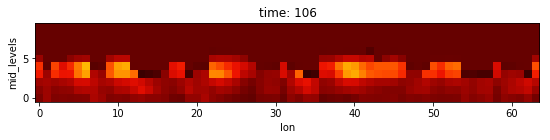
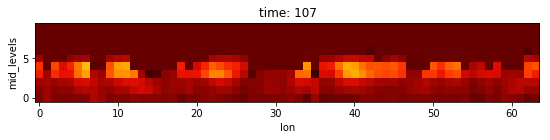
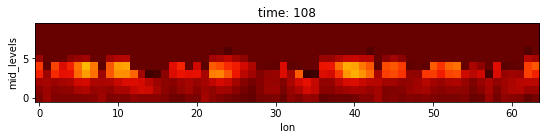
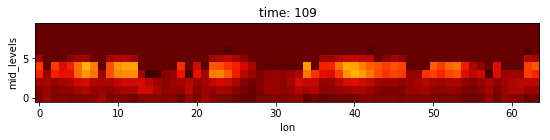
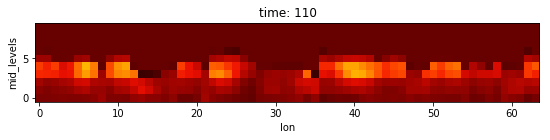
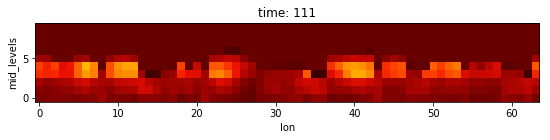
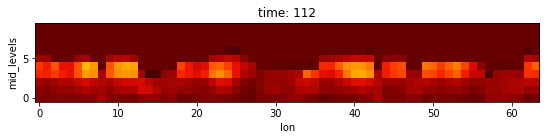
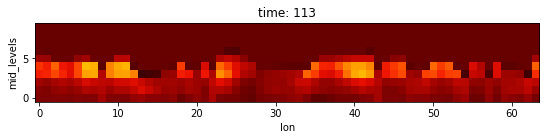
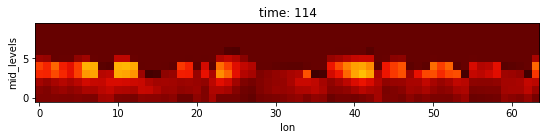
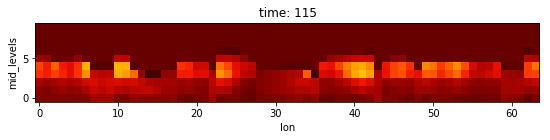
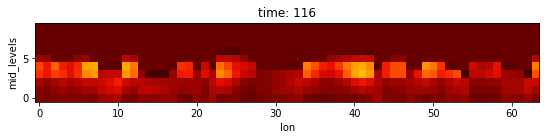
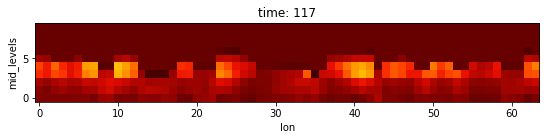
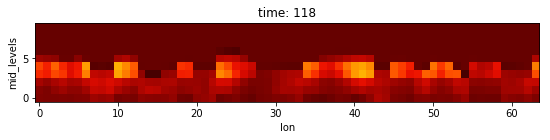
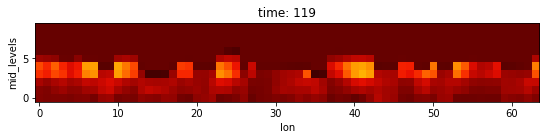
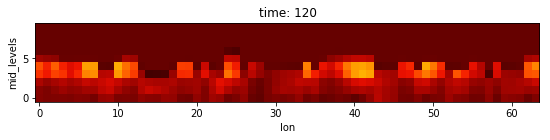
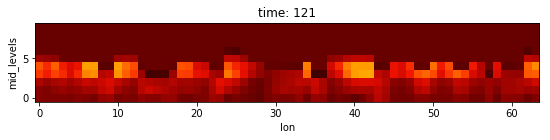
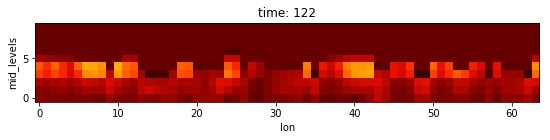
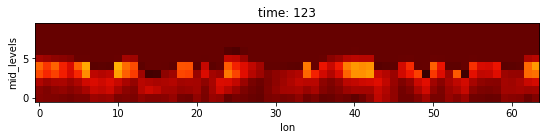
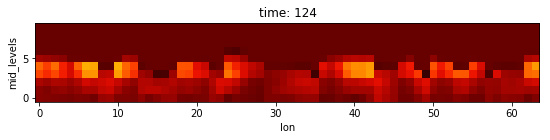
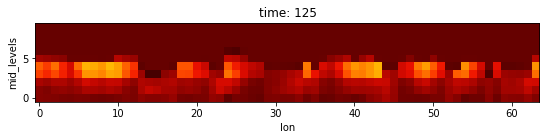
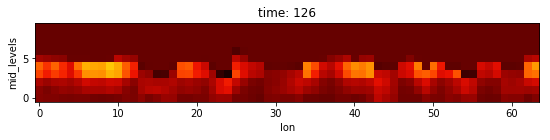
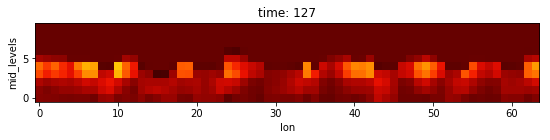
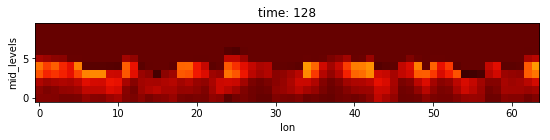
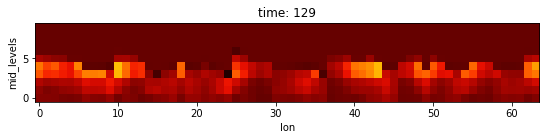
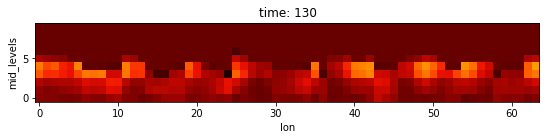
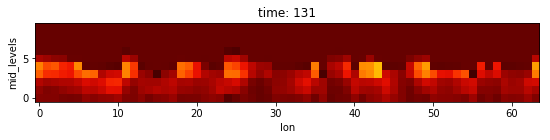
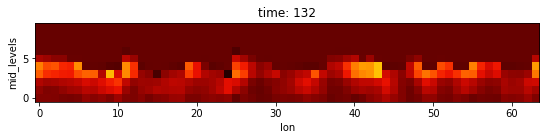
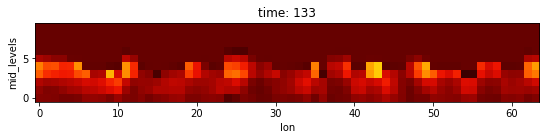
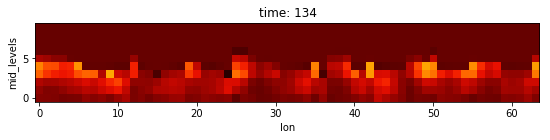
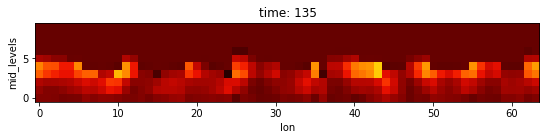
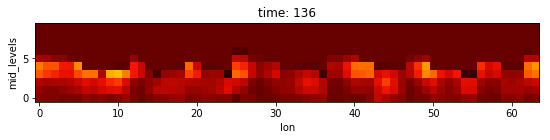
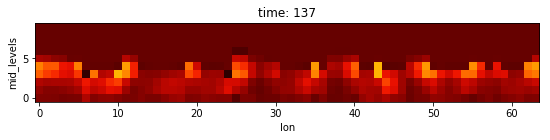
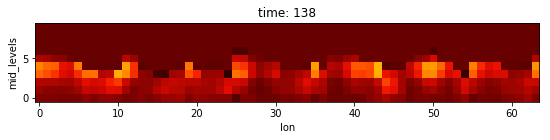
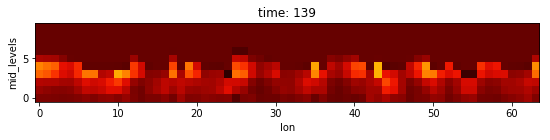
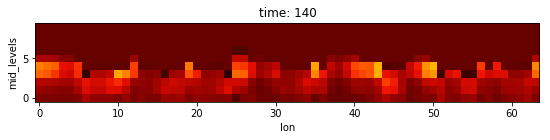
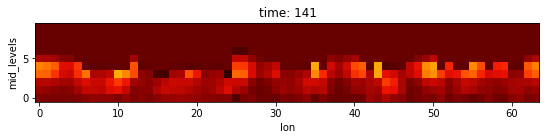
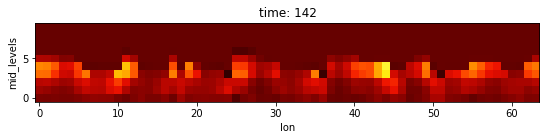
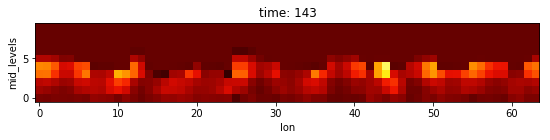
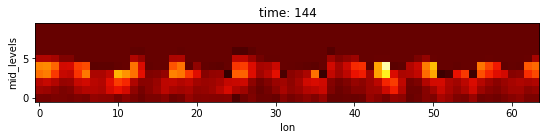
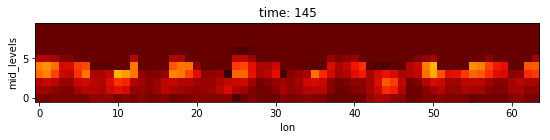
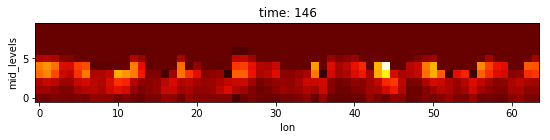
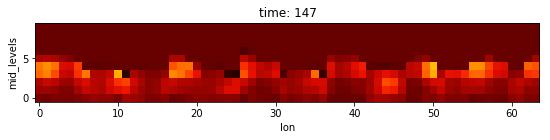
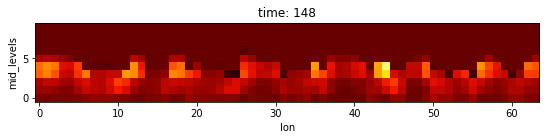
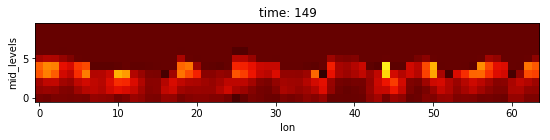
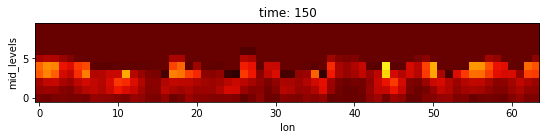
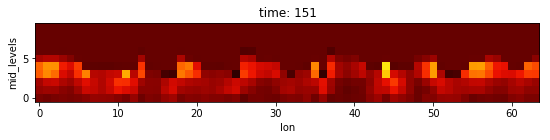
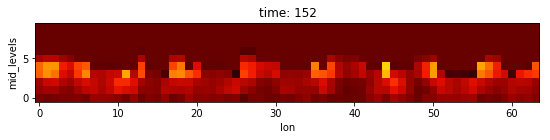
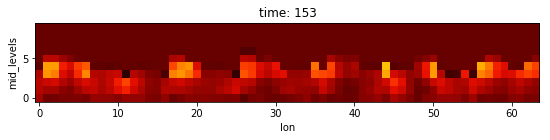
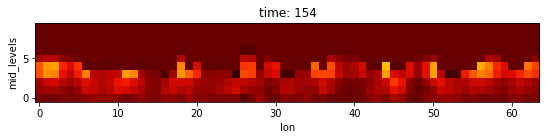
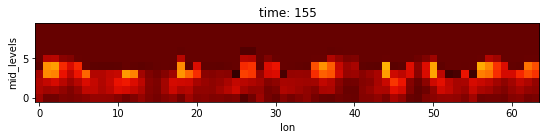
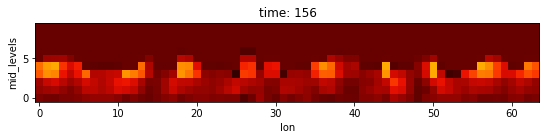
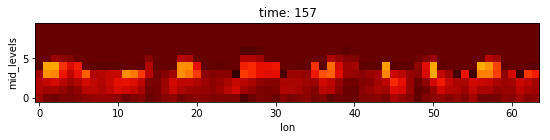
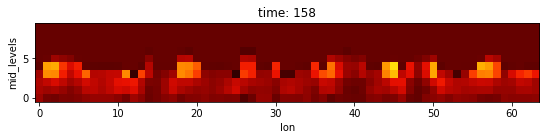
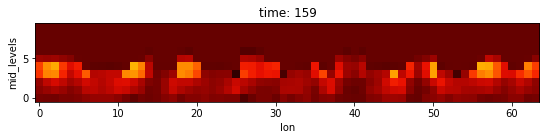
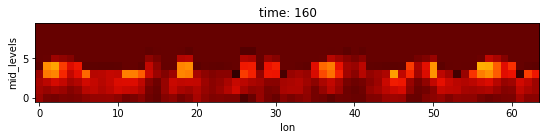
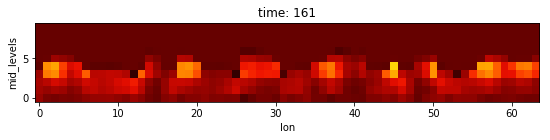
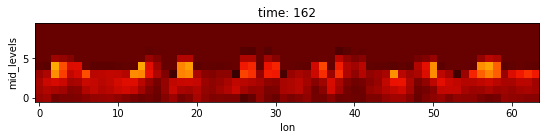
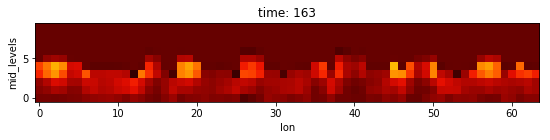
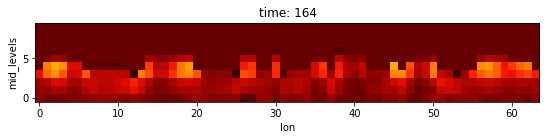
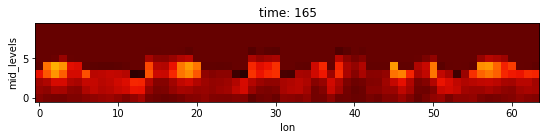
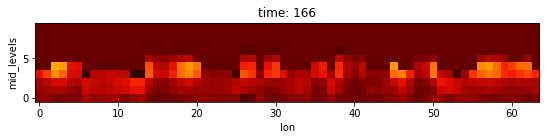
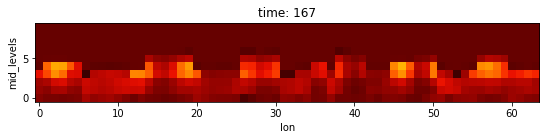
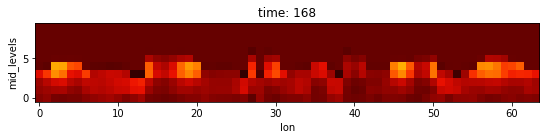
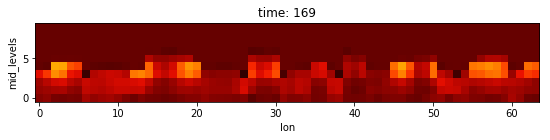
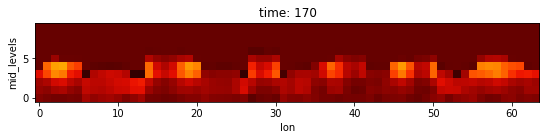
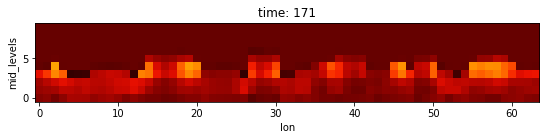
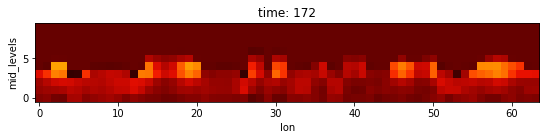
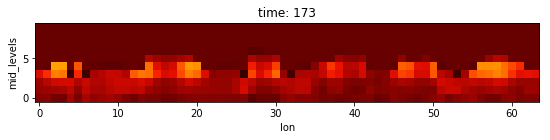
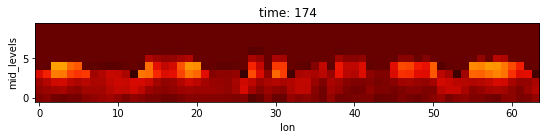
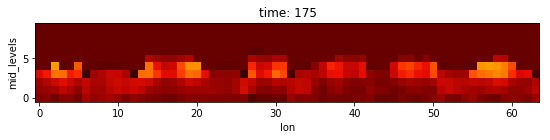
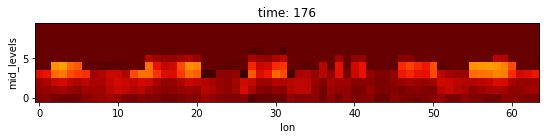
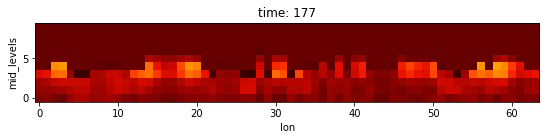
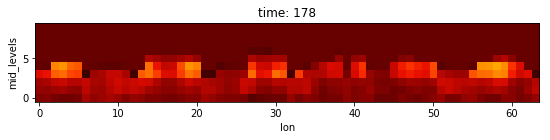
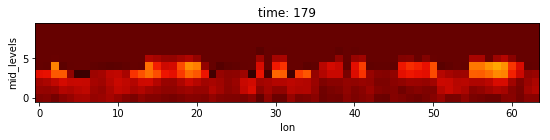
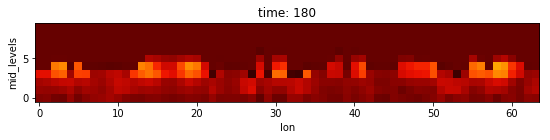
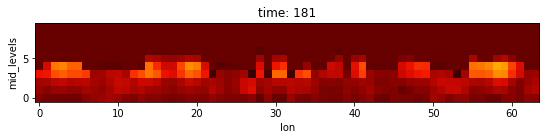
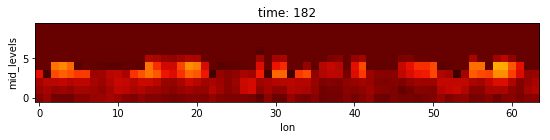
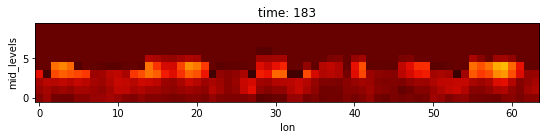
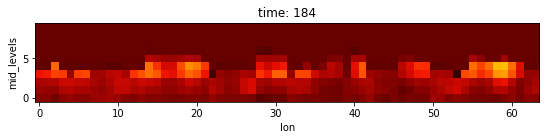
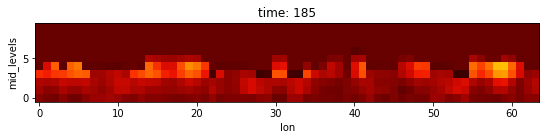
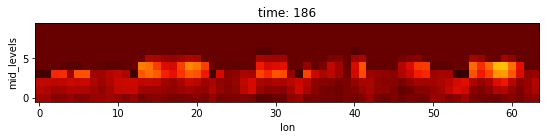
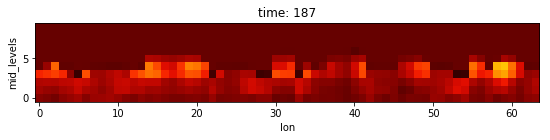
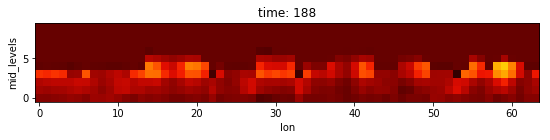
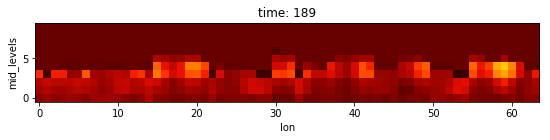
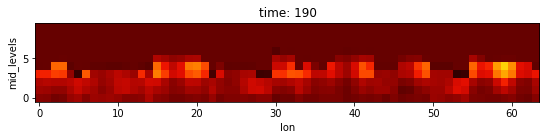
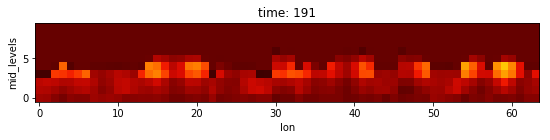
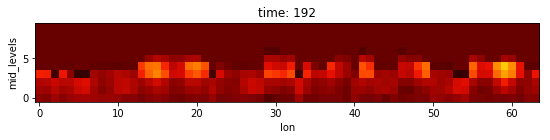
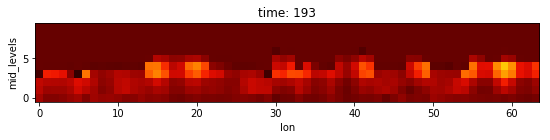
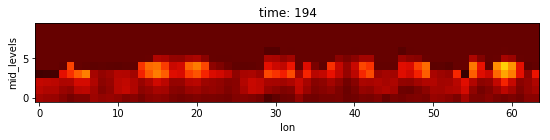
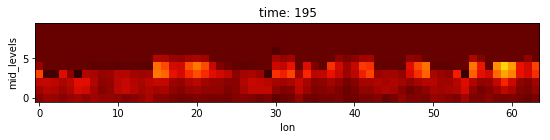
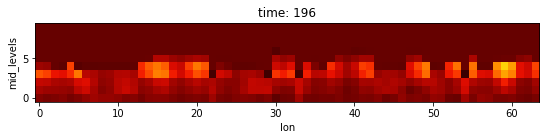
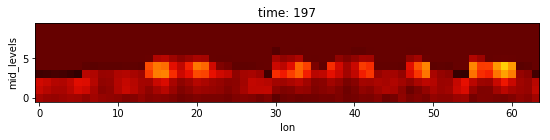
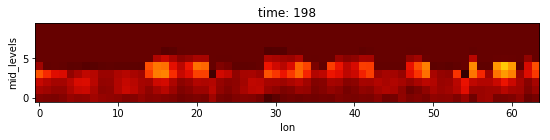
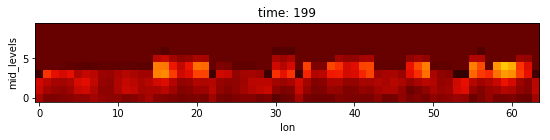

In [83]:
%%output holomap='scrubber'
images